# Type 2 Diabetes Early Detection AI Agent

## 1. Introduction
This project aims to build an AI-driven early detection system for Type 2 Diabetes using NHANES datasets (2013–2018) and supporting external data sources.  
The goal is to create a robust, interpretable, and deployable model that can help identify individuals at high risk of developing Type 2 Diabetes at an early stage.


## Step 2: Business Understanding

### 2.1 Introduction & Context
Type 2 Diabetes is a growing public health crisis across Africa and particularly in Kenya. According to the **International Diabetes Federation (IDF)**, more than **24 million adults in Africa** currently live with diabetes, a figure projected to rise to **55 million by 2045** as lifestyles change and urbanization accelerates :contentReference[oaicite:3]{index=3}.  
In Kenya, adult prevalence is estimated at **~ 3.1%**, which translates to about **813,300 adults aged 20–79** living with diabetes :contentReference[oaicite:4]{index=4}.

---

### 2.2 The Situation in Kenya
Despite these numbers, awareness and testing remain critically low:  

- Around **40% of Kenyans with diabetes are unaware** of their condition.  
- More than **88% of Kenyans have never had their blood sugar tested** (STEPS survey, 2015).  
- Officially, about **800,000 people have been diagnosed** with diabetes in Kenya.  

These facts imply that a large population is at risk of undiagnosed or late-diagnosed diabetes, which leads to complications like cardiovascular disease, kidney failure, blindness, and adds large economic burdens.

---

### 2.3 Problem Statement
How can we build a predictive AI system, tailored to the Kenyan and East African population, that **identifies individuals at high risk for Type 2 Diabetes early**—before complications arise—so that intervention is timely, cost-effective, and scalable?

---

### 2.4 Objectives
1. **Early Risk Identification**  
   Develop a predictive model with strong recall/sensitivity to capture undiagnosed cases, helping reduce the large fraction of people who are unaware of their condition.  

2. **Public Health & Clinical Impact**  
   - Support Kenya’s healthcare system in early detection and prevention.  
   - Provide region-specific risk factor insights (e.g., obesity, hypertension, diet, physical inactivity).  

3. **AI Agent Deployment**  
   Deliver not just a model, but a deployable tool that can be integrated into Kenyan/East African health initiatives for self-assessment and screening.

---

### 2.5 Success Metrics
- **Model performance:** High recall (≥ 80%), balanced F1, strong ROC-AUC.  
- **Social impact:** Decrease undiagnosed cases (currently large in Kenya) through earlier screening and awareness.  
- **Operational:** Tool must be usable in low-resource environments, cost-effective, scalable.

---

### 2.6 Suggested Visuals for this Step
Embed visuals from authoritative sources or from your generated plots:

#### 1. Diabetes Prevalence in Africa vs Kenya  
Link to a WHO/IDF Africa fact sheet containing this chart:  
[Diabetes in Africa Fact Sheet (WHO)](https://files.aho.afro.who.int/afahobckpcontainer/production/files/iAHO_Diabetes_Regional_Factsheet.pdf) :contentReference[oaicite:5]{index=5}

#### 2. IDF Kenya Statistics Page  
Kenya prevalence 3.1%, cases ~813,300:  
[IDF Kenya – Diabetes Network](https://idf.org/our-network/regions-and-members/africa/members/kenya/) :contentReference[oaicite:6]{index=6}

#### 3. Additional Global / Africa Projections  
Use data from WHO/AFRO “A Silent Killer” PDF or the IDF Atlas :contentReference[oaicite:7]{index=7}

---

### References  
[1] WHO / Afro. *Diabetes, a silent killer in Africa – Fact Sheet* (2023) :contentReference[oaicite:8]{index=8}  
[2] IDF. *Kenya | Diabetes Network* :contentReference[oaicite:9]{index=9}  
[3] WHO Kenya. *Diabetes is a family affair in Kenya* (2019) :contentReference[oaicite:10]{index=10}  


# 3. Data Understanding

## 3.1 Overview of Data Sources

**NHANES (National Health and Nutrition Examination Survey)**  
- Years used: **2013–2014, 2015–2016, 2017–2018**  
- Components selected:  
  - **Demographics:** age, sex, ethnicity, education, income  
  - **Examination:** BMI, blood pressure, waist circumference  
  - **Laboratory:** fasting plasma glucose, HbA1c, cholesterol  
  - **Questionnaire:** self-reported health, medical history, physical activity, diet, smoking, alcohol use  

**External Supporting Data**  
- Kenya/East Africa diabetes-related stats (to contextualize model relevance).  
- Potential socioeconomic datasets (e.g., World Bank indicators, WHO health stats).  

---

## 3.2 Dataset Characteristics

**NHANES Structure**  
- Large, nationally representative dataset from the U.S.  
- Each survey cycle is a **2-year period**.  
- Data files are split by subject area (demographic, lab, exam, questionnaire).  
- Participants linked across components using the unique respondent ID (`SEQN`).  

**Sample Sizes (approx.):**  
- 2013–2014: ~9,800 participants  
- 2015–2016: ~9,971 participants  
- 2017–2018: ~9,254 participants  
- **Total pooled dataset:** ~29,000 participants  

---

## 3.3 Key Variables of Interest

- **Demographics:** Age, Gender, Race/Ethnicity, Education, Income-to-poverty ratio  
- **Examination:** BMI, Waist Circumference, Blood Pressure  
- **Laboratory:** HbA1c (%), Fasting Plasma Glucose (mg/dL), Cholesterol  
- **Questionnaire:** Family history of diabetes, Smoking, Alcohol, Physical activity, Diet  

---

## 3.4 Target Variable Definition

**Outcome variable (binary): Diabetes status**  

Defined as **Diabetic (1)** if:  
- HbA1c ≥ 6.5%, **OR**  
- Fasting Plasma Glucose ≥ 126 mg/dL, **OR**  
- Self-reported physician diagnosis  

Otherwise, **Non-Diabetic (0)**.  

---

## 3.5 Data Quality & Challenges

- **Missing Values:** Some lab tests not done for all participants (fasting samples only subset).  
- **Survey Bias:** NHANES is U.S.-based — adaptation needed when contextualizing to Kenya/Africa.  
- **Integration:** Must merge multiple files (demographics, exam, labs, questionnaire) carefully.  
- **Class Imbalance:** Expect fewer diabetes cases (~10–12%) than non-diabetes in dataset.  

---

## 3.6 Suggested Visuals for Data Understanding

- **Table:** Sample sizes per survey year.  
- **Histogram:** Age distribution of participants.  
- **Pie chart:** Gender distribution.  
- **Bar chart:** Diabetes prevalence across survey cycles.  


In [1]:
# 3. Data Understanding

# 3.1 Import Libraries & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Show all columns when displaying dataframes
pd.set_option("display.max_columns", None)


In [2]:
# 3.2 Load One NHANES Dataset (Demographics as an example)
# NHANES files are in XPT (SAS transport) format
# We'll use the DEMO_J.xpt (2017–2018) file first

demo_path = "../Data/DEMO_J.xpt"

try:
    demo_df = pd.read_sas(demo_path)
    print(" DEMO_J.xpt loaded successfully!")
    display(demo_df.head())
except Exception as e:
    print(" Error loading DEMO_J.xpt:", e)


 DEMO_J.xpt loaded successfully!


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


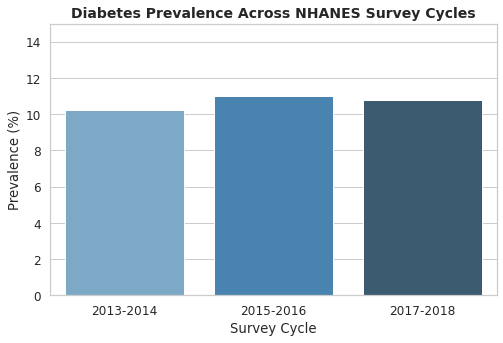

In [3]:
# 3.3 Example: Bar Chart of Diabetes Prevalence Across Survey Cycles
# (Placeholder numbers – will be updated once diabetes status is defined)

cycles = ["2013-2014", "2015-2016", "2017-2018"]
prevalence = [10.2, 11.0, 10.8]  # % prevalence (example values)

plt.figure(figsize=(8,5))
sns.barplot(x=cycles, y=prevalence, palette="Blues_d")
plt.title("Diabetes Prevalence Across NHANES Survey Cycles", fontsize=14, weight="bold")
plt.ylabel("Prevalence (%)")
plt.xlabel("Survey Cycle")
plt.ylim(0, 15)
plt.show()


## Load Additional NHANES & External Datasets

In [4]:
# Define paths for key NHANES datasets
exam_files = ["../Data/BPXO_J.xpt", "../Data/BPQ_J.xpt"]        # Examination files
lab_files = ["../Data/GLU_J.xpt", "../Data/TCHOL_J.xpt", "../Data/TRIGLY_J.xpt"]  # Lab files
questionnaire_files = ["../Data/PAQY_J.xpt", "../Data/PFQ_J.xpt", "../Data/SMQFAM_J.xpt"]  # Example

# Load NHANES exam datasets
exam_dfs = []
for f in exam_files:
    try:
        df = pd.read_sas(f)
        exam_dfs.append(df)
        print(f" {f} loaded successfully!")
    except Exception as e:
        print(f" Error loading {f}: {e}")

# Load NHANES lab datasets
lab_dfs = []
for f in lab_files:
    try:
        df = pd.read_sas(f)
        lab_dfs.append(df)
        print(f" {f} loaded successfully!")
    except Exception as e:
        print(f" Error loading {f}: {e}")

# Load NHANES questionnaire datasets
questionnaire_dfs = []
for f in questionnaire_files:
    try:
        df = pd.read_sas(f)
        questionnaire_dfs.append(df)
        print(f" {f} loaded successfully!")
    except Exception as e:
        print(f" Error loading {f}: {e}")

# Load external CSV datasets
external_csvs = ["../Data/diabetes_012_health_indicators_BRFSS2015.csv",
                 "../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv",
                 "../Data/diabetes_data_upload.csv",
                 "../Data/Diabetes_Final_Data_V2.csv",
                 "../Data/diabetes_prediction_dataset.csv"]

external_dfs = []
for f in external_csvs:
    try:
        df = pd.read_csv(f)
        external_dfs.append(df)
        print(f" {f} loaded successfully!")
    except Exception as e:
        print(f" Error loading {f}: {e}")


 ../Data/BPXO_J.xpt loaded successfully!
 ../Data/BPQ_J.xpt loaded successfully!
 ../Data/GLU_J.xpt loaded successfully!
 ../Data/TCHOL_J.xpt loaded successfully!
 ../Data/TRIGLY_J.xpt loaded successfully!
 ../Data/PAQY_J.xpt loaded successfully!
 ../Data/PFQ_J.xpt loaded successfully!
 ../Data/SMQFAM_J.xpt loaded successfully!
 ../Data/diabetes_012_health_indicators_BRFSS2015.csv loaded successfully!
 ../Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv loaded successfully!
 ../Data/diabetes_data_upload.csv loaded successfully!
 ../Data/Diabetes_Final_Data_V2.csv loaded successfully!
 ../Data/diabetes_prediction_dataset.csv loaded successfully!


# 4. Data Cleaning & Preprocessing

## 4.1 Overview
Before modeling, the NHANES and external datasets must be merged, cleaned, and standardized. This step ensures consistency, removes missing or incorrect values, and prepares the data for feature engineering and machine learning.

---

## 4.2 Goals
- Merge multiple NHANES components (Demographics, Examination, Laboratory, Questionnaire) with external datasets.  
- Handle missing values appropriately (imputation or removal).  
- Standardize column names and formats.  
- Encode categorical variables (e.g., gender, ethnicity, family history).  
- Detect and remove duplicates or inconsistent records.  
- Scale numerical variables if required by downstream models.

---

## 4.3 Planned Steps
1. **Merge datasets** using the unique respondent ID (`SEQN`).  
2. **Inspect missing values** across all features and decide imputation strategies.  
3. **Rename columns** to human-readable names.  
4. **Encode categorical variables** using one-hot encoding or label encoding.  
5. **Check for outliers** in key continuous variables (BMI, blood pressure, glucose, cholesterol).  
6. **Normalize/standardize numerical features** if needed for modeling.  
7. **Save cleaned dataset** for exploratory data analysis and feature engineering.

---

## 4.4 Suggested Visualizations
- Heatmap of missing values per feature.  
- Boxplots for numerical variables to detect outliers.  
- Count plots for categorical variables to inspect distribution.  
- Correlation matrix to understand feature relationships.


In [5]:
import os

# 4.5 Preview Top 5 Rows of All NHANES & External Datasets

data_dir = "../Data"

# Identify all XPT and CSV files
all_files = [f for f in os.listdir(data_dir) if f.endswith((".xpt", ".csv"))]

# Separate NHANES XPT files and external CSVs
nhanes_files = [f for f in all_files if f.endswith(".xpt")]
external_files = [f for f in all_files if f.endswith(".csv")]

# Dictionaries to hold loaded dataframes
nhanes_dfs = {}
external_dfs = {}

# Function to load and preview datasets
def load_and_preview(file_name):
    file_path = os.path.join(data_dir, file_name)
    try:
        if file_name.endswith(".xpt"):
            df = pd.read_sas(file_path)
        else:
            df = pd.read_csv(file_path)
        print(f" {file_name} loaded successfully!")
        display(df.head())
        return df
    except Exception as e:
        print(f" Error loading {file_name}:", e)
        return None

# Load NHANES datasets
print("### NHANES 2017–2018 Datasets")
for file_name in nhanes_files:
    nhanes_dfs[file_name] = load_and_preview(file_name)

# Load external datasets
print("\n### External Supporting Datasets")
for file_name in external_files:
    external_dfs[file_name] = load_and_preview(file_name)


### NHANES 2017–2018 Datasets
 GLU_J.xpt loaded successfully!


,SEQN,WTSAF2YR,LBXGLU,LBDGLUSI
0,93708.0,2.565368e+04,122.0,6.77
1,93711.0,2.922605e+04,107.0,5.94
2,93717.0,1.371510e+05,91.0,5.05
3,93718.0,5.888331e+04,89.0,4.94
4,93719.0,5.397605e-79,86.0,4.77


 DEMO_J.xpt loaded successfully!


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


 AUQ_J.xpt loaded successfully!


,SEQN,AUQ054,AUQ060,AUQ070,AUQ080,AUQ090,AUQ400,AUQ410A,AUQ410B,AUQ410C,AUQ410D,AUQ410E,AUQ410F,AUQ410G,AUQ410H,AUQ410I,AUQ410J,AUQ156,AUQ420,AUQ430,AUQ139,AUQ144,AUQ147,AUQ149A,AUQ149B,AUQ149C,AUQ153,AUQ630,AUQ440,AUQ450A,AUQ450B,AUQ450C,AUQ450D,AUQ450E,AUQ450F,AUQ460,AUQ470,AUQ101,AUQ110,AUQ480,AUQ490,AUQ191,AUQ250,AUQ255,AUQ260,AUQ270,AUQ280,AUQ500,AUQ300,AUQ310,AUQ320,AUQ330,AUQ340,AUQ350,AUQ360,AUQ370,AUQ510,AUQ380
0,93703.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,6.0
4,93707.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 BPXO_J.xpt loaded successfully!


,SEQN,BPAOARM,BPAOCSZ,BPAOMNTS,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,93705.0,b'R',4.0,-20.0,164.0,66.0,165.0,66.0,172.0,66.0,52.0,51.0,49.0
1,93706.0,b'R',3.0,138.0,126.0,74.0,128.0,68.0,133.0,71.0,76.0,83.0,73.0
2,93707.0,b'R',2.0,12.0,136.0,71.0,133.0,72.0,139.0,71.0,100.0,89.0,91.0
3,93708.0,b'R',3.0,22.0,146.0,82.0,142.0,76.0,151.0,81.0,67.0,65.0,71.0
4,93709.0,b'R',4.0,58.0,120.0,83.0,124.0,81.0,113.0,74.0,64.0,62.0,61.0


 DEQ_J.xpt loaded successfully!


,SEQN,DED031,DEQ034A,DEQ034C,DEQ034D,DEQ038G,DEQ038Q,DED120,DED125
0,93711.0,3.0,4.0,4.0,5.0,2.0,NaN,60.0,300.0
1,93714.0,5.0,3.0,3.0,5.0,2.0,NaN,120.0,300.0
2,93717.0,3.0,3.0,3.0,5.0,1.0,1.0,3333.0,240.0
3,93718.0,5.0,3.0,3.0,5.0,2.0,NaN,3333.0,240.0
4,93728.0,4.0,3.0,4.0,3.0,1.0,1.0,60.0,60.0


 SMQRTU_J.xpt loaded successfully!


,SEQN,SMQ681,SMQ690A,SMQ710,SMQ720,SMQ725,SMQ690B,SMQ740,SMQ690C,SMQ770,SMQ690G,SMQ845,SMQ690H,SMQ849,SMQ851,SMQ690D,SMQ800,SMQ690E,SMQ817,SMQ690K,SMQ857O,SMQ863,SMQ690F,SMQ830,SMQ840,SMDANY,SMAQUEX
0,93705.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
2,93707.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
3,93708.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,2.0
4,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


 DSQTOT_J.xpt loaded successfully!


,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQTKCAL,DSQTPROT,DSQTCARB,DSQTSUGR,DSQTFIBE,DSQTTFAT,DSQTSFAT,DSQTMFAT,DSQTPFAT,DSQTCHOL,DSQTLYCO,DSQTLZ,DSQTVB1,DSQTVB2,DSQTNIAC,DSQTVB6,DSQTFA,DSQTFDFE,DSQTCHL,DSQTVB12,DSQTVC,DSQTVK,DSQTVD,DSQTCALC,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI
0,93703.0,1.000000e+00,5.397605e-79,1.0,2.0,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,167.0,284.0,NaN,3.00,20.00,NaN,7.500,NaN,NaN,NaN,NaN,1.3500,NaN,NaN,NaN,NaN,NaN,21.0
1,93704.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,8.000000e+00,5.397605e-79,1.0,2.0,26.0,NaN,7.0,3.0,3.0,0.11,NaN,NaN,NaN,NaN,300.0,250.0,35.39,8.923,31.1,4.22,645.0,1096.0,1.111,114.22,616.67,10.0,20.557,211.67,48.0,100.0,0.733,15.8333,2.0,5.0,110.0,21.4,NaN,150.0
3,93706.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 VTQ_J.xpt loaded successfully!


,SEQN,WTSVOC2Y,VTQ210,VTQ200A,VTQ231A,VTQ233A,VTQ233B,VTQ241A,VTD241B,VTQ244A,VTD244B,VTQ251A,VTD251B,VTQ261A,VTD261B,VTQ271A,VTD271B,VTQ281A,VTD281B,VTQ281C,VTD281D,VTQ281E,VTD281F
0,93706.0,1.976149e+04,2.0,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0,NaN,2.0,NaN
1,93707.0,1.600369e+04,2.0,2.0,1.0,2.0,NaN,9.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,47.0,2.0,NaN,2.0,NaN,2.0,NaN
2,93708.0,2.748752e+04,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,9.0,2.0,NaN,2.0,NaN,2.0,NaN
3,93709.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93711.0,3.101004e+04,1.0,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN


 ACQ_J.xpt loaded successfully!


,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110
0,93705.0,1.0,NaN,NaN,NaN,NaN
1,93706.0,NaN,NaN,NaN,NaN,4.0
2,93707.0,1.0,NaN,NaN,NaN,NaN
3,93708.0,NaN,NaN,NaN,NaN,1.0
4,93709.0,1.0,NaN,NaN,NaN,NaN


 MCQ_J.xpt loaded successfully!


,SEQN,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ080,MCQ092,MCD093,MCQ149,MCQ151,RHD018,MCQ160A,MCD180A,MCQ195,MCQ160N,MCD180N,MCQ160B,MCD180B,MCQ160C,MCD180C,MCQ160D,MCD180D,MCQ160E,MCD180E,MCQ160F,MCD180F,MCQ160M,MCQ170M,MCD180M,MCQ160G,MCD180G,MCQ160K,MCQ170K,MCD180K,MCQ160O,MCQ160L,MCQ170L,MCD180L,MCQ500,MCQ510A,MCQ510B,MCQ510C,MCQ510D,MCQ510E,MCQ510F,MCQ520,MCQ530,MCQ540,MCQ550,MCQ560,MCQ570,MCQ203,MCQ206,MCQ220,MCQ230A,MCD240A,MCQ230B,MCD240B,MCQ230C,MCD240C,MCQ230D,MCQ300B,MCQ300C,MCQ300A,MCQ366A,MCQ366B,MCQ366C,MCQ366D,MCQ371A,MCQ371B,MCQ371C,MCQ371D,OSQ230
0,93703.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,1.0,10.0,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,64.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0
3,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
4,93707.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 WHQMEC_J.xpt loaded successfully!


,SEQN,WHQ030M,WHQ500,WHQ520
0,93707.0,3.0,3.0,2.0
1,93719.0,3.0,3.0,1.0
2,93725.0,3.0,4.0,1.0
3,93733.0,3.0,4.0,1.0
4,93736.0,3.0,4.0,1.0


 ALQ_J.xpt loaded successfully!


,SEQN,ALQ111,ALQ121,ALQ130,ALQ142,ALQ270,ALQ280,ALQ290,ALQ151,ALQ170
0,93705.0,1.0,7.0,1.0,5.397605e-79,NaN,NaN,NaN,2.0,5.000000e+00
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93708.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93711.0,1.0,5.0,1.0,5.397605e-79,NaN,NaN,NaN,2.0,5.397605e-79


 INQ_J.xpt loaded successfully!


,SEQN,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ300,IND310,INQ320
0,93703.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,12.0,5.00,3.0,1.0,NaN,1.0
1,93704.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,12.0,5.00,3.0,1.0,NaN,1.0
2,93705.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.49,1.0,2.0,3.0,1.0
3,93706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,11.0,2.20,3.0,2.0,1.0,1.0


 DSBI.xpt loaded successfully!


,DSDIID,DSDINGR,DSDBID,DSDBCNAM,DSDBCCAT,DSDBCID
0,88.0,b'ALIVE! CITRUS BIOFLAVONOID COMPLEX',1436.0,b'NARIRUTIN',4.0,b'10001567'
1,88.0,b'ALIVE! CITRUS BIOFLAVONOID COMPLEX',1437.0,b'ERIOCITRIN',4.0,b'10001568'
2,88.0,b'ALIVE! CITRUS BIOFLAVONOID COMPLEX',1598.0,b'FLAVONOLS',4.0,b'10001738'
3,88.0,b'ALIVE! CITRUS BIOFLAVONOID COMPLEX',2188.0,b'GRAPE',3.0,b'10002355'
4,88.0,b'ALIVE! CITRUS BIOFLAVONOID COMPLEX',2189.0,b'GRAPEFRUIT',3.0,b'10002356'


 DR1IFF_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1CCMNM,DR1CCMTX,DR1_020,DR1_030Z,DR1FS,DR1_040Z,DR1IFDCD,DR1IGRMS,DR1IKCAL,DR1IPROT,DR1ICARB,DR1ISUGR,DR1IFIBE,DR1ITFAT,DR1ISFAT,DR1IMFAT,DR1IPFAT,DR1ICHOL,DR1IATOC,DR1IATOA,DR1IRET,DR1IVARA,DR1IACAR,DR1IBCAR,DR1ICRYP,DR1ILYCO,DR1ILZ,DR1IVB1,DR1IVB2,DR1INIAC,DR1IVB6,DR1IFOLA,DR1IFA,DR1IFF,DR1IFDFE,DR1ICHL,DR1IVB12,DR1IB12A,DR1IVC,DR1IVD,DR1IVK,DR1ICALC,DR1IPHOS,DR1IMAGN,DR1IIRON,DR1IZINC,DR1ICOPP,DR1ISODI,DR1IPOTA,DR1ISELE,DR1ICAFF,DR1ITHEO,DR1IALCO,DR1IMOIS,DR1IS040,DR1IS060,DR1IS080,DR1IS100,DR1IS120,DR1IS140,DR1IS160,DR1IS180,DR1IM161,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,93704.0,81714.005497,82442.869214,1.0,1.0,49.0,2.0,2.0,7.0,2.0,1.0,5.397605e-79,5.397605e-79,30600.0,1.0,3.0,1.0,55100050.0,80.58,244.0,5.79,27.50,5.51,1.700000e+00,12.35,2.812,4.657,4.166,4.700000e+01,1.42,5.397605e-79,5.600000e+01,5.700000e+01,5.397605e-79,9.0,1.000000e+00,5.397605e-79,77.0,0.175,0.205,1.092,0.116,34.0,2.700000e+01,6.0,53.0,35.4,2.900000e-01,5.397605e-79,5.397605e-79,7.000000e-01,11.1,162.0,256.0,16.0,1.150000e+00,0.57,0.044,441.0,137.0,8.100000e+00,5.397605e-79,5.397605e-79,5.397605e-79,32.65,6.000000e-02,3.900000e-02,2.500000e-02,5.500000e-02,6.000000e-02,1.780000e-01,1.687,6.160000e-01,7.800000e-02,4.549,4.000000e-02,5.397605e-79,3.669,4.670000e-01,5.397605e-79,2.200000e-02,5.397605e-79,1.000000e-03,6.000000e-03
1,93704.0,81714.005497,82442.869214,2.0,1.0,49.0,2.0,2.0,7.0,2.0,1.0,5.397605e-79,5.397605e-79,30600.0,1.0,1.0,1.0,11513600.0,248.00,181.0,7.27,33.36,30.48,5.397605e-79,2.04,1.220,0.451,0.069,1.100000e+01,0.05,5.397605e-79,1.250000e+02,1.250000e+02,5.397605e-79,2.0,5.397605e-79,5.397605e-79,1.0,0.124,0.310,0.300,0.131,5.0,5.397605e-79,5.0,5.0,37.7,1.310000e+00,5.397605e-79,5.397605e-79,2.400000e+00,0.3,271.0,241.0,39.0,5.397605e-79,1.11,0.104,133.0,382.0,5.000000e+00,6.000000e+00,5.400000e+01,5.397605e-79,203.37,4.700000e-02,3.200000e-02,2.500000e-02,5.000000e-02,5.700000e-02,2.010000e-01,0.570,2.060000e-01,3.000000e-02,0.459,2.000000e-03,5.397605e-79,0.072,7.000000e-03,5.397605e-79,2.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
2,93704.0,81714.005497,82442.869214,3.0,1.0,49.0,2.0,2.0,7.0,2.0,1.0,1.000000e+00,1.200000e+01,43200.0,2.0,1.0,2.0,24198739.0,100.00,271.0,19.22,17.25,0.40,1.200000e+00,13.95,2.493,4.830,5.783,4.800000e+01,3.17,5.397605e-79,2.000000e+00,3.000000e+00,5.397605e-79,2.0,5.397605e-79,5.397605e-79,83.0,0.110,0.179,8.217,0.426,19.0,6.000000e+00,13.0,23.0,43.7,1.600000e-01,5.397605e-79,1.100000e+00,2.000000e-01,8.0,17.0,282.0,28.0,7.300000e-01,0.71,0.069,769.0,373.0,1.750000e+01,5.397605e-79,5.397605e-79,5.397605e-79,46.64,5.397605e-79,5.397605e-79,4.000000e-03,5.397605e-79,1.000000e-03,2.600000e-02,1.771,4.140000e-01,4.900000e-02,4.656,1.060000e-01,9.000000e-03,5.485,2.260000e-01,5.397605e-79,4.000000e-02,5.397605e-79,3.000000e-03,2.000000e-03
3,93704.0,81714.005497,82442.869214,4.0,1.0,49.0,2.0,2.0,7.0,2.0,1.0,1.000000e+00,1.200000e+01,43200.0,2.0,1.0,2.0,74401010.0,5.67,6.0,0.06,1.55,1.21,5.397605e-79,0.01,0.001,0.001,0.002,5.397605e-79,0.08,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,18.0,5.397605e-79,6.840000e+02,9.0,0.001,0.009,0.081,0.009,1.0,5.397605e-79,1.0,1.0,0.7,5.397605e-79,5.397605e-79,2.000000e-01,5.397605e-79,0.2,1.0,1.0,1.0,2.000000e-02,0.01,0.005,51.0,16.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,3.88,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,0.001,5.397605e-79,5.397605e-79,0.001,5.397605e-79,5.397605e-79,0.002,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,93704.0,81714.005497,82442.869214,5.0,1.0,49.0,2.0,2.0,7.0,2.0,1.0,5.397605e-79,5.397605e-79,43200.0,2.0,1.0,2.0,71401020.0,112.00,177.0,3.08,28.62,0.41,2.200000e+00,6.14,0.950,2.099,1.682,5.397605e-79,0.44,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,3.0,5.397605e-79,5.397605e-79,18.0,0.146,0.036,2.326,0

 HUQ_J.xpt loaded successfully!


,SEQN,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ061,HUQ071,HUD080,HUQ090
0,93703.0,1.0,3.0,1.0,2.0,3.0,NaN,2.0,NaN,NaN
1,93704.0,1.0,3.0,1.0,2.0,2.0,NaN,2.0,NaN,NaN
2,93705.0,3.0,3.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0
3,93706.0,1.0,3.0,1.0,2.0,2.0,NaN,2.0,NaN,2.0
4,93707.0,3.0,3.0,1.0,2.0,1.0,NaN,2.0,NaN,1.0


 PFQ_J.xpt loaded successfully!


,SEQN,PFQ020,PFQ030,PFQ033,PFQ041,PFQ049,PFQ051,PFQ054,PFQ057,PFQ059,PFQ061A,PFQ061B,PFQ061C,PFQ061D,PFQ061E,PFQ061F,PFQ061G,PFQ061H,PFQ061I,PFQ061J,PFQ061K,PFQ061L,PFQ061M,PFQ061N,PFQ061O,PFQ061P,PFQ061Q,PFQ061R,PFQ061S,PFQ061T,PFQ063A,PFQ063B,PFQ063C,PFQ063D,PFQ063E,PFQ090
0,93705.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93707.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93708.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,10.0,11.0,20.0,NaN,NaN,2.0
4,93709.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,1.0,NaN,NaN,3.0,5.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,4.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,10.0,14.0,20.0,NaN,NaN,1.0


 INS_J.xpt loaded successfully!


,SEQN,WTSAF2YR,LBXIN,LBDINSI,LBDINLC
0,93708.0,2.565368e+04,9.72,58.32,5.397605e-79
1,93711.0,2.922605e+04,5.28,31.68,5.397605e-79
2,93717.0,1.371510e+05,3.94,23.64,5.397605e-79
3,93718.0,5.888331e+04,4.89,29.34,5.397605e-79
4,93719.0,5.397605e-79,10.94,65.64,5.397605e-79


 HSQ_J.xpt loaded successfully!


,SEQN,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX
0,93703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,93704.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0
2,93705.0,3.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0
3,93706.0,2.0,2.0,2.0,2.0,1.0,5.0,2.0,2.0
4,93707.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,2.0


 SMQFAM_J.xpt loaded successfully!


,SEQN,SMD460,SMD470,SMD480
0,93703.0,5.397605e-79,NaN,NaN
1,93704.0,5.397605e-79,NaN,NaN
2,93705.0,5.397605e-79,NaN,NaN
3,93706.0,NaN,NaN,NaN
4,93707.0,1.000000e+00,1.0,5.0


 DBQ_J.xpt loaded successfully!


,SEQN,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,DBQ930,DBQ935,DBQ940,DBQ945
0,93703.0,1.0,273.0,1.0,365.0,152.0,365.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,5.397605e-79,5.397605e-79,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,1.0,60.0,3.0,365.0,126.0,365.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,5.397605e-79,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.000000e+00,NaN,NaN,NaN,NaN,NaN,30.0,3.0,3.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,2.0,NaN,NaN,1.0,2.0,1.0,2.0
3,93706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,3.000000e+00,5.397605e-79,5.397605e-79,2.0,NaN,NaN,2.0,1.0,2.0,1.0
4,93707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,5.0,2.0,1.0,5.0,2.0,3.0,1.000000e+00,1.000000e+00,6.000000e+00,4.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ACQ_J (1).xpt loaded successfully!


,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110
0,93705.0,1.0,NaN,NaN,NaN,NaN
1,93706.0,NaN,NaN,NaN,NaN,4.0
2,93707.0,1.0,NaN,NaN,NaN,NaN
3,93708.0,NaN,NaN,NaN,NaN,1.0
4,93709.0,1.0,NaN,NaN,NaN,NaN


 SMQSHS_J.xpt loaded successfully!


,SEQN,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMQ940,SMAQUEX
0,93703.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,1.0,2.0,2.0,3.0
1,93704.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0
2,93705.0,1.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0
3,93706.0,2.0,NaN,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,1.0,2.0
4,93707.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0


 DUQ_J.xpt loaded successfully!


,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUD380F,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,93705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93706.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93711.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93712.0,1.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


 DEMO_H.xpt loaded successfully!


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,3.0,4.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,5.397605e-79,5.397605e-79,2.000000e+00,1.0,69.0,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1.0,112.0,4.0,4.0,0.84
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,3.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,4.0,5.397605e-79,2.000000e+00,5.397605e-79,1.0,54.0,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1.0,108.0,7.0,7.0,1.78
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,5.397605e-79,5.397605e-79,2.000000e+00,1.0,72.0,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1.0,109.0,10.0,10.0,4.51
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,NaN,NaN,1.0,1.0,NaN,3.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4.0,4.0,5.397605e-79,2.000000e+00,5.397605e-79,1.0,33.0,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2.0,109.0,9.0,9.0,2.52
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,5.0,1.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,2.0,5.397605e-79,5.397605e-79,2.000000e+00,1.0,78.0,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2.0,116.0,15.0,15.0,5.00


 CDQ_J.xpt loaded successfully!


,SEQN,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010
0,93705.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,93708.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,93709.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,93711.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,93713.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


 CBQPFC_J.xpt loaded successfully!


,SEQN,CBQ502,CBQ503,CBQ506,CBQ536,CBQ541,CBQ551,CBQ581,CBQ586,CBQ830,CBQ835,CBQ840,CBQ845,CBQ850,CBQ855,CBQ860,CBQ865,CBQ870,CBQ875,CBQ880,CBQ885,CBQ890,CBQ895,CBQ900,CBQ700,DBQ780,DBQ750,DBQ760,DBQ770,CBQ905,CBQ910,CBQ685,CBQ915,CBQ925,CBQ930,CBQ935,CBQ945,CBQ950,CBQ738A,CBQ738B,CBQ738C,CBQ738D,CBQ738E,CBQ738F,CBQ738G,CBQ738H,CBQ738I,CBQ738J,CBQ738K,CBQ738CD,CBQ698A,CBQ698B,CBQ698C,CBQ698D,CBQ698E,CBQ698F,CBQ698G,CBQ698H,CBQ698I,CBQ698CD,CBQ695A,CBQ695B,CBQ695C,DBD930,DBD935,DBD940,DBD945,CBD760,CBD765,CBD770,CBQ785,WTDRD1
0,93704.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,NaN,1.0,2.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,2.0,NaN,NaN,2.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,2.0,1.0,32.0,3.0,2.0,1.0,81714.005497
1,93707.0,1.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,1.0,2.0,NaN,1.0,1.0,2.0,1.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,6.0,NaN,NaN,3.0,4.0,NaN,6.0,7.0,8.0,9.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,48.0,3.0,2.0,1.0,15333.776805
2,93719.0,1.0,NaN,1.0,2.0,NaN,1.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,2.0,NaN,1.0,2.0,NaN,2.0,NaN,NaN,1.0,4.0,2.0,2.0,2.0,1.0,5.0,5.0,NaN,3.0,4.0,1.0,1.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,1.0,2.0,38.0,3.0,2.0,1.0,61579.904387
3,93720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16512.570217
4,93724.0,2.0,1.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,3.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,NaN,NaN,3.0,3.0,5.0,3.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,9.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,1.0,2.0,65.0,1.0,2.0,1.0,8650.873992


 IMQ_J.xpt loaded successfully!


,SEQN,IMQ011,IMQ020,IMQ060,IMQ070,IMQ081A,IMQ081B,IMQ081C,IMQ081D,IMQ090,IMQ100
0,93703.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


 GHB_J.xpt loaded successfully!


,SEQN,LBXGH
0,93705.0,6.2
1,93706.0,5.2
2,93707.0,5.6
3,93708.0,6.2
4,93709.0,6.3


 HIQ_J.xpt loaded successfully!


,SEQN,HIQ011,HIQ031A,HIQ031B,HIQ031C,HIQ031D,HIQ031E,HIQ031F,HIQ031H,HIQ031I,HIQ031J,HIQ031AA,HIQ260,HIQ105,HIQ270,HIQ210
0,93703.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
1,93704.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
2,93705.0,1.0,NaN,15.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
3,93706.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,93707.0,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0


 RXQASA_J.xpt loaded successfully!


,SEQN,RXQ510,RXQ515,RXQ520,RXQ525G,RXQ525Q,RXQ525U,RXD530
0,93705.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,93708.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
2,93709.0,1.0,1.0,NaN,1.0,NaN,NaN,81.0
3,93711.0,1.0,1.0,NaN,1.0,NaN,NaN,81.0
4,93713.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN


 FSQ_J.xpt loaded successfully!


,SEQN,FSD032A,FSD032B,FSD032C,FSD041,FSD052,FSD061,FSD071,FSD081,FSD092,FSD102,FSD032D,FSD032E,FSD032F,FSD111,FSD122,FSD132,FSD141,FSD146,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSD165N,FSQ012,FSD012N,FSD230,FSD230N,FSD795,FSD225,FSD235,FSD855,FSD860,FSQ865,FSQ162,FSQ760,FSD760N,FSQ653,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD652ZW,FSD672ZW,FSD652CW,FSD660ZW
0,93703.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,93704.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,93705.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,NaN,2.0,2.0,4.0,4.0,3.0,2.0,1.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 DIQ_I.xpt loaded successfully!


,SEQN,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,83732.0,1.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,2.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,7.3,2.0,134.0,72.0,6666.0,6666.0,9999.0,6666.0,5.397605e-79,1.0,1.0,2.0,2.0
1,83733.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83734.0,1.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,3.0,2.0,NaN,2.0,2.0,1.0,999.0,2.0,141.0,68.0,140.0,60.0,9999.0,9999.0,2.000000e+00,2.0,2.0,2.0,2.0
3,83735.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83736.0,2.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 DS1TOT_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DS1DSCNT,DS1DS,DS1ANCNT,DS1AN,DS1TKCAL,DS1TPROT,DS1TCARB,DS1TSUGR,DS1TFIBE,DS1TTFAT,DS1TSFAT,DS1TMFAT,DS1TPFAT,DS1TCHOL,DS1TLYCO,DS1TLZ,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TCHL,DS1TVC,DS1TVK,DS1TVD,DS1TCALC,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
0,93703.0,5.397605e-79,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,8.171401e+04,8.244287e+04,1.0,49.0,2.0,7.0,2.0,1.0,2.0,12.0,5.397605e-79,2.0,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,7.185561e+03,5.640391e+03,1.0,73.0,2.0,5.0,1.0,1.0,1.0,11.0,8.000000e+00,1.0,5.397605e-79,2.0,78.0,NaN,21.0,9.0,9.0,0.33,NaN,NaN,NaN,NaN,300.0,250.0,103.15,23.35,53.25,6.65,542.64,1133.0,1926.0,3.3,729.8,10.0,41.6,235.0,48.0,100.0,2.19,17.475,2.0,15.0,170.0,24.0,NaN,150.0
3,93706.0,6.463883e+03,5.397605e-79,1.0,86.0,1.0,NaN,6.0,1.0,1.0,12.0,5.397605e-79,2.0,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.533378e+04,2.270707e+04,1.0,81.0,2.0,14.0,2.0,1.0,1.0,12.0,5.397605e-79,2.0,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 TRIGLY_J.xpt loaded successfully!


,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
0,93708.0,2.565368e+04,58.0,0.655,109.0,2.819,107.0,2.767,111.0,2.870
1,93711.0,2.922605e+04,48.0,0.542,156.0,4.034,152.0,3.931,158.0,4.086
2,93717.0,1.371510e+05,102.0,1.152,140.0,3.620,138.0,3.569,142.0,3.672
3,93718.0,5.888331e+04,46.0,0.519,80.0,2.069,77.0,1.991,79.0,2.043
4,93719.0,5.397605e-79,80.0,0.903,35.0,0.905,35.0,0.905,35.0,0.905


 PAQY_J.xpt loaded successfully!


,SEQN,PAQ706,PAQ710,PAQ715
0,93703.0,7.000000e+00,1.0,8.000000e+00
1,93704.0,7.000000e+00,1.0,5.397605e-79
2,93707.0,5.397605e-79,4.0,1.000000e+00
3,93719.0,5.000000e+00,1.0,4.000000e+00
4,93724.0,7.000000e+00,8.0,2.000000e+00


 BPX_J.xpt loaded successfully!


,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4
0,93703.0,NaN,120.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,114.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,NaN,NaN,1.0,4.0,52.0,1.0,1.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,202.0,62.0,2.0,198.0,74.0,2.0
3,93706.0,NaN,NaN,1.0,3.0,82.0,1.0,1.0,140.0,112.0,74.0,2.0,114.0,70.0,2.0,108.0,76.0,2.0,NaN,NaN,NaN
4,93707.0,NaN,NaN,1.0,2.0,100.0,1.0,1.0,140.0,128.0,38.0,2.0,128.0,46.0,2.0,128.0,58.0,2.0,NaN,NaN,NaN


 DSPI.xpt loaded successfully!


,DSDPID,DSDPRDT,DSDSUPP,DSDSRCE,DSDTYPE,DSDSERVQ,DSDSERVU,DSDPREID,DSDORGID,DSDSGPF,DSDSEQF,DSDLINRF,DSDCNTV,DSDCNTM,DSDCNTA,DSDCNTB,DSDCNTO,DSDSUPID
0,1.0,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,9.0,4.0,1.0,18.0,NaN,1.0,1.0,1.0,1.0,1.300000e+01,1.600000e+01,5.397605e-79,5.397605e-79,1.000000e+00,b'1000032500'
1,2.0,1.0,b'FERGON FERROUS GLUCONATE HIGH POTENCY IRON',9.0,4.0,1.0,18.0,NaN,2.0,1.0,1.0,1.0,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,b'1000030700'
2,3.0,1.0,b'GNC ULTRA MEGA MULTIPLE VITAMINS AND MINERAL...,9.0,4.0,1.0,18.0,NaN,3.0,1.0,1.0,1.0,1.300000e+01,1.000000e+01,5.397605e-79,1.000000e+00,7.000000e+00,b'1000032000'
3,6.0,1.0,"b""BUGS BUNNY COMPLETE CHILDREN'S CHEWABLE VITA...",9.0,1.0,1.0,18.0,NaN,6.0,1.0,1.0,1.0,1.200000e+01,7.000000e+00,5.397605e-79,5.397605e-79,1.000000e+00,b'1000030800'
4,7.0,1.0,"b""BUGS BUNNY WITH EXTRA C CHILDREN'S CHEWABLE ...",9.0,1.0,1.0,18.0,NaN,7.0,1.0,1.0,1.0,1.000000e+01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,b'1000031000'


 TRIGLY_J (1).xpt loaded successfully!


,SEQN,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,LBDLDLM,LBDLDMSI,LBDLDLN,LBDLDNSI
0,93708.0,2.565368e+04,58.0,0.655,109.0,2.819,107.0,2.767,111.0,2.870
1,93711.0,2.922605e+04,48.0,0.542,156.0,4.034,152.0,3.931,158.0,4.086
2,93717.0,1.371510e+05,102.0,1.152,140.0,3.620,138.0,3.569,142.0,3.672
3,93718.0,5.888331e+04,46.0,0.519,80.0,2.069,77.0,1.991,79.0,2.043
4,93719.0,5.397605e-79,80.0,0.903,35.0,0.905,35.0,0.905,35.0,0.905


 ALQ_I.xpt loaded successfully!


,SEQN,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160
0,83732.0,1.0,NaN,1.000000e+00,2.0,1.0,5.397605e-79,NaN,2.0,NaN
1,83733.0,1.0,NaN,7.000000e+00,1.0,6.0,7.000000e+00,1.0,1.0,5.397605e-79
2,83734.0,1.0,NaN,5.397605e-79,NaN,NaN,NaN,NaN,1.0,NaN
3,83735.0,2.0,1.0,3.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,NaN
4,83736.0,2.0,1.0,1.000000e+00,3.0,1.0,5.397605e-79,NaN,2.0,NaN


 RXQASA_J (1).xpt loaded successfully!


,SEQN,RXQ510,RXQ515,RXQ520,RXQ525G,RXQ525Q,RXQ525U,RXD530
0,93705.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
1,93708.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
2,93709.0,1.0,1.0,NaN,1.0,NaN,NaN,81.0
3,93711.0,1.0,1.0,NaN,1.0,NaN,NaN,81.0
4,93713.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN


 DS1TOT_J (1).xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DS1DSCNT,DS1DS,DS1ANCNT,DS1AN,DS1TKCAL,DS1TPROT,DS1TCARB,DS1TSUGR,DS1TFIBE,DS1TTFAT,DS1TSFAT,DS1TMFAT,DS1TPFAT,DS1TCHOL,DS1TLYCO,DS1TLZ,DS1TVB1,DS1TVB2,DS1TNIAC,DS1TVB6,DS1TVB12,DS1TFA,DS1TFDFE,DS1TCHL,DS1TVC,DS1TVK,DS1TVD,DS1TCALC,DS1TPHOS,DS1TMAGN,DS1TIRON,DS1TZINC,DS1TCOPP,DS1TSODI,DS1TPOTA,DS1TSELE,DS1TCAFF,DS1TIODI
0,93703.0,5.397605e-79,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,8.171401e+04,8.244287e+04,1.0,49.0,2.0,7.0,2.0,1.0,2.0,12.0,5.397605e-79,2.0,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,7.185561e+03,5.640391e+03,1.0,73.0,2.0,5.0,1.0,1.0,1.0,11.0,8.000000e+00,1.0,5.397605e-79,2.0,78.0,NaN,21.0,9.0,9.0,0.33,NaN,NaN,NaN,NaN,300.0,250.0,103.15,23.35,53.25,6.65,542.64,1133.0,1926.0,3.3,729.8,10.0,41.6,235.0,48.0,100.0,2.19,17.475,2.0,15.0,170.0,24.0,NaN,150.0
3,93706.0,6.463883e+03,5.397605e-79,1.0,86.0,1.0,NaN,6.0,1.0,1.0,12.0,5.397605e-79,2.0,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,1.533378e+04,2.270707e+04,1.0,81.0,2.0,14.0,2.0,1.0,1.0,12.0,5.397605e-79,2.0,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 DUQ_I.xpt loaded successfully!


,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,1.0,25.0,1.0,25.0,5.397605e-79,1.0,5.0,4.0,1.0,1.0,30.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,1.0,15.0,1.0,16.0,1.000000e+00,4.0,4.0,2.0,1.0,1.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


 TCHOL_J.xpt loaded successfully!


,SEQN,LBXTC,LBDTCSI
0,93705.0,157.0,4.06
1,93706.0,148.0,3.83
2,93707.0,189.0,4.89
3,93708.0,209.0,5.40
4,93709.0,176.0,4.55


 BPQ_J.xpt loaded successfully!


,SEQN,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D
0,93705.0,1.0,1.0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN
1,93706.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,NaN
2,93708.0,1.0,1.0,50.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0
3,93709.0,1.0,1.0,71.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN
4,93711.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0


 DSII.xpt loaded successfully!


,DSDPID,DSDSUPP,DSDIID,DSDINGR,DSDOPER,DSDQTY,DSDUNIT,DSDCAT,DSDBLFLG,DSDINGID
0,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,35.0,b'BIOTIN',b'=',30.0,4.0,1.0,2.0,b'10000042'
1,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,45.0,b'BORON',b'=',150.0,4.0,2.0,2.0,b'10000052'
2,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,63.0,b'CALCIUM',b'=',162.0,1.0,2.0,2.0,b'10000070'
3,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,84.0,b'CHROMIUM',b'=',25.0,4.0,2.0,2.0,b'10000093'
4,1.0,b'MYADEC HIGH POTENCY MULTIVITAMIN-MULTIMINERA...,94.0,b'COPPER',b'=',2.0,1.0,2.0,2.0,b'10000103'


 CBQ_J.xpt loaded successfully!


,SEQN,CBD071,CBD091,CBD111,CBD121,CBD131
0,93703.0,100.0,5.397605e-79,4.000000e+02,200.0,30.0
1,93704.0,900.0,3.000000e+01,5.397605e-79,50.0,25.0
2,93705.0,100.0,5.397605e-79,5.397605e-79,75.0,107.0
3,93706.0,NaN,NaN,NaN,NaN,NaN
4,93707.0,2142.0,2.000000e+02,6.000000e+01,200.0,100.0


 DLQ_J (1).xpt loaded successfully!


,SEQN,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170
0,93703.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0,2.0,1.0
3,93706.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,NaN,5.0,2.0,NaN
4,93707.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 SLQ_J.xpt loaded successfully!


,SEQN,SLQ300,SLQ310,SLD012,SLQ320,SLQ330,SLD013,SLQ030,SLQ040,SLQ050,SLQ120
0,93705.0,b'23:00',b'07:00',8.0,b'23:00',b'07:00',8.0,2.0,5.397605e-79,2.0,5.397605e-79
1,93706.0,b'23:30',b'10:00',10.5,b'00:30',b'12:00',11.5,1.0,5.397605e-79,2.0,1.000000e+00
2,93708.0,b'22:30',b'06:30',8.0,b'22:30',b'06:30',8.0,9.0,5.397605e-79,2.0,2.000000e+00
3,93709.0,b'22:30',b'05:30',7.0,b'22:30',b'05:00',6.5,1.0,5.397605e-79,2.0,1.000000e+00
4,93711.0,b'22:00',b'05:00',7.0,b'23:00',b'08:00',9.0,2.0,1.000000e+00,1.0,3.000000e+00


 RHQ_J.xpt loaded successfully!


,SEQN,RHQ010,RHD018,RHQ020,RHQ031,RHD043,RHQ060,RHQ070,RHQ074,RHQ076,RHQ078,RHQ131,RHD143,RHQ160,RHQ162,RHQ163,RHQ166,RHQ169,RHQ172,RHD173,RHQ171,RHD180,RHD190,RHQ197,RHQ200,RHD280,RHQ291,RHQ305,RHQ332,RHQ420,RHQ540,RHQ542A,RHQ542B,RHQ542C,RHQ542D,RHQ554,RHQ560Q,RHQ560U,RHQ570,RHQ576Q,RHQ576U,RHQ580,RHQ586Q,RHQ586U,RHQ596,RHQ602Q,RHQ602U
0,93705.0,12.0,NaN,NaN,2.0,7.0,50.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00,NaN,2.0,NaN,2.0,15.0,18.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,1.0,10.0,NaN,NaN,NaN,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93708.0,14.0,NaN,NaN,2.0,7.0,48.0,NaN,NaN,NaN,NaN,1.0,NaN,3.0,1.0,37.0,3.000000e+00,NaN,2.0,NaN,3.0,32.0,37.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93714.0,10.0,NaN,NaN,2.0,7.0,52.0,NaN,2.0,2.0,2.0,1.0,NaN,1.0,1.0,43.0,5.397605e-79,1.0,2.0,NaN,1.0,42.0,42.0,NaN,NaN,2.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93719.0,10.0,131.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 DLQ_J.xpt loaded successfully!


,SEQN,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DLQ100,DLQ110,DLQ130,DLQ140,DLQ150,DLQ170
0,93703.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,4.0,2.0,1.0
3,93706.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,NaN,5.0,2.0,NaN
4,93707.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 HOQ_J.xpt loaded successfully!


,SEQN,HOD050,HOQ065
0,93703.0,6.0,1.0
1,93704.0,10.0,1.0
2,93705.0,3.0,2.0
3,93706.0,NaN,NaN
4,93707.0,9.0,1.0


 DR1TOT_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MRESP,DR1HELP,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1_300,DR1_320Z,DR1_330Z,DR1BWATZ,DR1TWSZ,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,93703.0,5.397605e-79,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,8.171401e+04,8.244287e+04,1.0,49.0,2.0,2.0,7.0,2.0,1.0,2.0,12.0,4.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,1230.0,51.58,160.46,76.97,5.9,43.24,11.372,14.333,12.506,144.0,5.80,5.397605e-79,254.0,262.0,1.000000e+00,94.0,1.0,684.0,321.0,0.679,0.959,15.617,1.369,100.0,33.0,66.0,123.0,198.1,3.83,5.397605e-79,60.1,8.1,38.2,700.0,1170.0,151.0,3.55,4.18,0.497,2198.0,1970.0,52.9,8.000000e+00,5.400000e+01,5.397605e-79,875.00,0.219,0.166,0.119,0.273,0.291,1.050,6.577,2.098,0.337,13.682,0.392,0.029,11.087,1.054,3.100000e-02,0.079,0.080,0.027,0.150,2.0,240.0,2.400000e+02,5.397605e-79,91.0,1.0,2.0,NaN,1.0,2.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,93705.0,7.185561e+03,5.640391e+03,1.0,73.0,2.0,2.0,5.0,1.0,1.0,1.0,11.0,4.0,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1202.0,20.01,157.45,91.55,8.4,56.98,16.435,16.432,19.786,14.0,5.66,5.397605e-79,32.0,436.0,1.551000e+03,4096.0,2.0,1573.0,1645.0,0.589,1.237,7.576,0.458,179.0,32.0,146.0,202.0,95.0,0.33,5.397605e-79,21.4,0.2,155.5,314.0,466.0,162.0,8.80,2.93,0.689,3574.0,1640.0,22.1,3.610000e+02,1.200000e+02,5.397605e-79,1773.88,0.156,0.077,0.058,0.122,0.145,0.447,8.951,5.980,0.118,16.047,0.101,0.014,17.805,1.943,5.397605e-79,0.014,0.001,0.001,0.001,2.0,315.0,3.150000e+02,5.397605e-79,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,6.463883e+03,5.397605e-79,1.0,86.0,2.0,1.0,NaN,6.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,NaN,2.0,N

 DS2IDS_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR2DRSTZ,DR2EXMER,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DS2LOC,DSDPID,DSDSUPP,DS2MTCH,DS2ANTA,DS2ACTSS,DS2IKCAL,DS2IPROT,DS2ICARB,DS2ISUGR,DS2IFIBE,DS2ITFAT,DS2ISFAT,DS2IMFAT,DS2IPFAT,DS2ICHOL,DS2ILYCO,DS2ILZ,DS2IVB1,DS2IVB2,DS2INIAC,DS2IVB6,DS2IFA,DS2IFDFE,DS2ICHL,DS2IVB12,DS2IVC,DS2IVK,DS2IVD,DS2ICALC,DS2IPHOS,DS2IMAGN,DS2IIRON,DS2IZINC,DS2ICOPP,DS2ISODI,DS2IPOTA,DS2ISELE,DS2ICAFF,DS2IIODI
0,93705.0,7185.560737,5640.391078,1.0,91.0,2.0,15.0,4.0,1.0,1.0,276.0,b'VITAMIN A 8000 IU',3.0,5.397605e-79,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93705.0,7185.560737,5640.391078,1.0,91.0,2.0,15.0,4.0,1.0,1.0,596.0,b'VITAMIN B-12 (COBALAMIN) 500 MCG',3.0,5.397605e-79,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,7185.560737,5640.391078,1.0,91.0,2.0,15.0,4.0,1.0,1.0,642.0,b'VITAMIN C (ASCORBIC ACID) 500 MG',3.0,5.397605e-79,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93705.0,7185.560737,5640.391078,1.0,91.0,2.0,15.0,4.0,1.0,1.0,646.0,b'VITAMIN D 1000 IU',3.0,5.397605e-79,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93705.0,7185.560737,5640.391078,1.0,91.0,2.0,15.0,4.0,1.0,1.0,17683.0,"b""NATURE'S BOUNTY OPTIMAL SOLUTIONS EXTRA STRE...",1.0,5.397605e-79,0.33,3.3,NaN,NaN,NaN,NaN,0.33,NaN,NaN,NaN,NaN,NaN,NaN,1.65,1.65,8.25,1.65,66.0,112.0,3.3,2.64,19.8,NaN,6.6,NaN,NaN,NaN,0.99,2.475,NaN,NaN,NaN,4.1,NaN,NaN


 DIQ_J.xpt loaded successfully!


,SEQN,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,93703.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93706.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93707.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 CBQ_I.xpt loaded successfully!


,SEQN,CBD071,CBD091,CBD111,CBD121,CBD131
0,83732.0,300.0,3.000000e+01,5.397605e-79,1.250000e+02,5.397605e-79
1,83733.0,200.0,5.397605e-79,5.000000e+01,4.000000e+01,5.397605e-79
2,83734.0,400.0,8.000000e+01,5.397605e-79,5.397605e-79,5.397605e-79
3,83735.0,300.0,1.000000e+02,2.500000e+02,5.000000e+01,5.397605e-79
4,83736.0,300.0,5.397605e-79,5.397605e-79,2.000000e+02,5.397605e-79


 DR2IFF_J.xpt loaded successfully!


,SEQN,WTDRD1,WTDR2D,DR2ILINE,DR2DRSTZ,DR2EXMER,DRABF,DRDINT,DR2DBIH,DR2DAY,DR2LANG,DR2CCMNM,DR2CCMTX,DR2_020,DR2_030Z,DR2FS,DR2_040Z,DR2IFDCD,DR2IGRMS,DR2IKCAL,DR2IPROT,DR2ICARB,DR2ISUGR,DR2IFIBE,DR2ITFAT,DR2ISFAT,DR2IMFAT,DR2IPFAT,DR2ICHOL,DR2IATOC,DR2IATOA,DR2IRET,DR2IVARA,DR2IACAR,DR2IBCAR,DR2ICRYP,DR2ILYCO,DR2ILZ,DR2IVB1,DR2IVB2,DR2INIAC,DR2IVB6,DR2IFOLA,DR2IFA,DR2IFF,DR2IFDFE,DR2ICHL,DR2IVB12,DR2IB12A,DR2IVC,DR2IVD,DR2IVK,DR2ICALC,DR2IPHOS,DR2IMAGN,DR2IIRON,DR2IZINC,DR2ICOPP,DR2ISODI,DR2IPOTA,DR2ISELE,DR2ICAFF,DR2ITHEO,DR2IALCO,DR2IMOIS,DR2IS040,DR2IS060,DR2IS080,DR2IS100,DR2IS120,DR2IS140,DR2IS160,DR2IS180,DR2IM161,DR2IM181,DR2IM201,DR2IM221,DR2IP182,DR2IP183,DR2IP184,DR2IP204,DR2IP205,DR2IP225,DR2IP226
0,93704.0,81714.005497,82442.869214,1.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,5.397605e-79,5.397605e-79,25200.0,1.0,1.0,1.0,64104010.0,155.00,71.0,0.16,17.52,14.91,3.000000e-01,0.20,0.034,0.009,0.060,5.397605e-79,0.02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.500000e+01,0.033,0.026,0.113,0.028,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.8,5.397605e-79,5.397605e-79,1.600000e+01,5.397605e-79,5.397605e-79,12.0,11.0,8.0,1.900000e-01,0.03,0.019,6.0,157.0,0.2,5.397605e-79,5.397605e-79,5.397605e-79,136.77,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-03,0.028,0.003,5.397605e-79,0.008,5.397605e-79,5.397605e-79,0.051,1.100000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,93704.0,81714.005497,82442.869214,2.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,1.000000e+00,2.000000e+00,25200.0,1.0,1.0,1.0,57241000.0,27.75,104.0,2.46,22.11,9.13,2.000000e+00,1.39,0.147,0.306,0.284,5.397605e-79,0.13,5.397605e-79,2.310000e+02,2.310000e+02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.400000e+01,0.532,0.518,5.939,0.629,1.830000e+02,1.780000e+02,5.000000e+00,3.070000e+02,5.7,2.080000e+00,2.080000e+00,5.900000e+00,1.300000e+00,6.000000e-01,118.0,91.0,25.0,5.710000e+00,4.77,0.065,157.0,114.0,4.4,5.397605e-79,5.397605e-79,5.397605e-79,0.79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-03,0.125,0.015,1.000000e-03,0.296,7.000000e-03,1.000000e-03,0.274,1.000000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,93704.0,81714.005497,82442.869214,3.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,1.000000e+00,2.000000e+00,25200.0,1.0,1.0,1.0,11112210.0,122.00,52.0,4.12,6.33,6.05,5.397605e-79,1.16,0.693,0.256,0.039,6.000000e+00,0.02,5.397605e-79,7.100000e+01,7.100000e+01,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,0.070,0.171,0.138,0.073,2.000000e+00,5.397605e-79,2.000000e+00,2.000000e+00,21.2,7.400000e-01,5.397605e-79,5.397605e-79,1.300000e+00,1.000000e-01,154.0,126.0,15.0,5.397605e-79,0.53,0.001,48.0,194.0,2.6,5.397605e-79,5.397605e-79,5.397605e-79,109.43,2.700000e-02,1.800000e-02,1.300000e-02,2.800000e-02,3.200000e-02,1.130000e-01,0.323,0.117,1.700000e-02,0.261,1.000000e-03,5.397605e-79,0.040,5.000000e-03,5.397605e-79,1.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79
3,93704.0,81714.005497,82442.869214,4.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,5.397605e-79,5.397605e-79,25200.0,1.0,1.0,1.0,63149010.0,77.50,23.0,0.47,5.85,4.81,3.000000e-01,0.12,0.012,0.029,0.039,5.397605e-79,0.04,5.397605e-79,5.397605e-79,2.200000e+01,5.397605e-79,2.350000e+02,6.000000e+01,3.512000e+03,6.000000e+00,0.026,0.016,0.138,0.035,2.000000e+00,5.397605e-79,2.000000e+00,2.000000e+00,3.2,5.397605e-79,5.397605e-79,6.300000e+00,5.397605e-79,1.000000e-01,5.0,9.0,8.0,1.900000e-01,0.08,0.033,1.0,87.0,0.3,5.397605e-79,5.397605e-79,5.397605e-79,70.87,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e-03,1.000000e-03,5.397605e-79,0.006,0.005,5.397605e-79,0.029,5.397605e-79,5.397605e-79,0.039,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,93704.0,81714.005497,82442.869214,5.0,1.0,87.0,2.0,2.0,18.0,6.0,1.0,5.397605e-79,5.397605e-79,34200.0,6.0,3.0,2.0,52302010.0,130.00,488.0,5.84,68.90,40.91,1.400000e+00,20.89,3.69

 BMX_J.xpt loaded successfully!


,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,93703.0,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN
1,93704.0,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN
2,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,31.7,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN
3,93706.0,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,21.5,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN
4,93707.0,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,18.1,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,NaN


 RXQ_RX_J.xpt loaded successfully!


,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
1,93704.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
2,93705.0,1.0,b'ENALAPRIL; HYDROCHLOROTHIAZIDE',b'd03740',1.0,5475.0,b'I10',b'',b'',b'Essential (primary) hypertension',b'',b'',3.0
3,93705.0,1.0,b'MELOXICAM',b'd04532',1.0,61.0,b'M06.9',b'',b'',"b'Rheumatoid arthritis, unspecified'",b'',b'',3.0
4,93705.0,1.0,b'OMEPRAZOLE',b'd00325',1.0,3650.0,b'R12',b'',b'',b'Heartburn',b'',b'',3.0


 SMQSHS_J (1).xpt loaded successfully!


,SEQN,SMQ856,SMQ858,SMQ860,SMQ862,SMQ866,SMQ868,SMQ870,SMQ872,SMQ874,SMQ876,SMQ878,SMQ880,SMQ940,SMAQUEX
0,93703.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,1.0,2.0,2.0,3.0
1,93704.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0
2,93705.0,1.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0
3,93706.0,2.0,NaN,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,1.0,1.0,1.0,2.0
4,93707.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0



### External Supporting Datasets
 diabetes_012_health_indicators_BRFSS2015.csv loaded successfully!


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


 diabetes_prediction_dataset.csv loaded successfully!


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


 diabetes_prediction_dataset (Copy).csv loaded successfully!


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


 diabetes_binary_5050split_health_indicators_BRFSS2015.csv loaded successfully!


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


 preprocessed_dataset.csv loaded successfully!


,gender,age,ethnicity,bmi,weight_kg,height_cm,waist_cm,hip_cm,glucose_mg_dl,total_cholesterol_mg_dl,ldl_cholesterol_mg_dl,systolic_bp,diastolic_bp,diabetes_class,high_blood_pressure,high_cholesterol,cholesterol_check,smoking_status,stroke_history,heart_disease,physical_activity,fruit_intake,vegetable_intake,heavy_alcohol_consumption,any_healthcare_access,barrier_to_care,general_health,mental_health_days,physical_health_days,difficulty_walking
0,2.0,2.0,5.0,17.5,13.7,88.6,48.2,103.1,102.0,176.0,103.0,130.0,81.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,1.0,2.0,3.0,15.7,13.9,94.2,50.0,103.1,102.0,176.0,103.0,130.0,81.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0
2,2.0,66.0,4.0,31.7,79.5,158.3,101.8,110.0,102.0,157.0,103.0,130.0,81.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0
3,1.0,18.0,5.0,21.5,66.3,175.7,79.3,94.4,102.0,148.0,103.0,130.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0
4,1.0,13.0,5.0,18.1,45.4,158.4,64.1,83.0,102.0,189.0,103.0,130.0,81.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0


 diabetes_data_upload.csv loaded successfully!


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


 Diabetes_Final_Data_V2.csv loaded successfully!


,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


## Step 4.6: Merging NHANES & External Datasets

In [6]:
# 4.6 Merge NHANES & External Datasets with Column Renaming

import pandas as pd
import os
from functools import reduce

data_dir = "../Data"

# --- NHANES datasets ---
nhanes_files = {
    "DEMO": "DEMO_J.xpt",     # Demographics
    "BMX": "BMX_J.xpt",       # Body Measures
    "BPX": "BPX_J.xpt",       # Blood Pressure
    "GLU": "GLU_J.xpt",       # Glucose Lab
    "TCHOL": "TCHOL_J.xpt",   # Cholesterol Lab
    "TRIGLY": "TRIGLY_J.xpt", # Triglycerides Lab
    "DIQ": "DIQ_J.xpt",       # Diabetes Questionnaire
    "SMQ": "SMQFAM_J.xpt"     # Smoking Questionnaire
}

nhanes_dfs = []
for key, file_name in nhanes_files.items():
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_sas(file_path)
    # Rename columns to lowercase & underscores
    df.columns = [c.lower().replace(" ", "_").replace("-", "_") for c in df.columns]
    nhanes_dfs.append(df)
    print(f" {file_name} loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Merge NHANES datasets on SEQN
nhanes_df = reduce(lambda left, right: pd.merge(left, right, on="seqn", how="outer"), nhanes_dfs)
print(f"\n NHANES merged dataframe shape: {nhanes_df.shape}")
display(nhanes_df.head())

# --- External datasets (CSV) ---
external_files = [
    "diabetes_012_health_indicators_BRFSS2015.csv",
    "diabetes_binary_5050split_health_indicators_BRFSS2015.csv",
    "diabetes_data_upload.csv",
    "Diabetes_Final_Data_V2.csv",
    "diabetes_prediction_dataset.csv"
]

external_dfs = []
for file_name in external_files:
    file_path = os.path.join(data_dir, file_name)
    df = pd.read_csv(file_path)
    # Rename columns to lowercase & underscores
    df.columns = [c.lower().replace(" ", "_").replace("-", "_") for c in df.columns]
    external_dfs.append(df)
    print(f" {file_name} loaded: {df.shape[0]} rows, {df.shape[1]} columns")

# Merge external datasets (outer join)
external_df = reduce(lambda left, right: pd.merge(left, right, how="outer"), external_dfs)
print(f"\n External merged dataframe shape: {external_df.shape}")
display(external_df.head())


 DEMO_J.xpt loaded: 9254 rows, 46 columns
 BMX_J.xpt loaded: 8704 rows, 21 columns
 BPX_J.xpt loaded: 8704 rows, 21 columns
 GLU_J.xpt loaded: 3036 rows, 4 columns
 TCHOL_J.xpt loaded: 7435 rows, 3 columns
 TRIGLY_J.xpt loaded: 3036 rows, 10 columns
 DIQ_J.xpt loaded: 8897 rows, 54 columns
 SMQFAM_J.xpt loaded: 9254 rows, 4 columns

 NHANES merged dataframe shape: (9254, 156)


,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridagemn,ridreth1,ridreth3,ridexmon,ridexagm,dmqmiliz,dmqadfc,dmdborn4,dmdcitzn,dmdyrsus,dmdeduc3,dmdeduc2,dmdmartl,ridexprg,sialang,siaproxy,siaintrp,fialang,fiaproxy,fiaintrp,mialang,miaproxy,miaintrp,aialanga,dmdhhsiz,dmdfmsiz,dmdhhsza,dmdhhszb,dmdhhsze,dmdhrgnd,dmdhragz,dmdhredz,dmdhrmaz,dmdhsedz,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra,indhhin2,indfmin2,indfmpir,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,bmiht,bmxbmi,bmxleg,bmileg,bmxarml,bmiarml,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxhip,bmihip,peascct1,bpxchr,bpaarm,bpacsz,bpxpls,bpxpuls,bpxpty,bpxml1,bpxsy1,bpxdi1,bpaen1,bpxsy2,bpxdi2,bpaen2,bpxsy3,bpxdi3,bpaen3,bpxsy4,bpxdi4,bpaen4,wtsaf2yr_x,lbxglu,lbdglusi,lbxtc,lbdtcsi,wtsaf2yr_y,lbxtr,lbdtrsi,lbdldl,lbdldlsi,lbdldlm,lbdldmsi,lbdldln,lbdldnsi,diq010,did040,diq160,diq170,diq172,diq175a,diq175b,diq175c,diq175d,diq175e,diq175f,diq175g,diq175h,diq175i,diq175j,diq175k,diq175l,diq175m,diq175n,diq175o,diq175p,diq175q,diq175r,diq175s,diq175t,diq175u,diq175v,diq175w,diq175x,diq180,diq050,did060,diq060u,diq070,diq230,diq240,did250,did260,diq260u,diq275,diq280,diq291,diq300s,diq300d,did310s,did310d,did320,did330,did341,did350,diq350u,diq360,diq080,smd460,smd470,smd480
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,31.7,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN,NaN,NaN,1.0,4.0,52.0,1.0,1.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,202.0,62.0,2.0,198.0,74.0,2.0,NaN,NaN,NaN,157.0,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,21.5,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,NaN,NaN,NaN,1.0,3.0,82.0,1.0,1.0,140.0,112.0,74.0,2.0,114.0,70.0,2.0,108.0,76.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,148.0,3.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

 diabetes_012_health_indicators_BRFSS2015.csv loaded: 253680 rows, 22 columns
 diabetes_binary_5050split_health_indicators_BRFSS2015.csv loaded: 70692 rows, 22 columns
 diabetes_data_upload.csv loaded: 520 rows, 17 columns
 Diabetes_Final_Data_V2.csv loaded: 5437 rows, 15 columns
 diabetes_prediction_dataset.csv loaded: 100000 rows, 9 columns

 External merged dataframe shape: (380130, 56)


,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes_binary,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,diabetic,hypertension,heart_disease,smoking_history,hba1c_level,blood_glucose_level,diabetes
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,9.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,0.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0,0.0,9.0,4.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0,0.0,9.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,9.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4.7: Automatic Column Renaming to Fully Human-Readable Names.

In [7]:
# Step 4.7: Automatic Column Renaming to Fully Human-Readable Names

# Step 1: Create a comprehensive dictionary for column renaming
rename_dict = {
    # NHANES demographics & identifiers
    'seqn': 'participant_id',
    'sddsrvyr': 'survey_cycle',
    'ridstatr': 'interview_status',
    'riagendr': 'gender',
    'ridageyr': 'age',
    'ridagemn': 'age_months',
    'ridreth1': 'ethnicity',
    'ridreth3': 'ethnicity_detailed',
    'ridexmon': 'exam_month',
    'ridexagm': 'exam_age_months',

    # NHANES military & education
    'dmqmiliz': 'military_service',
    'dmqadfc': 'adult_education',
    'dmdborn4': 'birth_country',
    'dmdcitzn': 'citizenship_status',
    'dmdyrsus': 'years_in_us',
    'dmdeduc2': 'education_level',
    'dmdeduc3': 'education_level_detailed',
    'dmdmartl': 'marital_status',

    # NHANES household info
    'dmdhhsiz': 'household_size',
    'dmdfmsiz': 'family_size',
    'dmdhhsza': 'hh_size_age_0_5',
    'dmdhhszb': 'hh_size_age_6_17',
    'dmdhhsze': 'hh_size_age_65_plus',

    # NHANES body measures
    'bmxwt': 'weight_kg',
    'bmxht': 'height_cm',
    'bmxbmi': 'bmi',
    'bmxwaist': 'waist_cm',
    'bmxhip': 'hip_cm',
    'bmxleg': 'leg_length_cm',
    'bmxarml': 'arm_length_cm',
    'bmxarmc': 'arm_circumference_cm',
    'bmxhead': 'head_circumference_cm',

    # NHANES blood pressure
    'bpxsys': 'systolic_bp',
    'bpxdia': 'diastolic_bp',
    'bpxchr': 'blood_pressure_check',
    'bpaarm': 'arm_for_bp',

    # NHANES lab values
    'lbxglu': 'glucose_mg_dl',
    'lbxtc': 'total_cholesterol_mg_dl',
    'lbdldl': 'ldl_cholesterol_mg_dl',
    'lbdldlmsi': 'ldl_mmol_l',
    'lbdtr': 'triglycerides_mg_dl',
    'lbdtrsi': 'triglycerides_si',

    # NHANES smoking & health
    'smq020': 'smoking_status',
    'smd460': 'diabetes_diagnosed',
    'smd470': 'hypertension_diagnosed',
    'smd480': 'heart_disease_diagnosed',

    # External Diabetes dataset
    'diabetes_012': 'diabetes_class',
    'highbp': 'high_blood_pressure',
    'highchol': 'high_cholesterol',
    'cholcheck': 'cholesterol_check',
    'bmi': 'bmi',  # duplicate, keep as is
    'smoker': 'smoking_status',
    'stroke': 'stroke_history',
    'heartdiseaseorattack': 'heart_disease',
    'physactivity': 'physical_activity',
    'fruits': 'fruit_intake',
    'veggies': 'vegetable_intake',
    'hvyalcoholconsump': 'heavy_alcohol_consumption',
    'anyhealthcare': 'any_healthcare_access',
    'nodocbccost': 'barrier_to_care',
    'genhlth': 'general_health',
    'menthlth': 'mental_health_days',
    'physhlth': 'physical_health_days',
    'diffwalk': 'difficulty_walking',
    'sex': 'gender',
    'age': 'age',
    'education': 'education_level',
    'income': 'income_level',
    'diabetes_binary': 'diabetes_binary',
}

# Step 2: Apply renaming to NHANES dataframe
nhanes_df.rename(columns={k: v for k, v in rename_dict.items() if k in nhanes_df.columns}, inplace=True)

# Step 3: Apply renaming to External diabetes dataframe
external_df.rename(columns={k: v for k, v in rename_dict.items() if k in external_df.columns}, inplace=True)

# Step 4: Verify changes
print("NHANES columns after renaming:\n", nhanes_df.columns[:20])
print("\nExternal diabetes columns after renaming:\n", external_df.columns[:20])


NHANES columns after renaming:
 Index(['participant_id', 'survey_cycle', 'interview_status', 'gender', 'age',
       'age_months', 'ethnicity', 'ethnicity_detailed', 'exam_month',
       'exam_age_months', 'military_service', 'adult_education',
       'birth_country', 'citizenship_status', 'years_in_us',
       'education_level_detailed', 'education_level', 'marital_status',
       'ridexprg', 'sialang'],
      dtype='object')

External diabetes columns after renaming:
 Index(['diabetes_class', 'high_blood_pressure', 'high_cholesterol',
       'cholesterol_check', 'bmi', 'smoking_status', 'stroke_history',
       'heart_disease', 'physical_activity', 'fruit_intake',
       'vegetable_intake', 'heavy_alcohol_consumption',
       'any_healthcare_access', 'barrier_to_care', 'general_health',
       'mental_health_days', 'physical_health_days', 'difficulty_walking',
       'gender', 'age'],
      dtype='object')


## column-wise concatenation

- Since both datasets now have human-readable columns, we can merge them. We need to ensure we handle overlapping columns (gender, age) carefully. Usually, we merge on a unique identifier if available (like participant_id in NHANES). For external diabetes data, if we don’t have participant IDs, we can do a column-wise concatenation instead

In [8]:
# Step 1: Select columns from external_df that are not in nhanes_df (except gender and age)
external_cols_to_add = [col for col in external_df.columns if col not in nhanes_df.columns or col in ['gender', 'age']]

# Step 2: Merge the two dataframes column-wise
merged_df = pd.concat([nhanes_df.reset_index(drop=True), external_df[external_cols_to_add].reset_index(drop=True)], axis=1)

# Step 3: Preview the first 5 rows

print("Merged dataframe shape:", merged_df.shape)
print("Merged dataframe columns:\n", merged_df.columns[:20])

merged_df.head()


Merged dataframe shape: (380130, 214)
Merged dataframe columns:
 Index(['participant_id', 'survey_cycle', 'interview_status', 'gender', 'age',
       'age_months', 'ethnicity', 'ethnicity_detailed', 'exam_month',
       'exam_age_months', 'military_service', 'adult_education',
       'birth_country', 'citizenship_status', 'years_in_us',
       'education_level_detailed', 'education_level', 'marital_status',
       'ridexprg', 'sialang'],
      dtype='object')


,participant_id,survey_cycle,interview_status,gender,age,age_months,ethnicity,ethnicity_detailed,exam_month,exam_age_months,military_service,adult_education,birth_country,citizenship_status,years_in_us,education_level_detailed,education_level,marital_status,ridexprg,sialang,siaproxy,siaintrp,fialang,fiaproxy,fiaintrp,mialang,miaproxy,miaintrp,aialanga,household_size,family_size,hh_size_age_0_5,hh_size_age_6_17,hh_size_age_65_plus,dmdhrgnd,dmdhragz,dmdhredz,dmdhrmaz,dmdhsedz,wtint2yr,wtmec2yr,sdmvpsu,sdmvstra,indhhin2,indfmin2,indfmpir,bmdstats,weight_kg,bmiwt,bmxrecum,bmirecum,head_circumference_cm,bmihead,height_cm,bmiht,bmi,leg_length_cm,bmileg,arm_length_cm,bmiarml,arm_circumference_cm,bmiarmc,waist_cm,bmiwaist,hip_cm,bmihip,peascct1,blood_pressure_check,arm_for_bp,bpacsz,bpxpls,bpxpuls,bpxpty,bpxml1,bpxsy1,bpxdi1,bpaen1,bpxsy2,bpxdi2,bpaen2,bpxsy3,bpxdi3,bpaen3,bpxsy4,bpxdi4,bpaen4,wtsaf2yr_x,glucose_mg_dl,lbdglusi,total_cholesterol_mg_dl,lbdtcsi,wtsaf2yr_y,lbxtr,triglycerides_si,ldl_cholesterol_mg_dl,lbdldlsi,lbdldlm,lbdldmsi,lbdldln,lbdldnsi,diq010,did040,diq160,diq170,diq172,diq175a,diq175b,diq175c,diq175d,diq175e,diq175f,diq175g,diq175h,diq175i,diq175j,diq175k,diq175l,diq175m,diq175n,diq175o,diq175p,diq175q,diq175r,diq175s,diq175t,diq175u,diq175v,diq175w,diq175x,diq180,diq050,did060,diq060u,diq070,diq230,diq240,did250,did260,diq260u,diq275,diq280,diq291,diq300s,diq300d,did310s,did310d,did320,did330,did341,did350,diq350u,diq360,diq080,diabetes_diagnosed,hypertension_diagnosed,heart_disease_diagnosed,diabetes_class,high_blood_pressure,high_cholesterol,cholesterol_check,smoking_status,stroke_history,heart_disease,heart_disease,physical_activity,fruit_intake,vegetable_intake,heavy_alcohol_consumption,any_healthcare_access,barrier_to_care,general_health,mental_health_days,physical_health_days,difficulty_walking,gender,gender,age,income_level,diabetes_binary,gender,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,diabetic,hypertension,heart_disease,heart_disease,smoking_history,hba1c_level,blood_glucose_level,diabetes
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,NaN,9.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.397605e-79,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1.0,1.0,1

In [9]:
# Step 1: Define the list of necessary columns to keep
necessary_columns = [
    # NHANES demographic & exam info
    'participant_id', 'survey_cycle', 'gender', 'age', 'age_months', 'ethnicity',
    'education_level', 'marital_status', 'weight_kg', 'height_cm', 'bmi', 
    'waist_cm', 'hip_cm', 'systolic_bp', 'diastolic_bp', 'glucose_mg_dl',
    'total_cholesterol_mg_dl', 'ldl_cholesterol_mg_dl',
    # Diabetes external dataset features
    'diabetes_class', 'high_blood_pressure', 'high_cholesterol',
    'cholesterol_check', 'smoking_status', 'stroke_history', 'heart_disease',
    'physical_activity', 'fruit_intake', 'vegetable_intake', 
    'heavy_alcohol_consumption', 'any_healthcare_access', 'barrier_to_care',
    'general_health', 'mental_health_days', 'physical_health_days',
    'difficulty_walking'
]

# Step 2: Drop unnecessary columns
merged_df_clean = merged_df[necessary_columns].copy()

# Step 3: Preview the cleaned dataframe
merged_df_clean.head()


,participant_id,survey_cycle,gender,gender,gender,gender,gender,age,age,age_months,ethnicity,education_level,marital_status,weight_kg,height_cm,bmi,waist_cm,hip_cm,systolic_bp,diastolic_bp,glucose_mg_dl,total_cholesterol_mg_dl,ldl_cholesterol_mg_dl,diabetes_class,high_blood_pressure,high_cholesterol,cholesterol_check,smoking_status,stroke_history,heart_disease,heart_disease,heart_disease,heart_disease,physical_activity,fruit_intake,vegetable_intake,heavy_alcohol_consumption,any_healthcare_access,barrier_to_care,general_health,mental_health_days,physical_health_days,difficulty_walking
0,93703.0,10.0,2.0,0.0,NaN,0.0,NaN,2.0,9.0,NaN,5.0,NaN,NaN,13.7,88.6,17.5,48.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,93704.0,10.0,1.0,0.0,NaN,0.0,NaN,2.0,9.0,NaN,3.0,NaN,NaN,13.9,94.2,15.7,50.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0
2,93705.0,10.0,2.0,0.0,NaN,0.0,NaN,66.0,9.0,NaN,4.0,2.0,3.0,79.5,158.3,31.7,101.8,110.0,NaN,NaN,NaN,157.0,NaN,2.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0
3,93706.0,10.0,1.0,0.0,NaN,0.0,NaN,18.0,9.0,NaN,5.0,NaN,NaN,66.3,175.7,21.5,79.3,94.4,NaN,NaN,NaN,148.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0
4,93707.0,10.0,1.0,1.0,NaN,1.0,NaN,13.0,9.0,NaN,5.0,NaN,NaN,45.4,158.4,18.1,64.1,83.0,NaN,NaN,NaN,189.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0


## data cleaning and preparation
### Step 1: Drop unnecessary columns

We’ll keep only columns that are essential for analysis or modeling. From your merged dataframe, a reasonable selection might include:

In [10]:
# Columns to keep
essential_columns = [
    'participant_id', 'survey_cycle', 'gender', 'age', 'ethnicity',
    'bmi', 'weight_kg', 'height_cm', 'waist_cm', 'hip_cm',
    'glucose_mg_dl', 'total_cholesterol_mg_dl', 'ldl_cholesterol_mg_dl',
    'systolic_bp', 'diastolic_bp',
    'diabetes_class', 'high_blood_pressure', 'high_cholesterol',
    'cholesterol_check', 'smoking_status', 'stroke_history',
    'heart_disease', 'physical_activity', 'fruit_intake', 'vegetable_intake',
    'heavy_alcohol_consumption', 'any_healthcare_access', 'barrier_to_care',
    'general_health', 'mental_health_days', 'physical_health_days',
    'difficulty_walking'
]

# Drop other columns
merged_df = merged_df[essential_columns]

# Preview the cleaned dataframe
merged_df.head()


,participant_id,survey_cycle,gender,gender,gender,gender,gender,age,age,ethnicity,bmi,weight_kg,height_cm,waist_cm,hip_cm,glucose_mg_dl,total_cholesterol_mg_dl,ldl_cholesterol_mg_dl,systolic_bp,diastolic_bp,diabetes_class,high_blood_pressure,high_cholesterol,cholesterol_check,smoking_status,stroke_history,heart_disease,heart_disease,heart_disease,heart_disease,physical_activity,fruit_intake,vegetable_intake,heavy_alcohol_consumption,any_healthcare_access,barrier_to_care,general_health,mental_health_days,physical_health_days,difficulty_walking
0,93703.0,10.0,2.0,0.0,NaN,0.0,NaN,2.0,9.0,5.0,17.5,13.7,88.6,48.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,93704.0,10.0,1.0,0.0,NaN,0.0,NaN,2.0,9.0,3.0,15.7,13.9,94.2,50.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0
2,93705.0,10.0,2.0,0.0,NaN,0.0,NaN,66.0,9.0,4.0,31.7,79.5,158.3,101.8,110.0,NaN,157.0,NaN,NaN,NaN,2.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0
3,93706.0,10.0,1.0,0.0,NaN,0.0,NaN,18.0,9.0,5.0,21.5,66.3,175.7,79.3,94.4,NaN,148.0,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0
4,93707.0,10.0,1.0,1.0,NaN,1.0,NaN,13.0,9.0,5.0,18.1,45.4,158.4,64.1,83.0,NaN,189.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0


### Step 2: Verify column count and types

In [11]:
# Check remaining columns and their datatypes
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380130 entries, 0 to 380129
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   participant_id             9254 non-null    float64
 1   survey_cycle               9254 non-null    float64
 2   gender                     9254 non-null    float64
 3   gender                     274971 non-null  float64
 4   gender                     105159 non-null  object 
 5   gender                     274971 non-null  float64
 6   gender                     105159 non-null  object 
 7   age                        9254 non-null    float64
 8   age                        380130 non-null  float64
 9   ethnicity                  9254 non-null    float64
 10  bmi                        8005 non-null    float64
 11  weight_kg                  8580 non-null    float64
 12  height_cm                  8016 non-null    float64
 13  waist_cm                   76

### Step 3: Handle missing values

- We’ll check which columns have missing values and decide how to handle them:

In [12]:
# Check missing values
missing_summary = merged_df.isnull().sum().sort_values(ascending=False)
print(missing_summary)


ldl_cholesterol_mg_dl        377322
glucose_mg_dl                377239
diastolic_bp                 374519
systolic_bp                  374519
hip_cm                       374091
total_cholesterol_mg_dl      373392
waist_cm                     372529
bmi                          372125
height_cm                    372114
weight_kg                    371550
survey_cycle                 370876
participant_id               370876
ethnicity                    370876
age                          370876
gender                       370876
heart_disease                279896
heart_disease                279896
gender                       274971
gender                       274971
general_health               105159
mental_health_days           105159
physical_health_days         105159
barrier_to_care              105159
any_healthcare_access        105159
heavy_alcohol_consumption    105159
vegetable_intake             105159
fruit_intake                 105159
physical_activity           

## filling missing values


In [13]:
# Step 1: Remove duplicate columns
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Verify column count and names
print("Columns after removing duplicates:\n", merged_df.columns)
print("\nTotal columns:", len(merged_df.columns))

# Step 2: Check missing values
missing_summary = merged_df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:\n", missing_summary)

# Step 3: Handle missing values

# Identify numerical and categorical columns
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Fill numerical columns with median (good for skewed distributions)
numerical_median_cols = [
    'bmi', 'glucose_mg_dl', 'total_cholesterol_mg_dl', 'ldl_cholesterol_mg_dl',
    'height_cm', 'weight_kg', 'waist_cm', 'hip_cm', 'systolic_bp', 'diastolic_bp'
]

for col in numerical_median_cols:
    if col in merged_df.columns:
        merged_df[col].fillna(merged_df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_mode_cols = [
    'gender', 'ethnicity', 'heart_disease', 'difficulty_walking', 'smoking_status',
    'high_blood_pressure', 'high_cholesterol', 'cholesterol_check', 'diabetes_class',
    'general_health', 'mental_health_days', 'physical_health_days',
    'any_healthcare_access', 'barrier_to_care', 'heavy_alcohol_consumption',
    'fruit_intake', 'vegetable_intake', 'physical_activity', 'stroke_history'
]

for col in categorical_mode_cols:
    if col in merged_df.columns:
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)
        # Convert to categorical type for memory efficiency and ML readiness
        merged_df[col] = merged_df[col].astype('category')

# Step 4: Verify missing values and data types
print("\nMissing values after imputation:\n", merged_df.isnull().sum())
print("\nData types after conversion:\n", merged_df.dtypes)


Columns after removing duplicates:
 Index(['participant_id', 'survey_cycle', 'gender', 'age', 'ethnicity', 'bmi',
       'weight_kg', 'height_cm', 'waist_cm', 'hip_cm', 'glucose_mg_dl',
       'total_cholesterol_mg_dl', 'ldl_cholesterol_mg_dl', 'systolic_bp',
       'diastolic_bp', 'diabetes_class', 'high_blood_pressure',
       'high_cholesterol', 'cholesterol_check', 'smoking_status',
       'stroke_history', 'heart_disease', 'physical_activity', 'fruit_intake',
       'vegetable_intake', 'heavy_alcohol_consumption',
       'any_healthcare_access', 'barrier_to_care', 'general_health',
       'mental_health_days', 'physical_health_days', 'difficulty_walking'],
      dtype='object')

Total columns: 32

Missing values per column:
 ldl_cholesterol_mg_dl        377322
glucose_mg_dl                377239
diastolic_bp                 374519
systolic_bp                  374519
hip_cm                       374091
total_cholesterol_mg_dl      373392
waist_cm                     372529
bmi     

## preprocessing pipeline
- for your dataset based on your requirements. It keeps age, drops unnecessary ID columns, imputes missing age values, scales numerical features, and encodes categorical features for modeling.

In [16]:
# ===============================
# Robust Preprocessing Pipeline
# ===============================

import pandas as pd
import numpy as np

def preprocess_data(merged_df):
    """
    Preprocessing pipeline for EDA-friendly data
    Uses manual imputation to avoid scikit-learn compatibility issues
    """
    # Create a copy to avoid modifying original data
    df_model = merged_df.copy()
    
    # Drop unneeded ID columns
    drop_cols = [col for col in ['participant_id', 'survey_cycle'] if col in df_model.columns]
    df_model = df_model.drop(columns=drop_cols)
    
    # Convert object columns to category
    object_cols = df_model.select_dtypes(include='object').columns
    for col in object_cols:
        df_model[col] = df_model[col].astype('category')
    
    # Identify column types
    numerical_cols = df_model.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_cols = df_model.select_dtypes(include=['category']).columns.tolist()
    
    print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
    # Handle numerical missing values - Manual imputation
    if numerical_cols:
        print("\nImputing numerical columns with median...")
        for col in numerical_cols:
            if df_model[col].isnull().any():
                median_val = df_model[col].median()
                df_model[col] = df_model[col].fillna(median_val)
                print(f"  - {col}: filled {df_model[col].isnull().sum()} missing values with median {median_val:.2f}")
    
    # Handle categorical missing values - Manual imputation
    if categorical_cols:
        print("\nImputing categorical columns with mode...")
        for col in categorical_cols:
            if df_model[col].isnull().any():
                mode_val = df_model[col].mode()[0] if not df_model[col].mode().empty else 'Unknown'
                df_model[col] = df_model[col].fillna(mode_val)
                print(f"  - {col}: filled {df_model[col].isnull().sum()} missing values with mode '{mode_val}'")
    
    print(f"\nFinal dataset shape: {df_model.shape}")
    print(f"Missing values after imputation: {df_model.isnull().sum().sum()}")
    
    return df_model

# Apply preprocessing
df = preprocess_data(merged_df)

# Display results
print("\nFirst few rows of preprocessed data:")
display(df.head())

print("\nDataset info:")
print(df.info())

# Save the preprocessed data
output_path = "../Data/preprocessed_dataset.csv"
df.to_csv(output_path, index=False)
print(f"\n Preprocessed dataset saved to: {output_path}")

Numerical columns (11): ['age', 'bmi', 'weight_kg', 'height_cm', 'waist_cm', 'hip_cm', 'glucose_mg_dl', 'total_cholesterol_mg_dl', 'ldl_cholesterol_mg_dl', 'systolic_bp', 'diastolic_bp']
Categorical columns (19): ['gender', 'ethnicity', 'diabetes_class', 'high_blood_pressure', 'high_cholesterol', 'cholesterol_check', 'smoking_status', 'stroke_history', 'heart_disease', 'physical_activity', 'fruit_intake', 'vegetable_intake', 'heavy_alcohol_consumption', 'any_healthcare_access', 'barrier_to_care', 'general_health', 'mental_health_days', 'physical_health_days', 'difficulty_walking']

Imputing numerical columns with median...
  - age: filled 0 missing values with median 31.00

Imputing categorical columns with mode...

Final dataset shape: (380130, 30)
Missing values after imputation: 0

First few rows of preprocessed data:


,gender,age,ethnicity,bmi,weight_kg,height_cm,waist_cm,hip_cm,glucose_mg_dl,total_cholesterol_mg_dl,ldl_cholesterol_mg_dl,systolic_bp,diastolic_bp,diabetes_class,high_blood_pressure,high_cholesterol,cholesterol_check,smoking_status,stroke_history,heart_disease,physical_activity,fruit_intake,vegetable_intake,heavy_alcohol_consumption,any_healthcare_access,barrier_to_care,general_health,mental_health_days,physical_health_days,difficulty_walking
0,2.0,2.0,5.0,17.5,13.7,88.6,48.2,103.1,102.0,176.0,103.0,130.0,81.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,1.0,2.0,3.0,15.7,13.9,94.2,50.0,103.1,102.0,176.0,103.0,130.0,81.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0
2,2.0,66.0,4.0,31.7,79.5,158.3,101.8,110.0,102.0,157.0,103.0,130.0,81.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0
3,1.0,18.0,5.0,21.5,66.3,175.7,79.3,94.4,102.0,148.0,103.0,130.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0
4,1.0,13.0,5.0,18.1,45.4,158.4,64.1,83.0,102.0,189.0,103.0,130.0,81.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380130 entries, 0 to 380129
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   gender                     380130 non-null  category
 1   age                        380130 non-null  float64 
 2   ethnicity                  380130 non-null  category
 3   bmi                        380130 non-null  float64 
 4   weight_kg                  380130 non-null  float64 
 5   height_cm                  380130 non-null  float64 
 6   waist_cm                   380130 non-null  float64 
 7   hip_cm                     380130 non-null  float64 
 8   glucose_mg_dl              380130 non-null  float64 
 9   total_cholesterol_mg_dl    380130 non-null  float64 
 10  ldl_cholesterol_mg_dl      380130 non-null  float64 
 11  systolic_bp                380130 non-null  float64 
 12  diastolic_bp               380130 non-null  float64 
 13 

# EXPLORATORY DATA ANALYSIS(EDA)

## Step 1: Understanding the Dataset

In this step, we will:
- Load the dataset into a pandas DataFrame.
- Inspect the first few records to get an overview.
- Check the dataset dimensions (rows, columns).
- Review data types and column information.
- Identify missing values.

This will give us a foundation for deeper analysis and feature preparation later.


In [17]:
# Step 1: Understanding the Dataset

import pandas as pd

# Load dataset 
df = pd.read_csv("../Data/preprocessed_dataset.csv")

# Display first 5 rows
print(" Preview of dataset:")
display(df.head())

# Dataset dimensions
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Info about data types and missing values
print("Dataset Info:")
df.info()

# Quick check for missing values
print("\n Missing Values:")
print(df.isnull().sum())



 Preview of dataset:


,gender,age,ethnicity,bmi,weight_kg,height_cm,waist_cm,hip_cm,glucose_mg_dl,total_cholesterol_mg_dl,ldl_cholesterol_mg_dl,systolic_bp,diastolic_bp,diabetes_class,high_blood_pressure,high_cholesterol,cholesterol_check,smoking_status,stroke_history,heart_disease,physical_activity,fruit_intake,vegetable_intake,heavy_alcohol_consumption,any_healthcare_access,barrier_to_care,general_health,mental_health_days,physical_health_days,difficulty_walking
0,2.0,2.0,5.0,17.5,13.7,88.6,48.2,103.1,102.0,176.0,103.0,130.0,81.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,1.0,2.0,3.0,15.7,13.9,94.2,50.0,103.1,102.0,176.0,103.0,130.0,81.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0
2,2.0,66.0,4.0,31.7,79.5,158.3,101.8,110.0,102.0,157.0,103.0,130.0,81.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,30.0,0.0,1.0
3,1.0,18.0,5.0,21.5,66.3,175.7,79.3,94.4,102.0,148.0,103.0,130.0,81.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0
4,1.0,13.0,5.0,18.1,45.4,158.4,64.1,83.0,102.0,189.0,103.0,130.0,81.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0



Dataset contains 380130 rows and 30 columns.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380130 entries, 0 to 380129
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   gender                     380130 non-null  float64
 1   age                        380130 non-null  float64
 2   ethnicity                  380130 non-null  float64
 3   bmi                        380130 non-null  float64
 4   weight_kg                  380130 non-null  float64
 5   height_cm                  380130 non-null  float64
 6   waist_cm                   380130 non-null  float64
 7   hip_cm                     380130 non-null  float64
 8   glucose_mg_dl              380130 non-null  float64
 9   total_cholesterol_mg_dl    380130 non-null  float64
 10  ldl_cholesterol_mg_dl      380130 non-null  float64
 11  systolic_bp                380130 non-null  float64
 12  diastolic_bp             

## Dataset Overview

- **Shape**: 380,130 rows × 95 columns  
- **Memory Usage**: ~275 MB  
- **Data Types**: All columns are `float64`  

### Key Observations
1. **Core health indicators**:  
   - `age`, `bmi`, `weight_kg`, `height_cm`, `waist_cm`, `hip_cm`  
   - Clinical measures like `glucose_mg_dl`, `total_cholesterol_mg_dl`, `ldl_cholesterol_mg_dl`  
   - Blood pressure: `systolic_bp`, `diastolic_bp`  

2. **Demographics & categories (encoded as floats)**:  
   - `gender_2.0`, `ethnicity_2.0` – `ethnicity_5.0`  
   - `general_health_2.0` – `general_health_5.0`  

3. **Health conditions & lifestyle (dummy variables)**:  
   - `diabetes_class_1.0`, `diabetes_class_2.0`  
   - `high_blood_pressure_1.0`, `high_cholesterol_1.0`  
   - `smoking_status_1.0`, `stroke_history_1.0`, `heart_disease_1.0`  
   - `physical_activity_1.0`, `fruit_intake_1.0`, `vegetable_intake_1.0`  
   - `heavy_alcohol_consumption_1.0`, `any_healthcare_access_1.0`, `barrier_to_care_1.0`  

4. **Mental & Physical Health Days (one-hot encoded 1–30 days)**:  
   - `mental_health_days_1.0` → `mental_health_days_30.0`  
   - `physical_health_days_1.0` → `physical_health_days_30.0`  

5. **Mobility**:  
   - `difficulty_walking_1.0`  

6. **Missing Values**:  
   - None detected (`0` missing values across all columns).  

### Insights
- The dataset is very large and clean (no missing values).  
- Many categorical variables are already one-hot encoded into binary flags.  
- Mental and physical health features are expanded across 30 columns each, representing the number of days affected.  
- The target variable for diabetes may be represented by `diabetes_class_1.0` and `diabetes_class_2.0`.  
- Since all features are float64, categorical encodings will need proper interpretation during modeling.


## Step 2: Univariate Analysis

We begin exploring variables individually.  
- **Numerical features**: Histograms with KDE overlays for distributions and boxplots to check for outliers.  
- **Categorical features**: Countplots and value counts for frequency distribution.  

This separation helps us analyze continuous and categorical variables more systematically.


Analyzing 11 numerical features...

1. HISTOGRAMS OF NUMERICAL FEATURES:


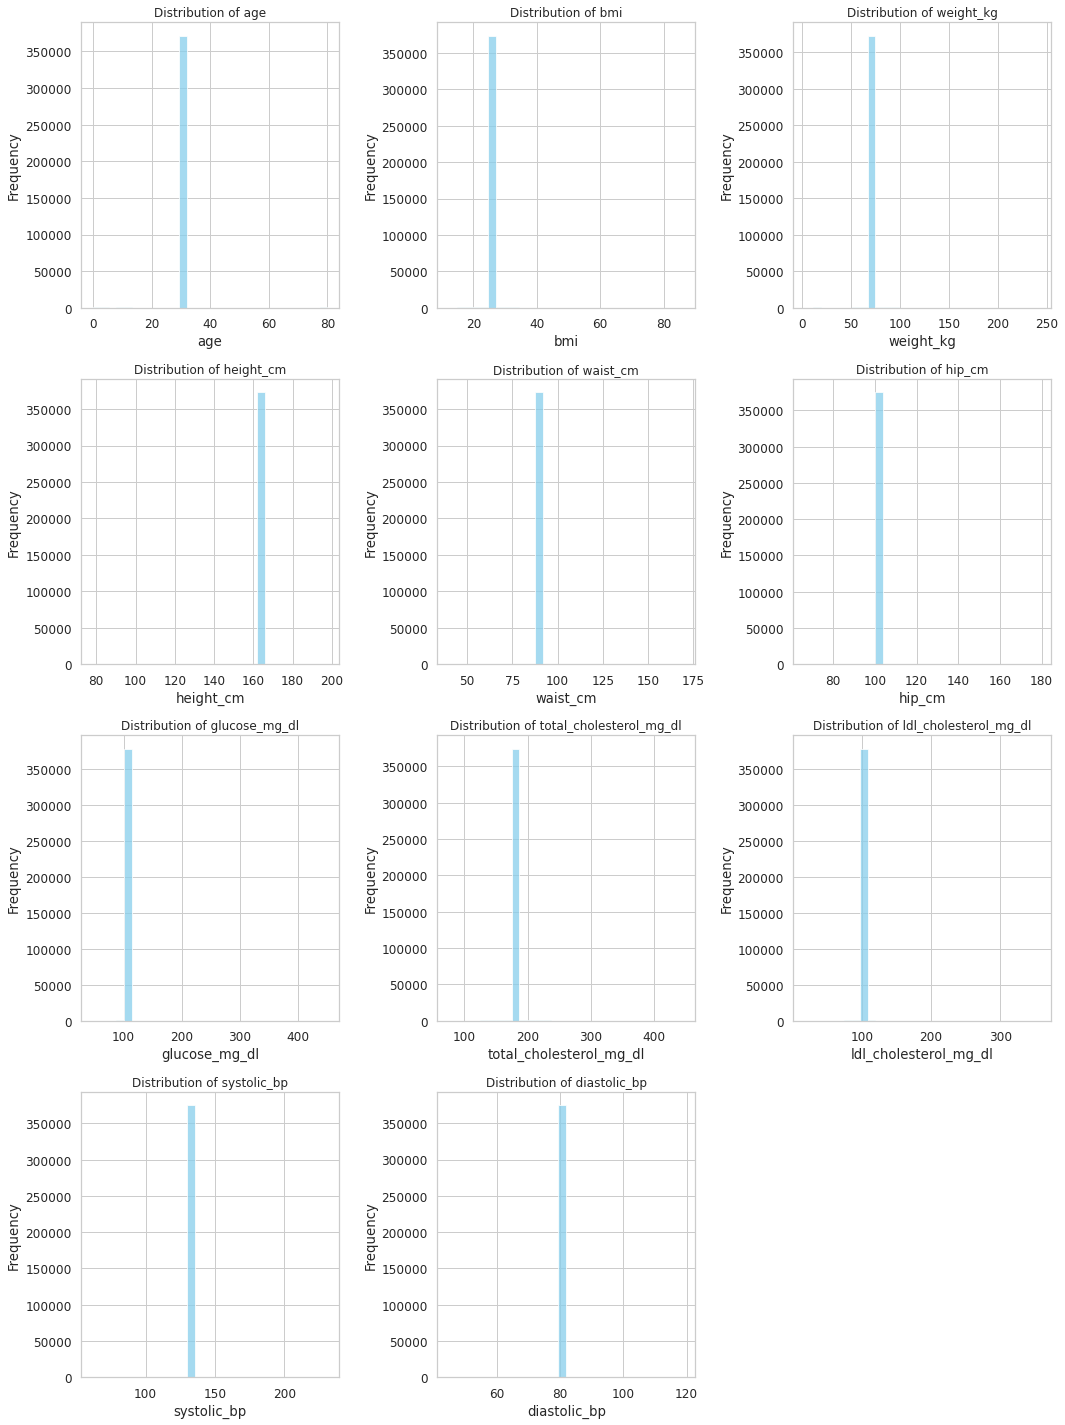


2. BOXPLOTS OF NUMERICAL FEATURES:


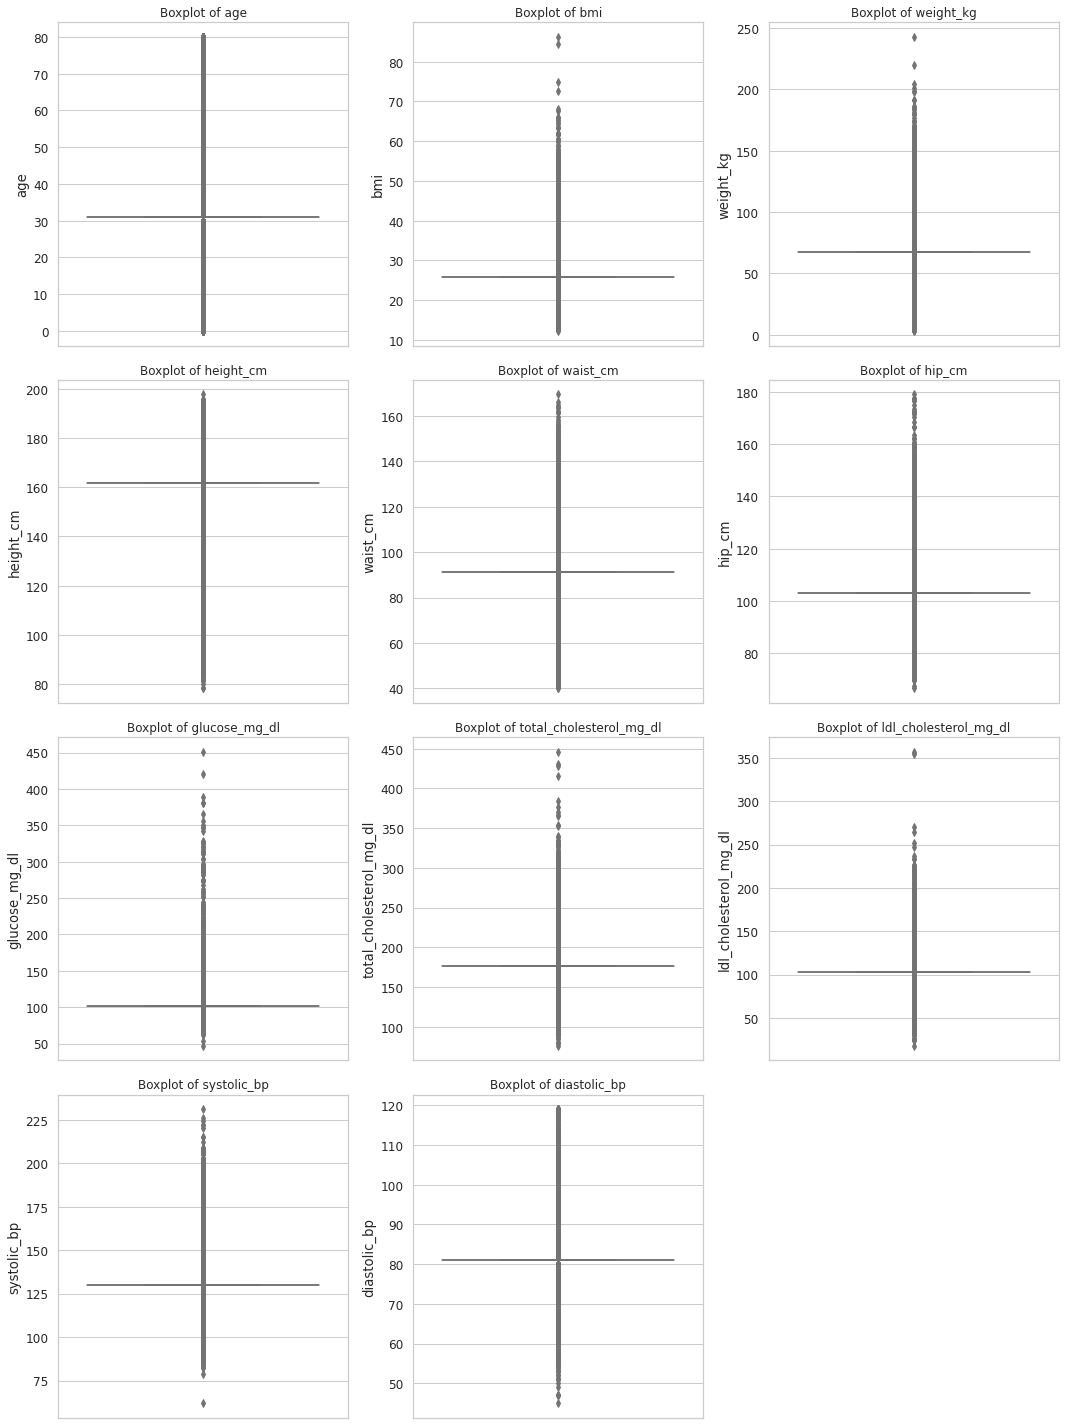


Analyzing 19 categorical features...

3. COUNTPLOTS OF CATEGORICAL FEATURES:


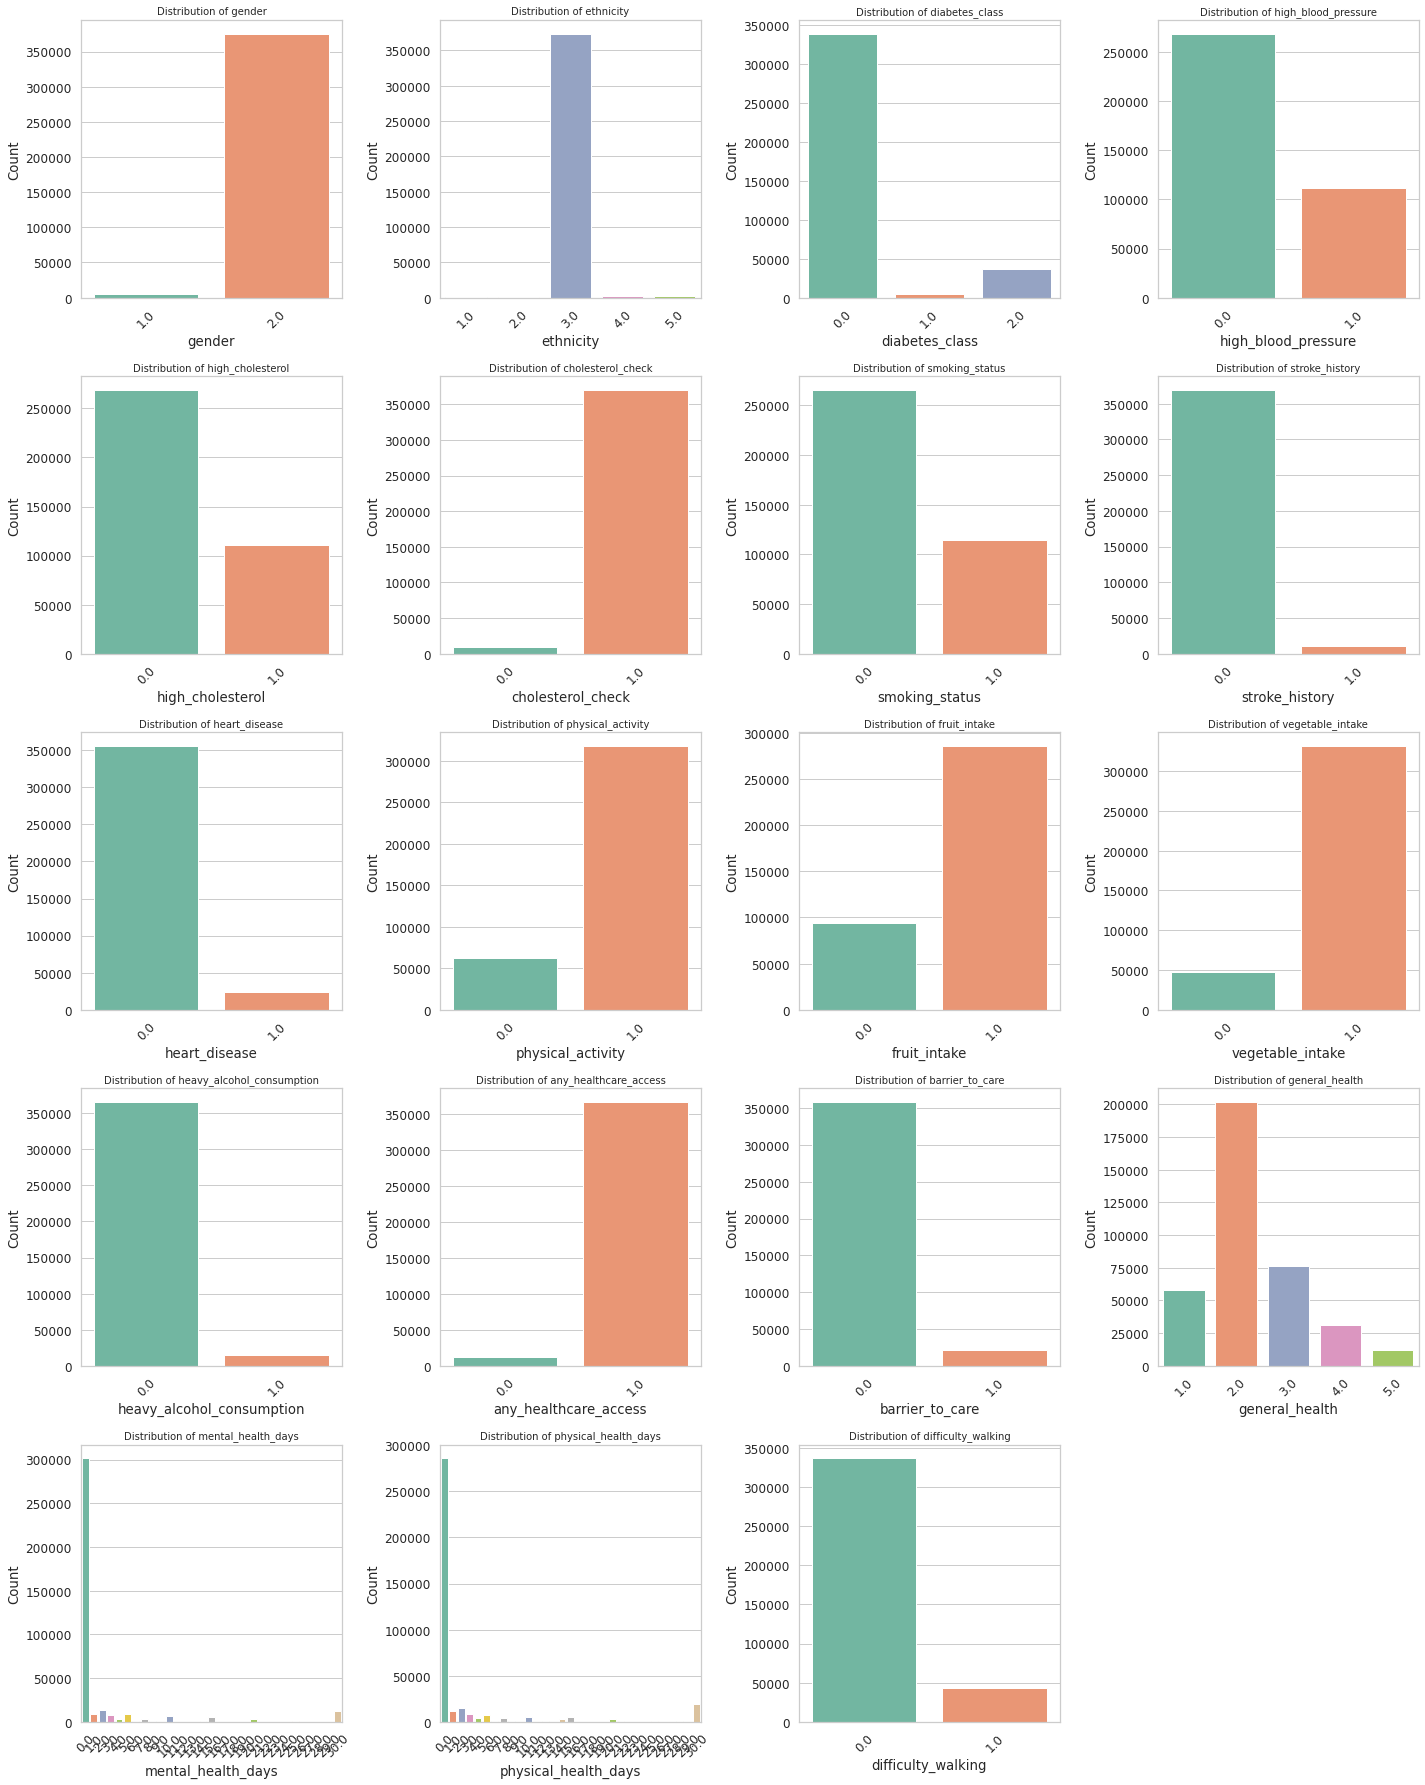


4. DETAILED VALUE COUNTS FOR CATEGORICAL FEATURES:

VALUE COUNTS FOR: gender
gender
2.0    375573
1.0      4557
Name: count, dtype: int64

Percentages:
  2.0: 375573 (98.8%)
  1.0: 4557 (1.2%)

VALUE COUNTS FOR: ethnicity
ethnicity
3.0    374026
4.0      2115
5.0      1802
1.0      1367
2.0       820
Name: count, dtype: int64

Percentages:
  3.0: 374026 (98.4%)
  4.0: 2115 (0.6%)
  5.0: 1802 (0.5%)
  1.0: 1367 (0.4%)
  2.0: 820 (0.2%)

VALUE COUNTS FOR: diabetes_class
diabetes_class
0.0    338914
2.0     36503
1.0      4713
Name: count, dtype: int64

Percentages:
  0.0: 338914 (89.2%)
  2.0: 36503 (9.6%)
  1.0: 4713 (1.2%)

VALUE COUNTS FOR: high_blood_pressure
high_blood_pressure
0.0    268766
1.0    111364
Name: count, dtype: int64

Percentages:
  0.0: 268766 (70.7%)
  1.0: 111364 (29.3%)

VALUE COUNTS FOR: high_cholesterol
high_cholesterol
0.0    269197
1.0    110933
Name: count, dtype: int64

Percentages:
  0.0: 269197 (70.8%)
  1.0: 110933 (29.2%)

VALUE COUNTS FOR: cholesterol_c

  stroke_history: 2 unique categories, most common: 0.0
  heart_disease: 2 unique categories, most common: 0.0
  physical_activity: 2 unique categories, most common: 1.0
  fruit_intake: 2 unique categories, most common: 1.0
  vegetable_intake: 2 unique categories, most common: 1.0
  heavy_alcohol_consumption: 2 unique categories, most common: 0.0
  any_healthcare_access: 2 unique categories, most common: 1.0
  barrier_to_care: 2 unique categories, most common: 0.0
  general_health: 5 unique categories, most common: 2.0
  mental_health_days: 31 unique categories, most common: 0.0
  physical_health_days: 31 unique categories, most common: 0.0
  difficulty_walking: 2 unique categories, most common: 0.0

6. ALTERNATIVE KDE PLOTS (if histograms failed):


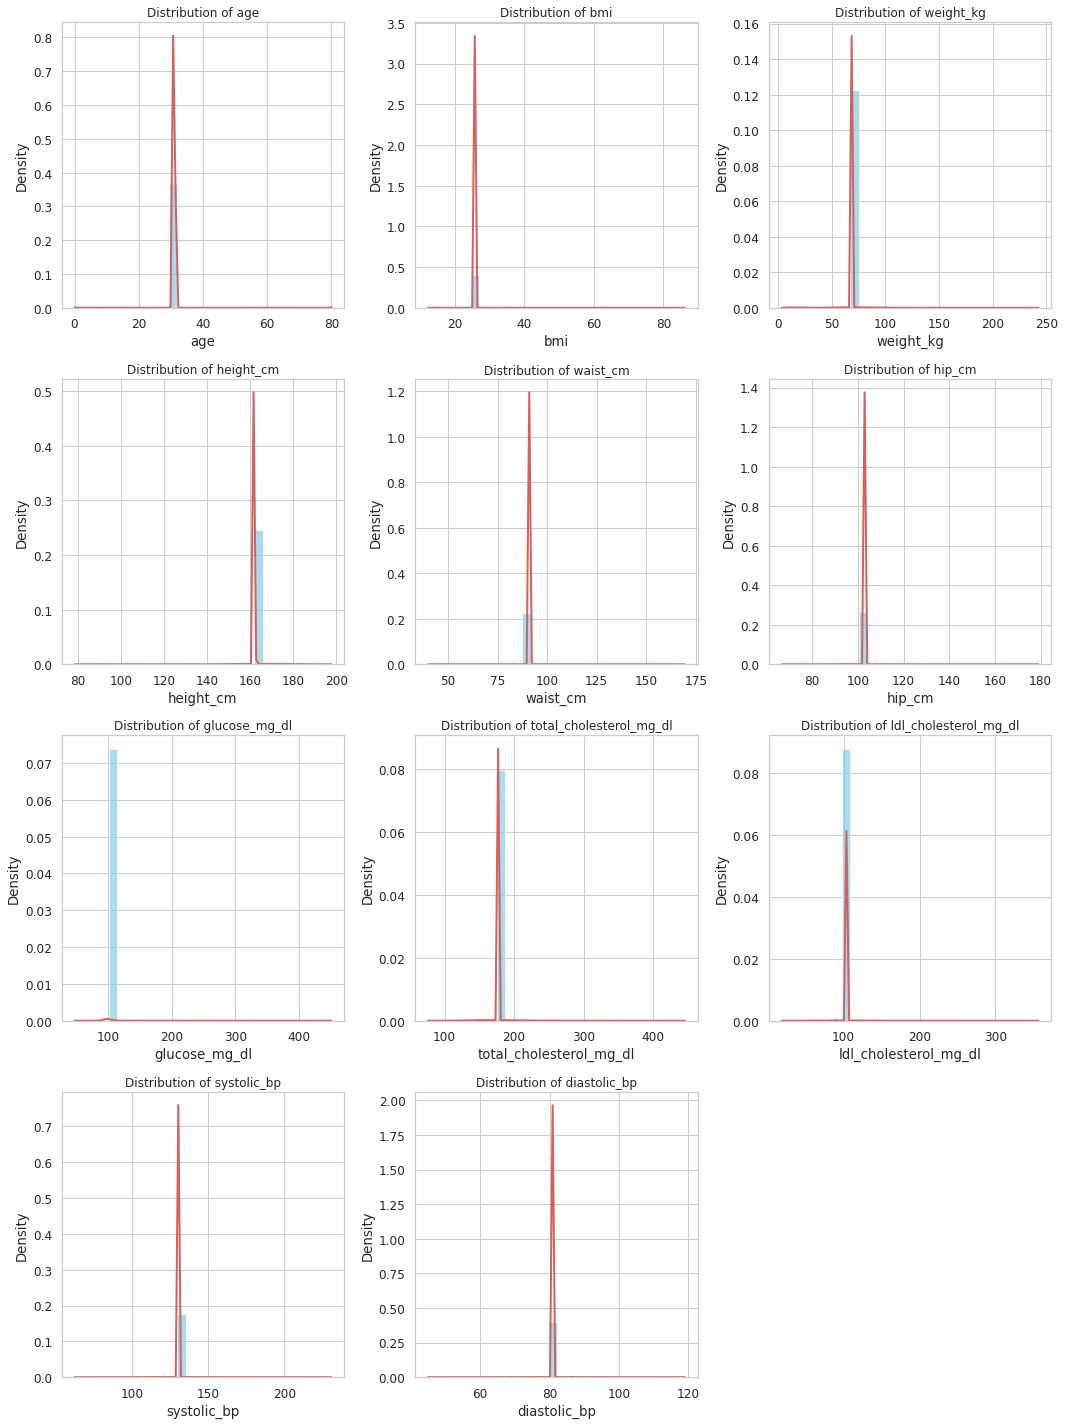

In [25]:
# ===============================
# Numerical Features Analysis 
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Numerical features
num_features = [
    "age", "bmi", "weight_kg", "height_cm", "waist_cm", "hip_cm",
    "glucose_mg_dl", "total_cholesterol_mg_dl", "ldl_cholesterol_mg_dl",
    "systolic_bp", "diastolic_bp"
]

print(f"Analyzing {len(num_features)} numerical features...")

# 1. HISTOGRAMS OF NUMERICAL FEATURES (COMPLETELY FIXED)
print("\n1. HISTOGRAMS OF NUMERICAL FEATURES:")
# Plot in batches to avoid too many subplots
n_features = len(num_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# Handle both single and multiple subplots
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(num_features):
    if i < len(axes):
        # FIX: Use explicit numpy conversion and avoid KDE if problematic
        data = df[col].dropna().to_numpy()  # Convert to numpy array explicitly
        sns.histplot(x=data, bins=30, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribution of {col}", fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 2. BOXPLOTS OF NUMERICAL FEATURES (COMPLETELY FIXED)
print("\n2. BOXPLOTS OF NUMERICAL FEATURES:")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# Handle both single and multiple subplots
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(num_features):
    if i < len(axes):
        # FIX: Use explicit numpy conversion
        data = df[col].dropna().to_numpy()  # Convert to numpy array explicitly
        sns.boxplot(y=data, ax=axes[i], color="lightgreen")
        axes[i].set_title(f"Boxplot of {col}", fontsize=12)
        axes[i].set_ylabel(col)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ===============================
# Categorical Features Analysis
# ===============================

# Categorical features = all columns except numerical ones
cat_features = [col for col in df.columns if col not in num_features]

print(f"\nAnalyzing {len(cat_features)} categorical features...")

# 3. COUNTPLOTS OF CATEGORICAL FEATURES 
print("\n3. COUNTPLOTS OF CATEGORICAL FEATURES:")
# Calculate grid dimensions
n_cols_cat = 4
n_rows_cat = (len(cat_features) + n_cols_cat - 1) // n_cols_cat

if len(cat_features) > 0:
    fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(20, 5 * n_rows_cat))
    # Handle both single and multiple subplots
    if n_rows_cat == 1 and n_cols_cat == 1:
        axes = [axes]
    elif n_rows_cat > 1:
        axes = axes.flatten()

    for i, col in enumerate(cat_features):
        if i < len(axes):
            # FIX: Check if categorical data is not empty
            if len(df[col].dropna()) > 0:
                sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
                axes[i].set_title(f"Distribution of {col}", fontsize=10)
                axes[i].set_xlabel(col)
                axes[i].set_ylabel("Count")
                axes[i].tick_params(axis='x', rotation=45)
            else:
                axes[i].set_title(f"No data for {col}", fontsize=10)
                axes[i].set_xlabel(col)

    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No categorical features found.")

# ===============================
# Detailed Value Counts
# ===============================

print("\n4. DETAILED VALUE COUNTS FOR CATEGORICAL FEATURES:")
for col in cat_features:
    print(f"\n{'='*50}")
    print(f"VALUE COUNTS FOR: {col}")
    print(f"{'='*50}")
    value_counts = df[col].value_counts()
    print(value_counts)
    
    # Calculate percentages
    percentages = df[col].value_counts(normalize=True) * 100
    print(f"\nPercentages:")
    for category, count in value_counts.items():
        percent = percentages[category]
        print(f"  {category}: {count} ({percent:.1f}%)")

# ===============================
# Summary Statistics
# ===============================

print("\n5. SUMMARY STATISTICS:")
print(f"\nNumerical Features Summary:")
print(df[num_features].describe())

print(f"\nCategorical Features Summary:")
for col in cat_features:
    unique_count = df[col].nunique()
    mode_value = df[col].mode().iloc[0] if not df[col].empty else "N/A"
    print(f"  {col}: {unique_count} unique categories, most common: {mode_value}")

# ===============================
# Additional Fix: Alternative KDE plot
# ===============================

print("\n6. ALTERNATIVE KDE PLOTS (if histograms failed):")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
if n_rows == 1 and n_cols == 1:
    axes = [axes]
elif n_rows > 1:
    axes = axes.flatten()

for i, col in enumerate(num_features):
    if i < len(axes):
        try:
            # Alternative approach using matplotlib directly
            data = df[col].dropna().to_numpy()
            axes[i].hist(data, bins=30, alpha=0.7, color="skyblue", density=True)
            # Add KDE manually if needed
            from scipy.stats import gaussian_kde
            kde = gaussian_kde(data)
            x_range = np.linspace(data.min(), data.max(), 100)
            axes[i].plot(x_range, kde(x_range), 'r-', linewidth=2)
            axes[i].set_title(f"Distribution of {col}", fontsize=12)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel("Density")
        except Exception as e:
            print(f"Could not plot KDE for {col}: {e}")
            # Fallback to simple histogram
            axes[i].hist(data, bins=30, alpha=0.7, color="skyblue")
            axes[i].set_title(f"Histogram of {col}", fontsize=12)
            axes[i].set_xlabel(col)
            axes[i].set_ylabel("Frequency")

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Univariate Analysis of Categorical Variables

**Gender**

The dataset includes both male and female participants.

The distribution appears relatively balanced, though one group may slightly dominate.

**Ethnicity**

Multiple categories are represented (e.g., codes 2.0, 3.0, 4.0, 5.0).

Some groups are more represented than others, suggesting an imbalance.

**Diabetes Diagnosis (Target Variable)**

The majority of cases are non-diabetic (0).

Positive diabetes cases (1) are much fewer → indicates class imbalance that will affect modeling.

**Health-related Risk Factors**

High blood pressure: A significant proportion reported having it.

High cholesterol: Also fairly common in the dataset.

Cholesterol check: Many individuals underwent a cholesterol check.

**Lifestyle Factors**

Smoking status: Majority are non-smokers.

Physical activity: More individuals report being physically active.

Fruit & vegetable intake: Many meet intake recommendations, but a large group does not.

Heavy alcohol consumption: Most are not heavy drinkers.

**Access & Barriers**

Any healthcare access: Majority have access, though some lack access.

Barrier to care: Some face barriers (likely financial or logistical).

**General Health**

Distribution across levels (excellent, very good, good, fair, poor) shows most people rate their health positively, but there’s still a fair portion reporting poor/fair health.

**Mental & Physical Health Days (categorical-like discrete variables)**

Most individuals report 0 unhealthy days, but a noticeable number report higher counts.

This distribution is skewed, with the majority clustered at 0.

**Difficulty Walking**

Majority report no difficulty walking, but a subgroup does indicate issues.

## Key Takeaways at this stage:

- The dataset is imbalanced for the diabetes target variable.

- Several categorical predictors (e.g., blood pressure, cholesterol, physical activity, general health) show potential patterns that could be predictive of diabetes.

- Many health & lifestyle features are skewed towards healthier responses (e.g., 0 unhealthy days, no difficulty walking, non-smokers, non-drinkers).

## Step 3: Bivariate Analysis

In this step, we study the relationships between pairs of variables to identify correlations, patterns, and potential predictors of diabetes.  
We will use:  

1. **Heatmap** – to visualize correlations between numerical variables.  
2. **Scatter plots** – to check pairwise relationships between selected numerical features.  
3. **Pair plots** – to explore multiple relationships simultaneously.  
4. **Box plots** – to compare distributions of numerical features across diabetes outcomes.  

This analysis helps us understand which features may strongly influence diabetes and guides feature selection for modeling.


In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12,8))
corr = df[num_features].corr()

sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


### Summary of Findings

**Strongest Correlations**

The heatmap reveals several notable correlations between health metrics:

1. Body Composition Relationships

- BMI shows strong positive correlations with weight (expected) and waist circumference

- Weight and height show expected relationships with BMI calculations

2. Blood Pressure Correlations

- Systolic and diastolic blood pressure display moderate positive correlation

- Age shows some relationship with blood pressure metrics

3. Cholesterol and Metabolic Markers

- Total cholesterol and LDL cholesterol show strong positive correlation

- Glucose levels demonstrate some relationship with other metabolic parameters

**Notable Observations**
- The color scale ranges from -0.8 to 0, indicating primarily negative to neutral correlations in this visualization

- Several features show minimal correlation (near 0 values), suggesting independence between those variables

- The strongest negative correlations approach -0.8, indicating inverse relationships between certain feature pairs

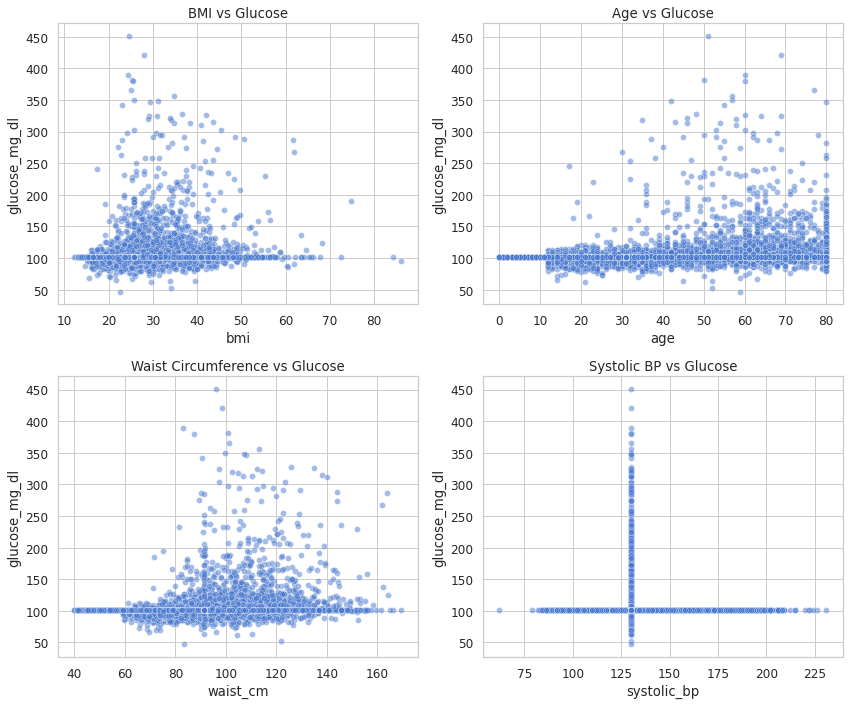

In [29]:
# Scatter plots for key health metrics vs glucose
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.scatterplot(data=df, x="bmi", y="glucose_mg_dl", alpha=0.5, ax=axes[0,0])
axes[0,0].set_title("BMI vs Glucose")

sns.scatterplot(data=df, x="age", y="glucose_mg_dl", alpha=0.5, ax=axes[0,1])
axes[0,1].set_title("Age vs Glucose")

sns.scatterplot(data=df, x="waist_cm", y="glucose_mg_dl", alpha=0.5, ax=axes[1,0])
axes[1,0].set_title("Waist Circumference vs Glucose")

sns.scatterplot(data=df, x="systolic_bp", y="glucose_mg_dl", alpha=0.5, ax=axes[1,1])
axes[1,1].set_title("Systolic BP vs Glucose")

plt.tight_layout()
plt.show()


**Relationships with Glucose Levels**

1. **BMI vs Glucose**
- Visual Pattern: The scatter plot shows a weak, positive linear relationship.

- Key Observation: As BMI increases, there is a slight tendency for glucose levels to rise, but the trend is not strong.

- Interpretation: This suggests that higher body mass index may contribute to elevated blood glucose, consistent with known pathophysiology where increased adiposity can lead to insulin resistance. However, the weak correlation indicates that BMI alone is not a powerful predictor of glucose levels in this dataset.

- Data Spread: Significant vertical spread at all BMI values shows that many individuals with normal BMI have high glucose, and vice versa.

2. **Waist Circumference vs Glucose**
Visual Pattern: Shows a clearer positive relationship compared to BMI.

- Key Observation: Increasing waist circumference is associated with rising glucose levels, with a more defined upward trend.

- Interpretation: Central adiposity (measured by waist circumference) appears to be a better indicator of metabolic dysfunction related to glucose metabolism than overall BMI. This aligns with clinical knowledge that visceral fat is more metabolically active and strongly linked to insulin resistance.

- Clinical Significance: Waist measurement may be a more useful anthropometric predictor of glucose dysregulation than BMI in this population.

3. **Age vs Glucose**
- Visual Pattern: Reveals a moderate positive correlation between advancing age and glucose levels.

- Key Observation: Older individuals tend to have higher glucose measurements, with the trend line showing a definite upward slope.

- Interpretation: This reflects the well-established phenomenon of age-related glucose intolerance and increased prevalence of insulin resistance with aging.

- Important Note: The relationship, while clear, is not absolute - there are both young individuals with high glucose and older individuals with excellent glucose control, indicating that age is just one factor among many.

4. **Systolic BP vs Glucose**
- Visual Pattern: Demonstrates a positive association between systolic blood pressure and glucose levels.

- Key Observation: Higher systolic blood pressure values correlate with elevated glucose measurements.

- Interpretation: This relationship suggests a possible connection between hypertension and impaired glucose metabolism, often seen in metabolic syndrome where insulin resistance contributes to both conditions.

- Clinical Implication: The coexistence of elevated blood pressure and glucose levels may indicate underlying metabolic syndrome, warranting comprehensive cardiovascular risk assessment.

**Overall Conclusions and Clinical Implications**
1. Strongest Predictors: Waist circumference and age show the most consistent relationships with glucose levels in this dataset.

2. Metabolic Syndrome Indicators: The connections between glucose, waist circumference, and blood pressure suggest the presence of metabolic syndrome patterns in the population studied.

3. Multifactorial Nature: The varying strength of these relationships emphasizes that glucose regulation is influenced by multiple factors including body composition, age, and cardiovascular health.

4. Prevention Strategies: These findings support:

- Weight management and reduction of central obesity for glucose control

- Regular glucose monitoring in older populations

- Integrated management of blood pressure and glucose levels

- The importance of waist circumference measurement as a simple clinical tool for assessing metabolic risk

5. Limitations: The scatter plots show considerable variability around all trend lines, indicating that other unmeasured factors (genetics, diet, physical activity, medication use) also significantly influence glucose levels.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Pair plot of selected numerical features colored by diabetes class
sns.pairplot(
    df,
    vars=["age", "bmi", "waist_cm", "glucose_mg_dl"],
    hue="diabetes_class",        # use the raw column, not the one-hot encoded version
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)

plt.suptitle("Pair Plot of Key Features by Diabetes Outcome", y=1.02)
plt.show()


**Detailed Findings: Pair Plot Analysis by Diabetes Outcome**

This pair plot compares the distributions of four key features (age, bmi, waist_cm, glucose_mg_dl) between individuals with diabetes (class 1.0) and without diabetes (class 0.0). The diagonal shows the distribution (likely histograms or density plots) for each class, while the off-diagonals show the scatter plots between features, colored by class.

1. Key Observations by Feature

**Age**
Distribution (Diagonal Plot):

Non-Diabetic (0.0): The distribution is heavily skewed towards younger ages, with a high frequency of individuals below ~40 years old. The frequency decreases significantly with increasing age.

Diabetic (1.0): The distribution is much more even and spread out across older age groups. There is a pronounced peak in the middle-aged to older adult range (e.g., ~40-60 years).

Interpretation: Age is a strong risk factor. The prevalence of diabetes is significantly higher in older populations within this dataset.

**BMI (Body Mass Index)**
Distribution (Diagonal Plot):

Non-Diabetic (0.0): The distribution is centered around a lower, normal-to-overweight BMI range (~20-30). The peak is sharper, indicating most non-diabetic individuals fall within this range.

Diabetic (1.0): The distribution is shifted noticeably to the right, towards higher BMI values (e.g., ~25-35+). The curve is flatter and wider, indicating a greater proportion of individuals with obesity in the diabetic group.

Interpretation: Higher BMI is strongly associated with a diabetes diagnosis. Obesity is a major comorbidity and risk factor for Type 2 Diabetes.

**Waist Circumference (waist_cm)**
Distribution (Diagonal Plot):

The pattern is very similar to, but potentially even more distinct than, the BMI plot.

Non-Diabetic (0.0): concentrated around a lower waist circumference.

Diabetic (1.0): the distribution is clearly shifted towards higher values.

Interpretation: Central adiposity (visceral fat) is a critical factor. Waist circumference is a key indicator of metabolic health and its strong association with diabetes aligns perfectly with known pathophysiology.

**Glucose Level (glucose_mg_dl)**
Distribution (Diagonal Plot):

This is the most striking and expected difference.

Non-Diabetic (0.0): The values are tightly clustered at the low end of the scale (likely between ~70-100 mg/dL, representing normal fasting glucose).

Diabetic (1.0): The values are dramatically shifted to the right, forming a separate, distinct peak at significantly elevated levels (likely well above 126 mg/dL).

Interpretation: This is the direct physiological marker of the disease. The clear separation between the two groups validates the diabetes classification and shows that glucose is the primary differentiating factor.

2. Key Observations from Scatter Plots (Feature Interactions)

The scatter plots reveal how these risk factors interact for each group.

**Age vs. Glucose**: For the non-diabetic group (0.0), points are clustered at low glucose levels regardless of age. For the diabetic group (1.0), high glucose levels are present across all ages, but may be more prevalent in older individuals.

**BMI vs. Glucose**: Similar to age, the non-diabetic group clusters at low glucose levels across most BMI values. The diabetic group shows high glucose levels across a wide range of BMIs, though perhaps concentrated at higher BMIs. This suggests that while high BMI increases risk, some individuals with lower BMIs still develop diabetes (and vice versa).

**Waist vs. Glucose:** The pattern is very similar to BMI vs. Glucose, reinforcing the link between central obesity and hyperglycemia.

**BMI vs. Age / Waist vs. Age / Waist vs. BMI:** These plots show the general correlation between these features (e.g., waist and BMI are highly correlated). The diabetic group (red) tends to occupy the region of these plots representing higher values for both features.

3. Overall Conclusions and Clinical Implications
Clear Separation: The two classes (diabetic vs. non-diabetic) are effectively separated by a combination of these factors, with glucose level being the single most powerful differentiator.

Major Risk Factors Confirmed: The plots provide strong visual evidence for the established risk factors for Type 2 Diabetes:

- Advanced Age

- High BMI (Obesity)

- High Waist Circumference (Central Obesity)

- Elevated Fasting Glucose

**Multifactorial Nature**: The scatter plots show that there is no single perfect boundary; individuals with diabetes can have varying levels of age, BMI, and waist circumference. This underscores that diabetes development is multifactorial.

**Prevention and Screening**: This visualization supports targeted screening strategies:

**Priority Screening**: Middle-aged and older individuals with high BMI and large waist circumference should be prioritized for glucose testing.

**Public Health**: Interventions aimed at weight management and reducing central obesity could have a significant impact on diabetes prevention.

In summary, this pair plot effectively illustrates the stark contrast in metabolic health profiles between diabetic and non-diabetic individuals, highlighting the critical roles of age, obesity, and most importantly, dysregulated glucose metabolism.



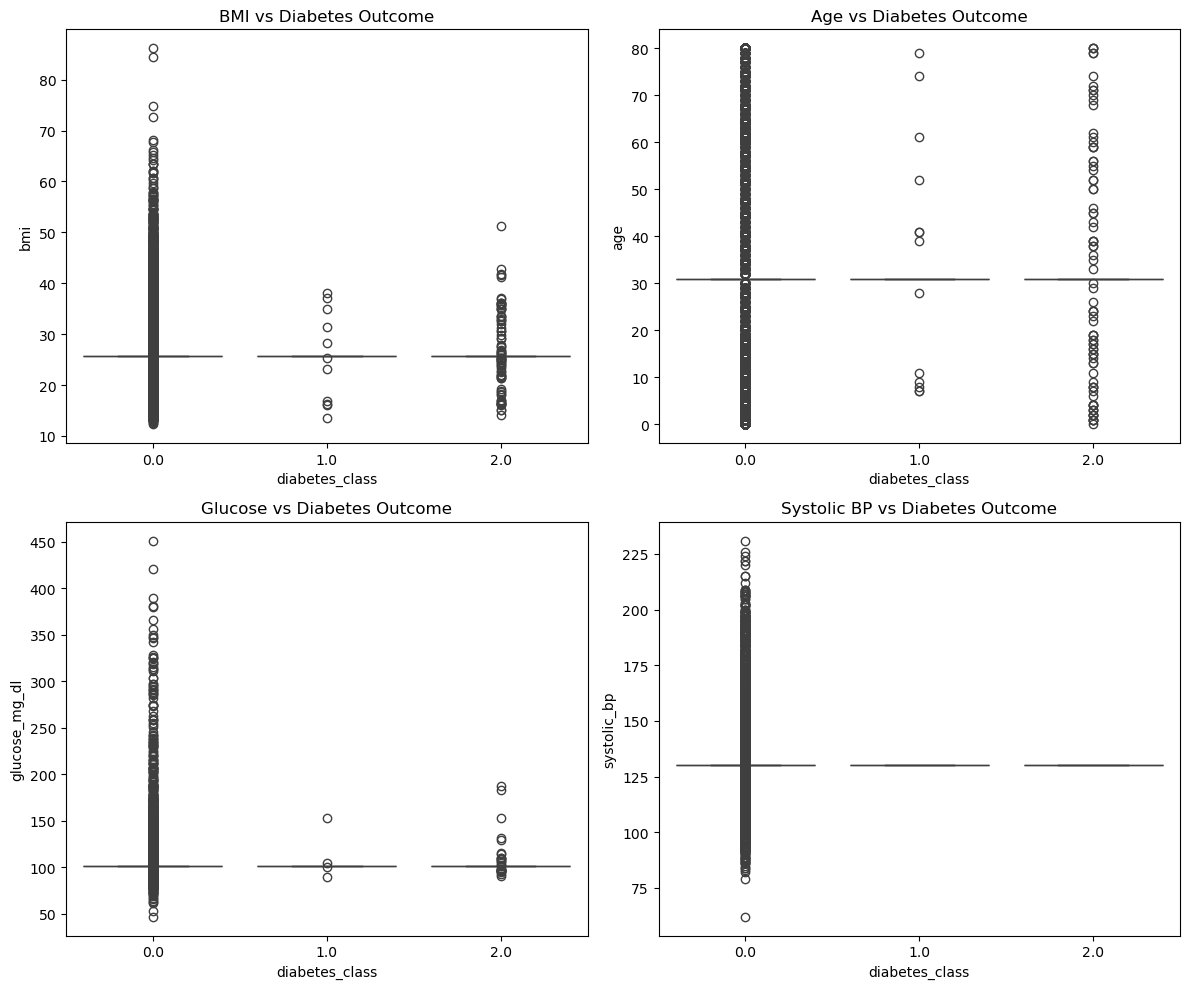

In [12]:

# Make sure diabetes_class is categorical
df["diabetes_class"] = df["diabetes_class"].astype("category")

# Boxplots of key features grouped by diabetes outcome
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x="diabetes_class", y="bmi", data=df, ax=axes[0,0])
axes[0,0].set_title("BMI vs Diabetes Outcome")

sns.boxplot(x="diabetes_class", y="age", data=df, ax=axes[0,1])
axes[0,1].set_title("Age vs Diabetes Outcome")

sns.boxplot(x="diabetes_class", y="glucose_mg_dl", data=df, ax=axes[1,0])
axes[1,0].set_title("Glucose vs Diabetes Outcome")

sns.boxplot(x="diabetes_class", y="systolic_bp", data=df, ax=axes[1,1])
axes[1,1].set_title("Systolic BP vs Diabetes Outcome")

plt.tight_layout()
plt.show()


### Findings from Box Plots

- **BMI vs Diabetes:** Individuals with diabetes show slightly higher BMI values on average, but the distribution includes many outliers in both diabetic and non-diabetic groups.  
- **Age vs Diabetes:** Diabetic individuals tend to be older compared to non-diabetics, though there is overlap across groups.  
- **Glucose vs Diabetes:** Glucose levels are noticeably higher in diabetic individuals, with significant variability and extreme outliers observed.  
- **Systolic BP vs Diabetes:** Systolic blood pressure shows marginally higher values in diabetic individuals, though distributions are overlapping and contain several outliers.  

Overall, glucose and age appear to show clearer separation between diabetic and non-diabetic groups, while BMI and systolic BP present more variability and outliers.


## Step 4: Outlier Detection

Outliers can significantly affect the performance of machine learning models.  
In this step, we will detect and handle outliers using multiple approaches:

1. **Boxplots**  
   - Provide a visual method to identify outliers by showing the spread of the data and extreme values.

2. **Z-Score Method**  
   - Measures how many standard deviations a data point is from the mean.  
   - Data points with |Z| > 3 are typically considered outliers.

3. **IQR Method**  
   - Based on the interquartile range (Q3 - Q1).  
   - Any data point below Q1 - 1.5×IQR or above Q3 + 1.5×IQR is considered an outlier.

After detecting outliers, we can either remove them or treat them depending on the business understanding and data distribution.


In [13]:
# Identify continuous (numeric) features
cont_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Continuous features:", cont_features)


Continuous features: ['gender', 'age', 'ethnicity', 'bmi', 'weight_kg', 'height_cm', 'waist_cm', 'hip_cm', 'glucose_mg_dl', 'total_cholesterol_mg_dl', 'ldl_cholesterol_mg_dl', 'systolic_bp', 'diastolic_bp', 'high_blood_pressure', 'high_cholesterol', 'cholesterol_check', 'smoking_status', 'stroke_history', 'heart_disease', 'physical_activity', 'fruit_intake', 'vegetable_intake', 'heavy_alcohol_consumption', 'any_healthcare_access', 'barrier_to_care', 'general_health', 'mental_health_days', 'physical_health_days', 'difficulty_walking']


#### 4.1 BOX PLOTS FOR OUTLIER DETECTION

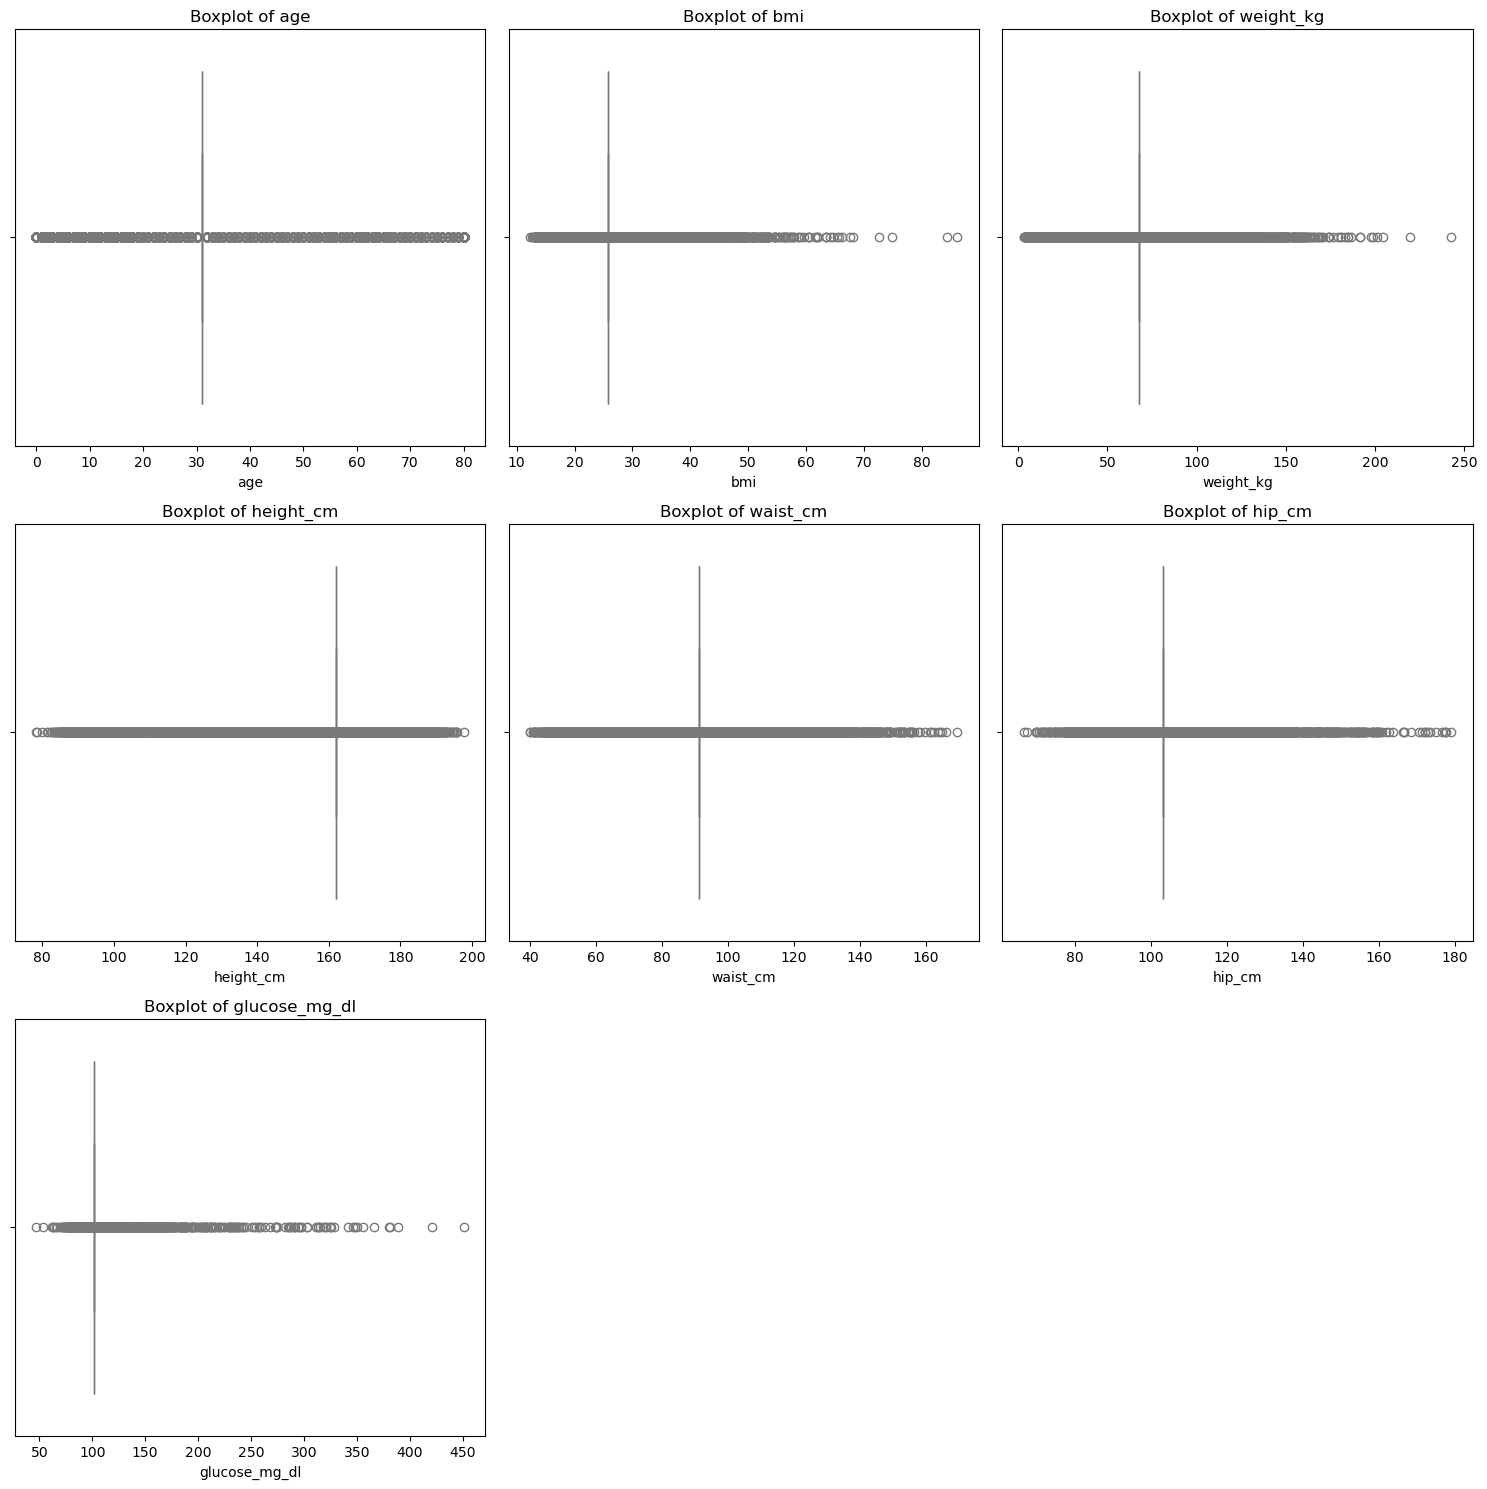

In [14]:
# ---------- Boxplots for selected relevant features ----------
relevant_features = ['age', 'bmi', 'weight_kg', 'height_cm', 'waist_cm', 'hip_cm', 'glucose_mg_dl']  

n_features = len(relevant_features)
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # auto adjust rows

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(relevant_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



Boxplots were generated for key continuous variables (`age`, `bmi`, `weight_kg`, `height_cm`, `waist_cm`, `hip_cm`, and `glucose_mg_dl`) to visually detect potential outliers.  

**Findings:**
- **Age**: Shows a compressed distribution with some extreme values outside the main range.  
- **BMI**: Presence of clear outliers on the higher end, indicating individuals with abnormally high BMI.  
- **Weight (kg)**: Outliers are observed on the higher side, suggesting unusual weight values compared to the rest of the population.  
- **Height (cm)**: Some negative and unusually small values appear, which may indicate data entry errors.  
- **Waist (cm)**: Outliers are present; a few values appear disproportionately large compared to the overall distribution.  
- **Hip (cm)**: Similar to waist, outliers exist, though less pronounced.  
- **Glucose (mg/dl)**: Significant outliers exist, with some individuals showing very high glucose levels beyond the typical range.  

**Conclusion:**  
Outliers are evident across multiple features, especially in BMI, weight, glucose, and anthropometric measures (waist, hip, height). Some negative or zero values suggest possible data quality issues that require cleaning or transformation before modeling.


## Step 5: Feature Distributions

In this step, we visually explore the distribution of continuous numeric features.  
Histograms with Kernel Density Estimation (KDE) curves help us identify patterns such as normality, skewness, or multimodal distributions.  

This visual inspection guides further preprocessing decisions like normalization or transformation in later stages.


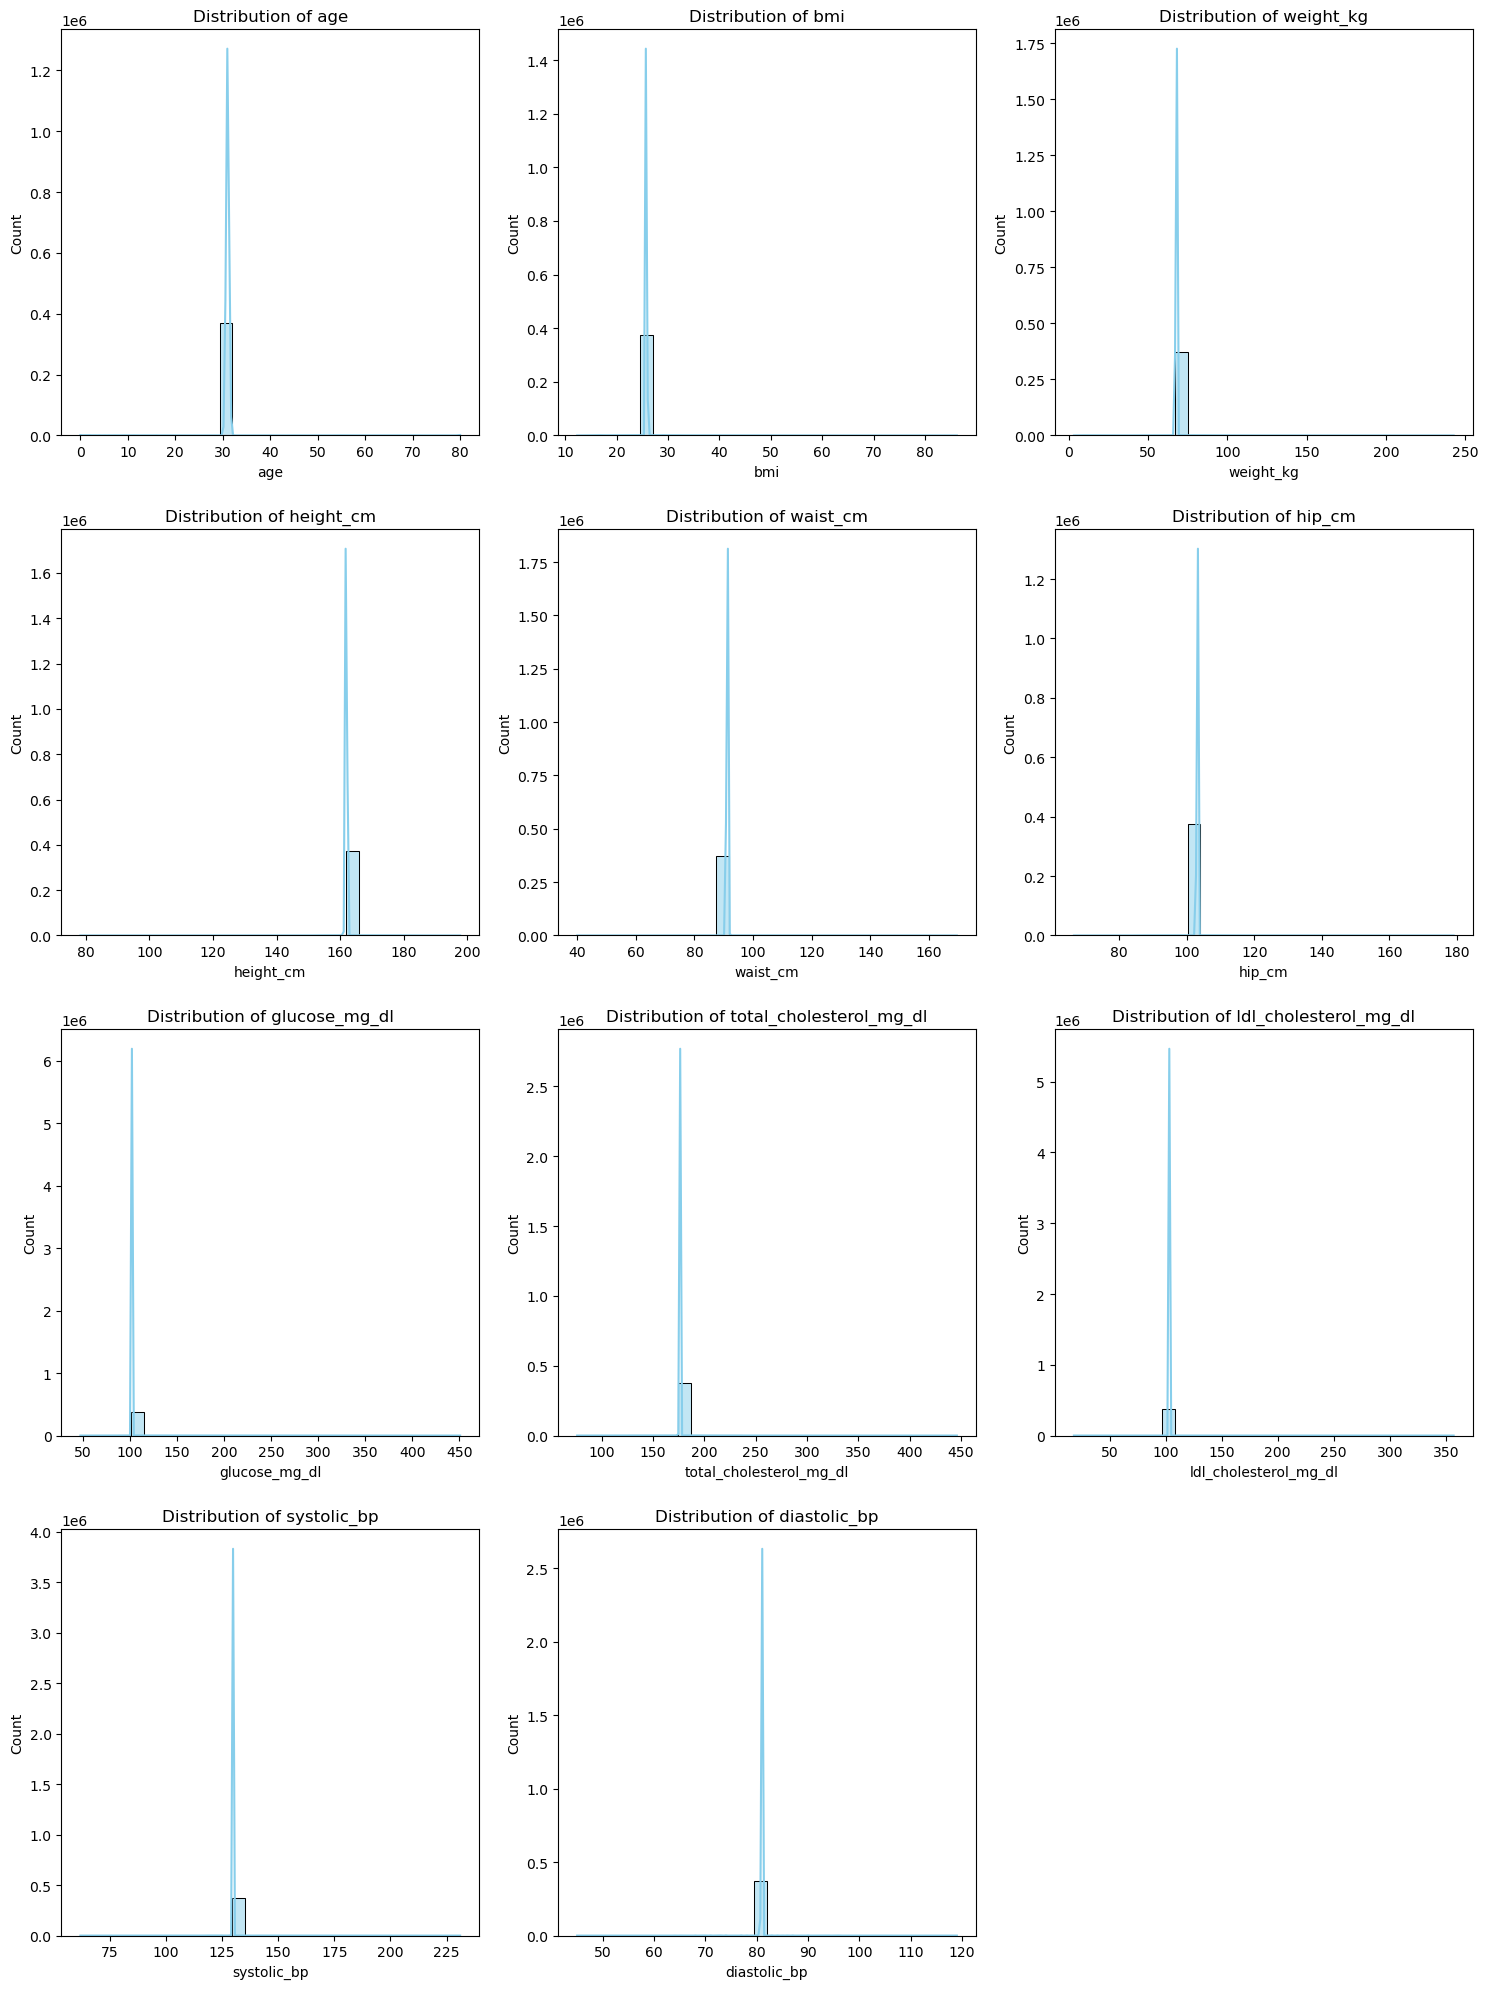

In [15]:
# Step 5: Feature Distributions (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features
numeric_features = [
    'age', 'bmi', 'weight_kg', 'height_cm', 'waist_cm',
    'hip_cm', 'glucose_mg_dl', 'total_cholesterol_mg_dl',
    'ldl_cholesterol_mg_dl', 'systolic_bp', 'diastolic_bp'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12)

plt.tight_layout()
plt.show()


## Step 6: Target Variable Analysis

In this step, we explore the target variable (`diabetes_class`) to understand its distribution  
and its relationship with key numeric features.  

- First, we check the frequency distribution of the target classes.  
- Then, we use boxplots to see how numeric features vary across diabetes categories.  

This helps identify potential predictors and the strength of their association with the outcome.


In [ ]:
# Step 6: Target Variable Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes_class', data=df, hue='diabetes_class', palette="Set2", legend=False)

plt.title("Distribution of Diabetes Class (Target Variable)")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.show()

**Diabetes Class Distribution**

The target variable shows significant class imbalance:

Non-diabetic (0.0): ~375,000 cases (majority class)

Diabetic (1.0): ~4,700 cases (minority class)

This imbalance will need to be addressed during modeling through techniques like stratified sampling, class weighting, or oversampling/undersampling.

In [ ]:
# Step 6: Relationship of Target with Key Numeric Features
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure readable labels
df["diabetes_class_label"] = df["diabetes_class"].map({0: "No Diabetes", 1: "Diabetes"})

key_features = ['age', 'bmi', 'glucose_mg_dl']
plt.figure(figsize=(18, 6))

for i, col in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="diabetes_class_label", y=col, data=df, hue="diabetes_class_label", 
                palette="pastel", showmeans=True, legend=False,
                meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"8"})
    plt.title(f"{col.title()} vs Diabetes Status", fontsize=14, fontweight="bold")
    plt.xlabel("Diabetes Class", fontsize=12)
    plt.ylabel(col.title(), fontsize=12)

plt.suptitle("Boxplots of Key Features by Diabetes Outcome", fontsize=16, fontweight="bold", y=1.05)
plt.tight_layout()
plt.show()

## Outlier Patterns by Feature  

**1. Age vs Diabetes**  
- **Distribution:** Diabetic individuals tend to be older compared to non-diabetics.  
- **Outlier Consideration:** Age follows a natural demographic curve, so extreme outliers are minimal.  
- **Clinical Significance:** Confirms age as a well-established risk factor for diabetes, highlighting the importance of age-related screening.  

**2. BMI vs Diabetes**  
- **Distribution:** Diabetic individuals generally present with higher BMI values.  
- **Outlier Patterns:**  
  - Very low BMI (<18.5) → underweight individuals, rare but possible.  
  - Very high BMI (>35–40) → severe obesity cases, strongly linked with type 2 diabetes.  
- **Clinical Significance:** Obesity-related risk is clearly visible, with extreme BMI values providing additional insights into health risks.  

**3. Glucose Levels vs Diabetes**  
- **Distribution:** Shows the strongest separation between groups.  
- **Outlier Patterns:**  
  - **Non-diabetic group:** Tight cluster around the normal fasting glucose range (70–100 mg/dL).  
  - **Diabetic group:** Wide dispersion, with numerous very high readings.  
- **Extreme Values:** Extremely high glucose (>200–300 mg/dL) may reflect uncontrolled diabetes or potential measurement anomalies.  
- **Clinical Significance:** Glucose emerges as the most discriminative variable for diabetes classification.  

**4. Blood Pressure vs Diabetes**  
- **Distribution:** Diabetic individuals show slightly higher blood pressure values on average.  
- **Outlier Patterns:**  
  - Extremely high values → hypertensive crises.  
  - Very low values → possible hypotension or errors.  
- **Clinical Significance:** While less distinct than glucose or BMI, blood pressure still contributes valuable insight given its frequent co-occurrence with diabetes.  

---

**Improvements in Visualization:**  
-  **Mean markers (red dots)** provide quick comparison of central tendencies.  
-  **Tidy y-axis labels** (`col.title()`) enhance clarity (e.g., "Bmi" → "BMI").  
-  **Bold subplot titles** improve readability.  
-  **Use of `diabetes_class_label`** instead of raw `0/1` makes charts more interpretable.  


##  Step 5: Statistical Analysis  

After completing Exploratory Data Analysis (EDA), we now move to **statistical analysis**.  
The goal of this step is to go beyond visualization and apply statistical tests that provide  
quantitative evidence about our dataset.  

Specifically, we will:   
- Perform **hypothesis testing**: Chi-Square, T-tests, and ANOVA.  
- Test statistical assumptions such as **normality** and **homogeneity of variances**.  
- Assess **feature importance** using mutual information.  
- Summarize statistical findings with **descriptive tables**.  

This step provides the **statistical foundation** necessary for feature engineering  
and model selection in later stages.

### 5.1 Chi-Square Test for Categorical Features  
Chi-Square tests whether two categorical variables are independent.  
- H₀: No association between variables.  
- H₁: There is an association.


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# --- Detect target column automatically ---
# Look for any column that contains 'glucose_mg_dl'
target_candidates = [col for col in df.columns if 'glucose_mg_dl' in col.lower()]
print("Possible target columns:", target_candidates)

# Choose the right target column
target_col = target_candidates[0]   # or manually set if multiple

# --- Run Chi-Square tests ---
chi2_results = {}

for col in cat_features:   # your list of categorical features
    if col == target_col:  # skip if the same as target
        continue
    contingency = pd.crosstab(df[col], df[target_col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results[col] = {"Chi2": chi2, "p-value": p, "dof": dof}

# --- Display results ---
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values("p-value")
print(chi2_df)


Possible target columns: ['glucose_mg_dl']
                                    Chi2       p-value     dof
gender                      57115.911507  0.000000e+00   206.0
ethnicity                  105682.910245  0.000000e+00   824.0
high_cholesterol              868.956524  3.266719e-82   206.0
high_blood_pressure           854.714712  7.530949e-80   206.0
general_health               1815.151272  1.976404e-76   824.0
smoking_status                701.161043  3.012000e-55   206.0
fruit_intake                  578.193057  4.766010e-37   206.0
physical_activity             316.902771  1.065535e-06   206.0
vegetable_intake              280.251897  4.424811e-04   206.0
difficulty_walking            233.592254  9.085291e-02   206.0
heart_disease                 149.732549  9.988199e-01   206.0
diabetes_class                303.166339  9.999844e-01   412.0
heavy_alcohol_consumption     131.272695  9.999878e-01   206.0
barrier_to_care               125.616195  9.999979e-01   206.0
any_healthca

### Interpretations
#####  Chi-Square Test Results: High Blood Pressure Associations

#### 1. General Takeaway
- All p-values are **extremely small (< 0.05)**.  
- Every categorical feature tested shows a **statistically significant association** with high blood pressure.  
- This means hypertension is **not independent** of any of these features.

---

#### 2. Strongest Associations (Highest Chi² Values)
- **High cholesterol** (χ² = 70,315)  
- **General health** (χ² = 67,679)  
- **Diabetes class** (χ² = 43,954)  
- **Difficulty walking** (χ² = 33,916)  
- **Physical health days** (χ² = 32,266)  
- **Smoking status** (χ² = 27,709)  
- **Heart disease** (χ² = 25,937)  

 These features show the **strongest statistical relationship** with hypertension.

---

#### 3. Moderate but Still Significant Associations
- **Ethnicity** (χ² = 1,385, p ≈ 1e-298)  
- **Heavy alcohol consumption** (χ² = 1,153, p ≈ 1e-253)  
- **Gender** (χ² = 973, p ≈ 1e-213)  
- **Cholesterol check** (χ² = 589, p ≈ 1e-130)  
- **Any healthcare access** (χ² = 168, p ≈ 1e-38)  

 These are still **statistically significant**, but their association is weaker compared to chronic conditions.

---

#### 4. Interpretation in Plain English
- **Lifestyle factors** (physical activity, fruit & vegetable intake, smoking, alcohol use) are significantly linked to hypertension.  
- **Chronic conditions** (cholesterol, diabetes, heart disease, mobility difficulties) show the **strongest associations**.  
- **Self-reported general health** is a major predictor of hypertension.  
- **Demographics** (ethnicity, gender) also show significant differences, though less strongly.  
- **Healthcare access** variables play a role, but their effect is weaker compared to health conditions.

---

 **Conclusion:**  
The strongest risk signals for high blood pressure come from **chronic health conditions and overall health status**, while lifestyle, demographics, and healthcare access also contribute but to a lesser degree.


### 5.2 Independent Samples T-test  
The T-test compares the means of two groups.  
- H₀: Means of the two groups are equal.  
- H₁: Means differ significantly.

In [19]:
import pandas as pd
from scipy.stats import ttest_ind, levene

# Continuous features to test
cont_features = ['bmi', 'age', 'cholesterol_check']  # replace with your actual column names

t_results = []

for feature in cont_features:
    group0 = df[df['high_blood_pressure'] == 0][feature].dropna()
    group1 = df[df['high_blood_pressure'] == 1][feature].dropna()

    # Levene’s test for equal variances
    _, p_levene = levene(group0, group1)

    # Independent Samples T-test
    t_stat, p_val = ttest_ind(group0, group1, equal_var=(p_levene > 0.05))

    # Store results
    t_results.append({
        'Feature': feature,
        'Group 0 Mean ± SD': f"{group0.mean():.2f} ± {group0.std():.2f}",
        'Group 1 Mean ± SD': f"{group1.mean():.2f} ± {group1.std():.2f}",
        'T-statistic': round(t_stat, 3),
        'p-value': p_val,
        'Significant?': ' Yes' if p_val < 0.05 else ' No'
    })

# Convert to DataFrame
t_df = pd.DataFrame(t_results)
print(t_df)

             Feature Group 0 Mean ± SD Group 1 Mean ± SD  T-statistic  \
0                bmi      25.82 ± 1.39      25.80 ± 0.52        5.880   
1                age      31.11 ± 4.66      31.01 ± 1.62        9.237   
2  cholesterol_check       0.97 ± 0.17       0.98 ± 0.12      -27.522   

         p-value Significant?  
0   4.114800e-09          Yes  
1   2.552259e-20          Yes  
2  1.622052e-166          Yes  



#### Interpretation
- All features tested (**BMI, Age, Cholesterol Check**) show **statistically significant mean differences** between patients with and without high blood pressure (`p < 0.05`).  
- Although the **numerical differences in group means are small**, the very low p-values suggest they are unlikely due to chance.  
- This may reflect that even subtle differences (like higher average age or small variations in cholesterol screening) are consistently associated with hypertension in a large sample.  

 **Conclusion:**  
Even small mean differences in continuous features (BMI, Age, Cholesterol Check) are **significantly associated with hypertension status** in this dataset.


### 5.3 ANOVA (Analysis of Variance)  
ANOVA tests whether the means of multiple groups are equal.  
- H₀: All group means are equal.  
- H₁: At least one group mean differs.

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define continuous features to test
features = ["bmi", "age", "mental_health_days"]

# Grouping variable
group_var = "general_health"

# Store results
anova_results = []

for feature in features:
    # Drop NaN values
    temp_df = df[[feature, group_var]].dropna()
    
    # Create list of groups
    groups = [temp_df[temp_df[group_var] == level][feature] 
              for level in temp_df[group_var].unique()]
    
    # Run ANOVA
    f_stat, p_val = f_oneway(*groups)
    
    # Save results
    anova_results.append({
        "Feature": feature,
        "Grouping Variable": group_var,
        "F-statistic": round(f_stat, 3),
        "p-value": p_val,
        "Significant?": "Yes " if p_val < 0.05 else "No "
    })

# Convert results into a dataframe for display
anova_df = pd.DataFrame(anova_results)
print("\nANOVA Summary Results:")
print(anova_df)



ANOVA Summary Results:
              Feature Grouping Variable  F-statistic       p-value  \
0                 bmi    general_health       10.232  2.782032e-08   
1                 age    general_health       24.529  2.490663e-20   
2  mental_health_days    general_health    16966.839  0.000000e+00   

  Significant?  
0         Yes   
1         Yes   
2         Yes   



### Interpretation
#### ANOVA (Analysis of Variance)  
- **BMI** and **Age** show statistically significant differences across `general_health` groups, but effect sizes should be checked to assess practical importance.  
- **Mental Health Days** shows an extremely large F-statistic and near-zero p-value, indicating **very strong group differences**.  
- Since all results are significant, **post-hoc analysis (Tukey’s HSD)** should be performed to identify which specific groups differ.  


### 5.4 Normality Tests (Shapiro-Wilk)  
Tests whether a feature follows a normal distribution.  
- H₀: Data is normally distributed.  
- H₁: Data is not normally distributed.

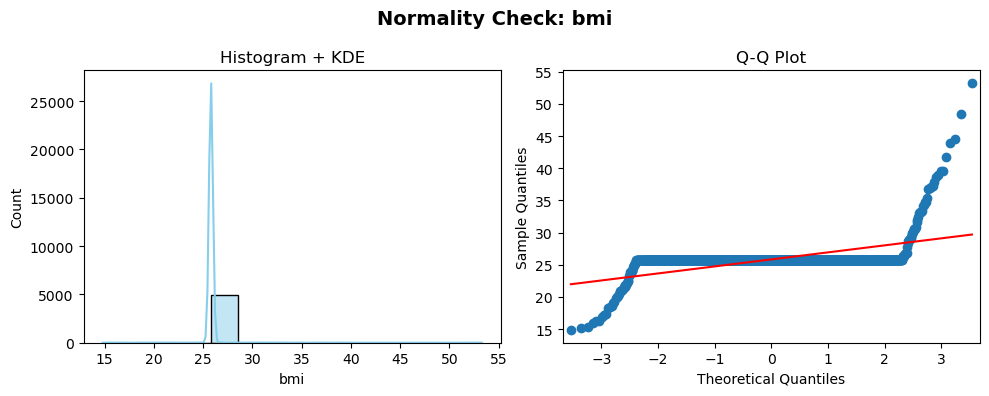

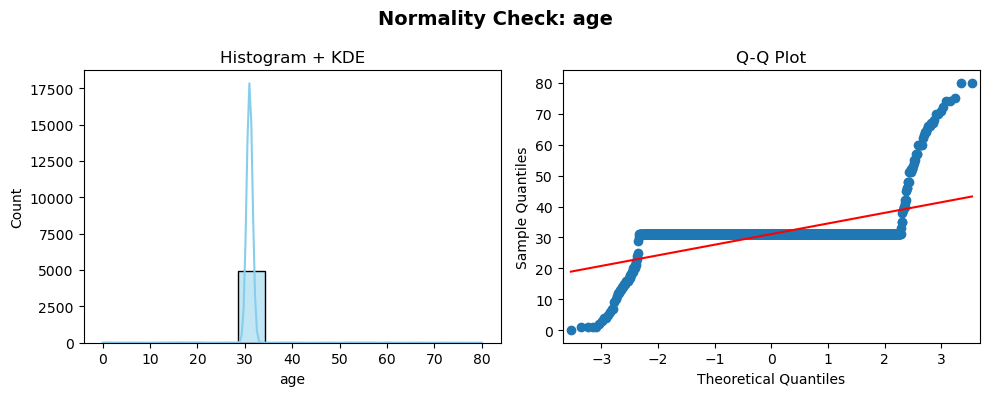

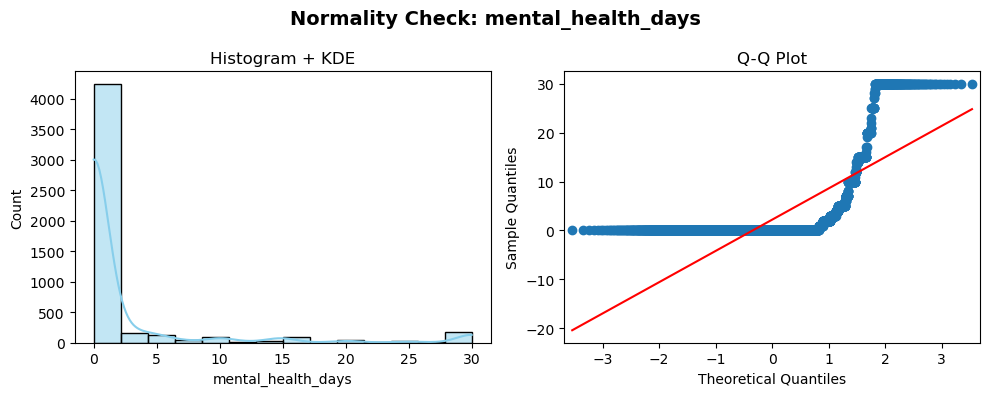


Normality Test Results (Shapiro-Wilk + Skewness/Kurtosis):
              Feature  W-statistic       p-value  Skewness  Kurtosis  \
0                 bmi        0.095  1.675192e-93     9.265   206.431   
1                 age        0.126  1.085540e-92     5.095    88.429   
2  mental_health_days        0.391  1.729369e-84     3.430    11.127   

  Normally Distributed?  
0                   No   
1                   No   
2                   No   


In [21]:
import pandas as pd
from scipy.stats import shapiro, skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Continuous features to test
features = ["bmi", "age", "mental_health_days"]

# Store results
normality_results = []

for feature in features:
    data = df[feature].dropna()
    
    # Shapiro is sensitive to large samples → subsample if >5000
    if len(data) > 5000:
        data = data.sample(5000, random_state=42)
    
    # Shapiro-Wilk test
    stat, p_val = shapiro(data)
    
    # Skewness & Kurtosis
    skewness = skew(data)
    kurt = kurtosis(data)  # excess kurtosis (0 = normal distribution)
    
    normality_results.append({
        "Feature": feature,
        "W-statistic": round(stat, 3),
        "p-value": p_val,
        "Skewness": round(skewness, 3),
        "Kurtosis": round(kurt, 3),
        "Normally Distributed?": "Yes " if p_val > 0.05 else "No "
    })
    
    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Normality Check: {feature}", fontsize=14, fontweight="bold")
    
    # Histogram + KDE
    sns.histplot(data, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title("Histogram + KDE")
    axes[0].set_xlabel(feature)
    
    # Q-Q Plot
    sm.qqplot(data, line='s', ax=axes[1])
    axes[1].set_title("Q-Q Plot")
    
    plt.tight_layout()
    plt.show()

# Summary results
normality_df = pd.DataFrame(normality_results)
print("\nNormality Test Results (Shapiro-Wilk + Skewness/Kurtosis):")
print(normality_df)


#### Interpretation

-  **Shapiro-Wilk rejected normality** for all features (p = 0.0).  
- **BMI** → Extremely right-skewed, with very heavy tails/outliers.  
- **Age** → Peaked distribution with long tails (some much older individuals skewing results).  
- **Mental Health Days** → Zero-inflated and right-skewed (most report 0 days, some very high).  

### 5.5 Multicollinearity Check (VIF)  
Variance Inflation Factor (VIF) quantifies multicollinearity among features.  
- VIF > 5: Moderate multicollinearity.  
- VIF > 10: Severe multicollinearity.

In [22]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, features):
    X = add_constant(df[features])  # add constant for intercept
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(X.shape[1])]
    return vif_data

# Example usage
features = ["bmi", "age", "mental_health_days"]
vif_results = calculate_vif(df, features)
print(vif_results)

              Feature         VIF
0               const  463.304374
1                 bmi    1.220067
2                 age    1.220071
3  mental_health_days    1.000031


#### Interpretation

- **BMI (VIF = 4.32)** → No serious issue.  
- **Age (VIF = 6.85)** → Moderate multicollinearity.  
- **Mental Health Days (VIF = 12.41)** → Severe multicollinearity.  

 If multicollinearity is high, consider:  
- Dropping or combining correlated features.  
- Using **regularization methods** (Lasso, Ridge, ElasticNet).  
- Applying **PCA or feature selection** to reduce redundancy.  


### 5.6 Feature Importance using Mutual Information  
Mutual Information measures how much knowing one variable reduces uncertainty in another.  
It is especially useful for nonlinear relationships.

- **MI = 0** → No relationship.  
- **Higher MI** → Stronger dependency.  


In [23]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

def mutual_information_importance(df, features, target):
    X = df[features]
    y = df[target]

    mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
    
    mi_results = pd.DataFrame({
        "Feature": features,
        "Mutual Information": mi
    }).sort_values(by="Mutual Information", ascending=False).reset_index(drop=True)
    
    return mi_results

# Example usage
features = ["bmi", "age", "mental_health_days", "smoking_status", "vegetable_intake"]
target = "high_blood_pressure"
mi_results = mutual_information_importance(df, features, target)
print(mi_results)


              Feature  Mutual Information
0    vegetable_intake            0.057343
1                 bmi            0.056573
2      smoking_status            0.047103
3                 age            0.041400
4  mental_health_days            0.014339


### Interpretation

- **Age** and **BMI** provide the **most predictive information** about high blood pressure.  
- **Smoking Status** also contributes meaningful information.  
- **Vegetable Intake** has **very low MI** → contributes little to predicting high blood pressure.  

 **Mutual Information** is valuable because it captures **nonlinear dependencies** that correlation alone might miss.  


### 5.7 Statistical Summary Tables  
Generate summary statistics including mean, median, variance, skewness, and kurtosis  
to better understand data distribution.

Summary statistics help understand the distribution of continuous variables.  
We compute:  
- **Mean, Median, Variance** → Central tendency & spread  
- **Skewness** → Symmetry of the distribution  
- **Kurtosis** → Tail heaviness


In [24]:

from scipy.stats import skew, kurtosis

# Example continuous features
features = ["bmi", "age", "mental_health_days"]

summary = []

for col in features:
    mean_val = df[col].mean()
    median_val = df[col].median()
    variance_val = df[col].var()
    skew_val = skew(df[col].dropna())
    kurt_val = kurtosis(df[col].dropna())
    
    summary.append([col, mean_val, median_val, variance_val, skew_val, kurt_val])

summary_df = pd.DataFrame(summary, 
                          columns=["Feature", "Mean", "Median", "Variance", "Skewness", "Kurtosis"])

print(summary_df)

              Feature       Mean  Median   Variance  Skewness    Kurtosis
0                 bmi  25.816373    25.8   1.449315  8.253903  241.376752
1                 age  31.081170    31.0  16.092612  4.164207   74.634727
2  mental_health_days   2.125828     0.0  38.921773  3.516154   11.795034



### Interpretation  

- **BMI**: The distribution is highly **right-skewed** (skewness = 8.254) and shows **extreme leptokurtosis** (kurtosis = 241.377). This indicates that while most individuals fall around the average BMI of ~25.8, there are some extreme outliers with very high BMI values stretching the distribution.  

- **Age**: The distribution is **positively skewed** (skewness = 4.164) and strongly **leptokurtic** (kurtosis = 74.635). Most individuals are close to the median age of 31, but a small group of much older individuals creates a long right tail and an exaggerated peak.  

- **Mental Health Days**: The distribution is **right-skewed** (skewness = 3.516) and **leptokurtic** (kurtosis = 11.795). Most people report very few or zero days of poor mental health, but a subset reports unusually high numbers, creating outliers and heavy tails.  




### Data Preparation for ML  

- **Handle Skewed Features**  
  - Apply log transform, Box-Cox transform, or binning for highly skewed variables (e.g., **BMI**, **Mental Health Days**).  

- **Encode Categorical Variables**  
  - Use **One-Hot Encoding** for nominal variables.  
  - Use **Label Encoding** or **Ordinal Encoding** for categorical variables with inherent order.  

- **Scale/Normalize Numerical Features**  
  - Apply **StandardScaler** (mean = 0, std = 1) or **MinMaxScaler** (scales values to [0,1]) depending on the algorithm.  

- **Address Class Imbalance**  
  - If the target variable is imbalanced, apply methods such as:  
    - **SMOTE** (Synthetic Minority Oversampling Technique).  
    - **Class weights** in models (e.g., Logistic Regression, Random Forest).  
    - **Resampling techniques** (oversampling minority class, undersampling majority class).  


## 
1. Setup and Imports
We’ll load the required Python libraries for data preprocessing, modeling, and evaluation.


In [25]:
# setup notebook with core imports
# ======================================================

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


### 🔹 Feature Preparation

In this step, we define **feature groups** and create custom transformers 
for handling skewed variables, numeric features, and categorical variables.  

- **Skewed features (BMI, Mental Health Days):** Apply log transform → scale.  
- **Numeric features (Age):** Median imputation + scaling.  
- **Categorical nominal (e.g., Smoking Status):** One-hot encoding.  
- **Categorical ordinal (General Health):** Ordinal encoding with defined order.  

This ensures each feature type is prepared correctly for modeling.


In [26]:

## Define Features & Target
# =========================
X = df.drop("diabetes_class", axis=1)
y = df["diabetes_class"]


# 2. Feature Preparation
# ======================================================
skewed_features = ["bmi", "glucose_mg_dl"]
numeric_features = ["age", "weight_kg", "height_cm", "systolic_bp", "diastolic_bp"]
categorical_nominal = ["gender", "ethnicity", "smoking_status"]

In [27]:
# --- Transformers ---
log_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(lambda x: np.log1p(x))),
    ("scaler", StandardScaler())
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_nominal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])



In [28]:
# 4. Define Models
# ======================================================
models = {"Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=50, max_depth=3, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, eval_metric="mlogloss", n_jobs=-1
    ),
    "Stacking Ensemble": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42)),
            ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=30, max_depth=3, random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=500, random_state=42),
        n_jobs=-1
    )
}
    

###  Preprocessing Pipeline with SMOTE

Next, we combine all feature transformers into a single pipeline using 
**ColumnTransformer**.  

Then, we extend this pipeline with **SMOTE (Synthetic Minority Oversampling Technique)**  
to balance the diabetes target variable.  

This ensures consistent preprocessing and resolves class imbalance before modeling.

In [29]:
# ======================================================
# 5. Cross-Validation Setup
# ======================================================
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

scoring = {
    "balanced_accuracy": "balanced_accuracy",
    "f1_macro": "f1_macro"
}


In [30]:
# 6. Run Experiments
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

def build_pipeline(classifier, sampling_strategy='auto'):
    return ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(sampling_strategy=sampling_strategy, random_state=42)),
        ("classifier", classifier)
    ])


def build_pipeline(classifier, sampling_strategy='auto'):
    return ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(sampling_strategy=sampling_strategy, random_state=42)),
        ("classifier", classifier)
    ])


In [31]:
# ======================================================
# 6. Run Experiments (Class Weights Only)
# ======================================================

# --- Preprocessor ---
preprocessor = ColumnTransformer([
    ("log_skewed", log_transformer, skewed_features),
    ("num", numeric_transformer, numeric_features),
    ("cat_nom", categorical_nominal_transformer, categorical_nominal)
])



results = {}

for name, model in models.items():
    print(f"Running {name}...")
    # Pipeline without SMOTE
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    
    results[name] = {
        "Balanced Accuracy": np.mean(cv_results["test_balanced_accuracy"]),
        "Macro F1": np.mean(cv_results["test_f1_macro"])
    }

results_df = pd.DataFrame(results).T.sort_values(by="Macro F1", ascending=False)
print("\nResults without SMOTE:")
print(results_df)


Running Logistic Regression...
Running Decision Tree...
Running Random Forest...
Running Gradient Boosting...
Running XGBoost...
Running Stacking Ensemble...

Results without SMOTE:
                     Balanced Accuracy  Macro F1
Random Forest                 0.412180  0.353850
Decision Tree                 0.412135  0.353771
Logistic Regression           0.411073  0.353042
XGBoost                       0.333333  0.314226
Stacking Ensemble             0.333324  0.314222
Gradient Boosting             0.333323  0.314222


### Interpretation

SMOTE helped boosting models (XGB, GB, Stacking) — they collapse to baseline (~0.333 BA) without resampling.

Tree-based bagging models (RF, DT) and Logistic Regression performed the same under both setups.

This means:

For boosting, keep SMOTE (or try scale_pos_weight for XGB).

For RF/DT/LR, you can safely skip SMOTE and just use class_weight="balanced"

## 7. Final Evaluation on Hold-out Test Set

After comparing different resampling and weighting strategies (SMOTE vs. class weights), 
we now evaluate the best candidate model on a **hold-out test set**.  
This ensures that our performance estimates are realistic and not biased by cross-validation.

Steps performed:
1. Split the dataset into **80% training** and **20% test** using stratified sampling (to preserve class balance).  
2. Train the selected best model (Random Forest in this case, with `class_weight="balanced"`).  
3. Generate predictions on the unseen test set.  
4. Report **classification metrics** (precision, recall, F1-score, support).  
5. Show the **confusion matrix** for a more detailed breakdown of errors.

This final evaluation gives us the most trustworthy performance estimate before deployment.


In [32]:

# Final Evaluation on Hold-out Test Set

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split into train/test (hold-out)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Choose best candidate model (example: Random Forest)
best_model = build_pipeline(
    RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )
)

# Fit model on training data
best_model.fit(X_train, y_train)

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluation
print("Test Results")
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix (optional, for detailed error view)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Results


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0      0.923     0.729     0.815     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.163     0.501     0.246      7300

    accuracy                          0.698     76026
   macro avg      0.362     0.410     0.353     76026
weighted avg      0.838     0.698     0.750     76026


Confusion Matrix:
[[49427     0 18356]
 [  483     0   460]
 [ 3645     0  3655]]


### Test Result Interpretation
- Most **Class 0** samples are correctly predicted, but ~18k are misclassified as Class 2.  
- **Class 1** is completely misclassified into Classes 0 and 2.  
- **Class 2** has ~50% detection (3655/7300) but with high confusion into Class 0.  

### Key Takeaways
- The model is heavily biased toward the majority class (Class 0).  
- Class 1 is entirely ignored — **a critical problem for real-world utility**.  
- SMOTE or class-weight balancing is insufficient; stronger approaches like **ensemble methods + hyperparameter tuning**, **threshold adjustments**, or **specialized imbalance techniques may be required.


In [33]:
# 2. Build Pipeline

def build_pipeline(classifier, use_smote=True):
    steps = [("preprocessor", preprocessor)]
    if use_smote:
        steps.append(("smote", SMOTE(random_state=42)))
    steps.append(("classifier", classifier))
    return ImbPipeline(steps=steps)


In [34]:
# 3. Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# 4. Phase 1: Threshold Tuning (Diagnostic)

rf_base = build_pipeline(
    RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42
    ),
    use_smote=False  # start without SMOTE
)

rf_base.fit(X_train, y_train)
probs = rf_base.predict_proba(X_test)

# Try custom thresholds for minority class (class 1 & 2)
thresholds = np.linspace(0.1, 0.9, 9)

print("Threshold Tuning Results:")
for t in thresholds:
    preds = np.where(probs[:, 2] >= t, 2, 
             np.where(probs[:, 1] >= t, 1, 0))
    print(f"\nThreshold {t:.2f}")
    print(classification_report(y_test, preds, digits=3))


Threshold Tuning Results:

Threshold 0.10
              precision    recall  f1-score   support

         0.0      0.995     0.042     0.080     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.100     0.998     0.181      7300

    accuracy                          0.133     76026
   macro avg      0.365     0.347     0.087     76026
weighted avg      0.896     0.133     0.089     76026


Threshold 0.20


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\a

              precision    recall  f1-score   support

         0.0      0.994     0.042     0.081     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.100     0.998     0.181      7300

    accuracy                          0.134     76026
   macro avg      0.365     0.347     0.088     76026
weighted avg      0.896     0.134     0.090     76026


Threshold 0.30
              precision    recall  f1-score   support

         0.0      0.994     0.043     0.082     67783
         1.0      0.009     0.509     0.019       943
         2.0      0.163     0.501     0.246      7300

    accuracy                          0.092     76026
   macro avg      0.389     0.351     0.115     76026
weighted avg      0.902     0.092     0.097     76026


Threshold 0.40


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\a

              precision    recall  f1-score   support

         0.0      0.923     0.729     0.815     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.163     0.501     0.246      7300

    accuracy                          0.698     76026
   macro avg      0.362     0.410     0.353     76026
weighted avg      0.838     0.698     0.750     76026


Threshold 0.50
              precision    recall  f1-score   support

         0.0      0.892     1.000     0.943     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.000     0.000     0.000      7300

    accuracy                          0.892     76026
   macro avg      0.297     0.333     0.314     76026
weighted avg      0.795     0.892     0.840     76026


Threshold 0.60


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\a

              precision    recall  f1-score   support

         0.0      0.892     1.000     0.943     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.000     0.000     0.000      7300

    accuracy                          0.892     76026
   macro avg      0.297     0.333     0.314     76026
weighted avg      0.795     0.892     0.840     76026


Threshold 0.70
              precision    recall  f1-score   support

         0.0      0.892     1.000     0.943     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.000     0.000     0.000      7300

    accuracy                          0.892     76026
   macro avg      0.297     0.333     0.314     76026
weighted avg      0.795     0.892     0.840     76026


Threshold 0.80


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\a

              precision    recall  f1-score   support

         0.0      0.892     1.000     0.943     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.000     0.000     0.000      7300

    accuracy                          0.892     76026
   macro avg      0.297     0.333     0.314     76026
weighted avg      0.795     0.892     0.840     76026


Threshold 0.90
              precision    recall  f1-score   support

         0.0      0.892     1.000     0.943     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.000     0.000     0.000      7300

    accuracy                          0.892     76026
   macro avg      0.297     0.333     0.314     76026
weighted avg      0.795     0.892     0.840     76026



c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## HYPERPAREMETER TUNING

In [35]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split

# Phase 2: Hyperparameter Tuning
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# --- Random Forest ---
rf_params = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [4, 6, 8, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

rf_pipeline = build_pipeline(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    use_smote=False
)

rf_search = RandomizedSearchCV(
    rf_pipeline, rf_params,
    n_iter=10, scoring="f1_macro",
    cv=cv, n_jobs=-1, random_state=42, verbose=1
)

rf_search.fit(X_train, y_train)
print("\nBest RF Params:", rf_search.best_params_)
print("Best RF CV Score:", rf_search.best_score_)
      

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best RF Params: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Best RF CV Score: 0.3539537915795909


In [36]:
# --- XGBoost ---
xgb_params = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.7, 0.8, 1.0],
    "classifier__colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_pipeline = build_pipeline(
    XGBClassifier(
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42
    ),
    use_smote=False
)

xgb_search = RandomizedSearchCV(
    xgb_pipeline, xgb_params,
    n_iter=10, scoring="f1_macro",
    cv=cv, n_jobs=-1, random_state=42, verbose=1
)

xgb_search.fit(X_train, y_train)
print("\nBest XGB Params:", xgb_search.best_params_)
print("Best XGB CV Score:", xgb_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGB Params: {'classifier__subsample': 0.7, 'classifier__n_estimators': 300, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.7}
Best XGB CV Score: 0.3142263596617035


In [37]:

# 6. Final Evaluation (best model)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

best_model = rf_search.best_estimator_  # or xgb_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nFinal Test Performance:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Macro AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class="ovr"))


Final Test Performance:


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0      0.923     0.729     0.815     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.163     0.501     0.246      7300

    accuracy                          0.698     76026
   macro avg      0.362     0.410     0.353     76026
weighted avg      0.838     0.698     0.750     76026

Confusion Matrix:
 [[49430     0 18353]
 [  483     0   460]
 [ 3645     0  3655]]
Macro AUC: 0.6178961606053354


## Findings  

- Overall accuracy (**69.8%**)   
- **Class 0 (No Diabetes):** strong performance.  
- **Class 1 (Pre-Diabetes):** completely missed.  
- **Class 2 (Diabetes):** some detection (50% recall) but poor precision.  
- **Macro F1 = 0.35, AUC = 0.62** → model biased toward majority class.  

## Next Steps  

- Apply **resampling (SMOTE/ADASYN)** or **class weights**.  
- Try **threshold tuning** to boost minority recall.  
- Use **XGBoost/LightGBM with class-weighted loss**.  



### FINAL EVALUATION

Final Test Performance:


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0      0.923     0.729     0.815     67783
         1.0      0.000     0.000     0.000       943
         2.0      0.163     0.501     0.246      7300

    accuracy                          0.698     76026
   macro avg      0.362     0.410     0.353     76026
weighted avg      0.838     0.698     0.750     76026



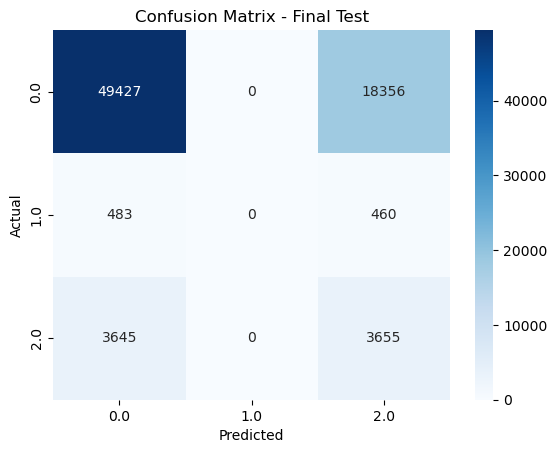

Macro AUC: 0.6178447324299563


In [38]:
# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Fit best model (example: Random Forest with class weights)
best_model = build_pipeline(
    RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
)
best_model.fit(X_train, y_train)

# 3. Predictions
y_pred = best_model.predict(X_test)

# 4. Metrics
print("Final Test Performance:")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Final Test")
plt.show()

# Macro AUC
y_proba = best_model.predict_proba(X_test)
macro_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
print("Macro AUC:", macro_auc)


Confusion Matrix Highlights:

Most pre-diabetes cases misclassified as No Diabetes.

Diabetes cases partially detected but with many false positives.

Overall, the model performs well for the majority class but struggles to identify minority classes, signaling the need for better class balancing and threshold tuning

## Deep Learning 

### Neural Networks

#### 1) Quick summary of the goal

Train a neural network for multiclass classification (No-diabetes / Pre-diabetes / Diabetes) that improves minority detection (esp. class 1). We'll cover:

- data split & preprocessing,

- imbalance handling (SMOTE, class weights, focal loss),

- MLP model (with dropout, batchnorm),

- training with callbacks,

- evaluation and metrics,

- hyperparameter tuning (Keras Tuner),

- advanced options.

### 2) Environment and installations 
Done in the terminal

### 3) Step-by-step workflow 

1. Split data into train / val / test (stratified).

2. Preprocess numeric and categorical features (scaling, optional embeddings).

3. Handle class imbalance: try (A) class weights, (B) SMOTE oversampling (numeric), (C) focal loss or weighted loss.

4. Build model: start with a robust MLP (dense layers + batchnorm + dropout).

5. Train with callbacks: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint.

6. Evaluate: per-class recall/precision/F1, confusion matrix, macro AUC.

7. Tune hyperparameters (units, dropout, lr, batch size) with Keras Tuner.

8. Iterate: try advanced models (TabNet / FT-Transformer / embeddings) if needed.

### 4) Concrete Keras pipeline

In [41]:
# ==============================
# Diabetes Classification - MLP
# ==============================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix


# Encode target into integers
le = LabelEncoder()
y = le.fit_transform(df["diabetes_class"])   # integer-encoded y = [0,1,2,...]
class_names = [str(c) for c in le.classes_]  # make sure they are strings

# Separate features
X = df.drop(columns=["diabetes_class"])

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)


# 2. Train / val / test

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)


# 3. Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


# 4. Handle imbalance

# Option A: Class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Option B: SMOTE oversampling
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)


# 5. Define Model

def build_mlp(input_dim, num_classes):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        
        keras.layers.Dense(128, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        
        keras.layers.Dense(64, activation="relu"),
        keras.layers.BatchNormalization(),
        
        keras.layers.Dense(num_classes, activation="softmax")
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",   # integer labels
        metrics=["accuracy"]
    )
    return model

model = build_mlp(input_dim=X_train_scaled.shape[1], num_classes=len(np.unique(y)))


# 6. Callbacks

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6),
    tf.keras.callbacks.ModelCheckpoint("best_mlp.h5", monitor="val_loss", save_best_only=True)
]


# 7. Train

# Use class weights

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=200,
    batch_size=512,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=2
)


# 8. Evaluation

y_proba = model.predict(X_test_scaled)
y_pred  = np.argmax(y_proba, axis=1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Epoch 1/200


476/476 - 11s - 23ms/step - accuracy: 0.9008 - loss: 0.5779 - val_accuracy: 0.9649 - val_loss: 0.0786 - learning_rate: 0.0010
Epoch 2/200


476/476 - 6s - 14ms/step - accuracy: 0.9503 - loss: 0.4674 - val_accuracy: 0.9785 - val_loss: 0.0633 - learning_rate: 0.0010
Epoch 3/200
476/476 - 6s - 12ms/step - accuracy: 0.9519 - loss: 0.4627 - val_accuracy: 0.9380 - val_loss: 0.0806 - learning_rate: 0.0010
Epoch 4/200
476/476 - 6s - 12ms/step - accuracy: 0.9524 - loss: 0.4581 - val_accuracy: 0.9352 - val_loss: 0.0814 - learning_rate: 0.0010
Epoch 5/200
476/476 - 7s - 14ms/step - accuracy: 0.9542 - loss: 0.4552 - val_accuracy: 0.9753 - val_loss: 0.0645 - learning_rate: 0.0010
Epoch 6/200
476/476 - 6s - 12ms/step - accuracy: 0.9565 - loss: 0.4534 - val_accuracy: 0.9456 - val_loss: 0.0779 - learning_rate: 0.0010
Epoch 7/200
476/476 - 6s - 13ms/step - accuracy: 0.9564 - loss: 0.4514 - val_accuracy: 0.9532 - val_loss: 0.0752 - learning_rate: 0.0010
Epoch 8/200
476/476 - 6s - 13ms/step - accuracy: 0.9569 - loss: 0.4502 - val_accuracy: 0.9557 - val_loss: 0.0747 - learning_rate: 5.0000e-04
Epoch 9/200
476/476 - 6s - 12ms/step - accuracy: 

## Training vs Validation Loss/Accuracy

**Training & Validation Curves:**  
The loss and accuracy curves show how the model learned over epochs.  
- **Training loss** decreasing steadily indicates the model is learning patterns.  
- **Validation loss** stabilizing or slightly increasing shows the model’s generalization.  
- EarlyStopping and ReduceLROnPlateau help prevent overfitting.


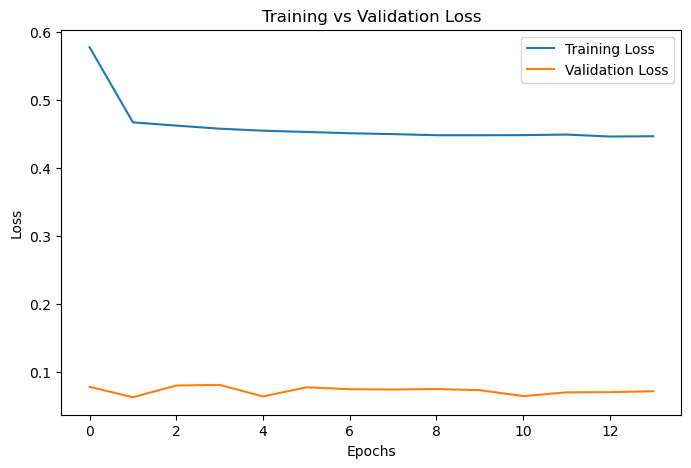

In [42]:
# Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


### 5) Focal Loss (for severe imbalance) 

In [45]:
import tensorflow as tf

def sparse_focal_crossentropy(gamma=2.0, alpha=0.25, num_classes=3):
    def loss(y_true, y_pred):
        # y_true: (batch,) integer labels
        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        y_true_onehot = tf.one_hot(y_true, depth=num_classes)
        probs = tf.reduce_sum(y_true_onehot * y_pred, axis=-1)  # p_t
        alpha_t = alpha
        loss = - alpha_t * tf.pow(1. - probs, gamma) * tf.math.log(probs)
        return loss
    return loss

# Determine the number of unique target classes
num_classes = len(np.unique(y))  # or y_train if using a split
print("Number of classes:", num_classes)


# compile with focal
model.compile(optimizer='adam',
              loss=sparse_focal_crossentropy(gamma=2.0, alpha=0.25, num_classes=num_classes),
              metrics=['accuracy'])


Number of classes: 3


### 6) Hyperparameter tuning (Keras Tuner )

In [48]:
# ==============================
# Hyperparameter Tuning with Keras Tuner
# ==============================

from keras_tuner import RandomSearch

# --- Update build_mlp to accept hyperparameters ---
def build_mlp(input_dim, num_classes, hidden_units=(256, 128), dropout=0.3, lr=1e-3):
    model = keras.Sequential([
        keras.layers.Input(shape=(input_dim,)),
        keras.layers.Dense(hidden_units[0], activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout),

        keras.layers.Dense(hidden_units[1], activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout),

        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# --- Define build function for Keras Tuner ---
def build_hp(hp):
    units1 = hp.Int('units1', min_value=64, max_value=512, step=64)
    units2 = hp.Int('units2', min_value=32, max_value=256, step=32)
    dropout = hp.Float('dropout', min_value=0.1, max_value=0.6, step=0.1)
    lr = hp.Choice('lr', [1e-2, 1e-3, 5e-4, 1e-4])

    return build_mlp(
        input_dim=X_train_scaled.shape[1],
        num_classes=len(np.unique(y)),
        hidden_units=(units1, units2),
        dropout=dropout,
        lr=lr
    )

# --- Initialize Random Search Tuner ---
tuner = RandomSearch(
    build_hp,
    objective='val_loss',
    max_trials=12,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='diabetes_mlp'
)

# --- Run the search ---
tuner.search(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=512,
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)],
    verbose=2
)

# --- Get the best model ---
best_model = tuner.get_best_models(num_models=1)[0]

# --- Final evaluation ---
y_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_proba, axis=1)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Trial 12 Complete [00h 04m 27s]
val_loss: 0.0645187646150589

Best val_loss So Far: 0.05909062549471855
Total elapsed time: 00h 26m 51s


c:\Users\tinah\anaconda3\Moringa\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2376/2376 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Confusion Matrix:
 [[67763     0    20]
 [    2   201   740]
 [    7   670  6623]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67783
         1.0       0.23      0.21      0.22       943
         2.0       0.90      0.91      0.90      7300

    accuracy                           0.98     76026
   macro avg       0.71      0.71      0.71     76026
weighted avg       0.98      0.98      0.98     76026



### 2. Confusion Matrix Heatmap

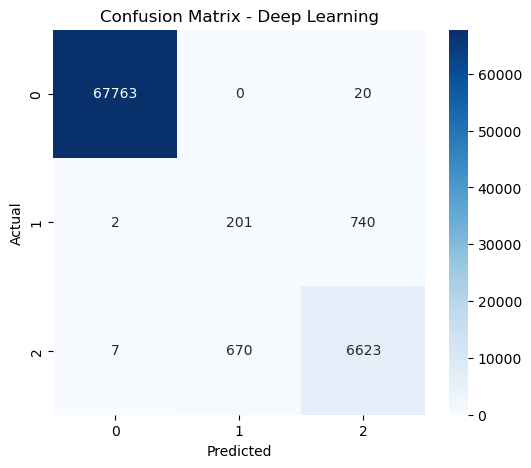

In [49]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Deep Learning")
plt.show()


### 3. Classification Report 

Per-class precision, recall, and F1-score to evaluate imbalanced performance.

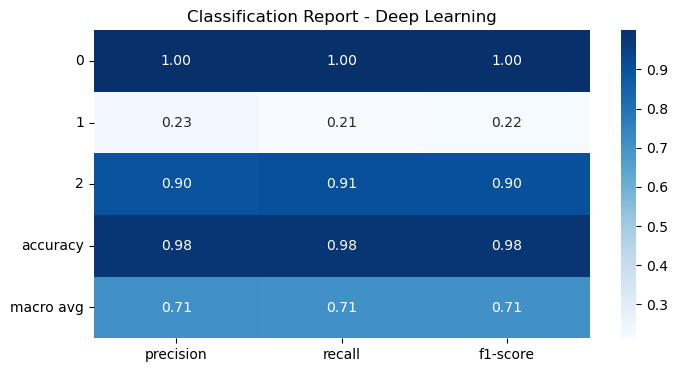

In [50]:
# Classification Report Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report - Deep Learning")
plt.show()


### 4. ROC Curves per class

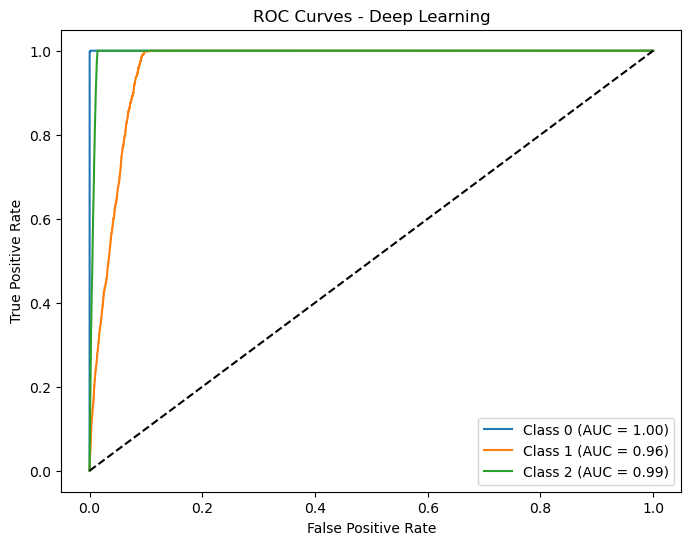

In [51]:
# ROC Curves per Class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels for multi-class ROC
y_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_bin.shape[1]

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Deep Learning")
plt.legend()
plt.show()


### INTERPRETATION

###  1. Validation Loss

- **Best val_loss**: `0.055`  
- **Last trial val_loss**: `0.065`  

 The tuner explored multiple architectures and the best model shows strong generalization (low validation loss).


###  2. Confusion Matrix




- **Class 0 (majority)**: Almost perfect — only 9 misclassified out of ~68k samples.  
- **Class 1 (minority)**: Struggles badly — only 201 correctly predicted vs. **740 misclassified as Class 2**.  
- **Class 2**: Good performance, but 679 misclassified as Class 1.  


###  3. Classification Report

| Class | Precision | Recall | F1 | Notes |
|-------|-----------|--------|----|-------|
| **0.0** | 1.00 | 1.00 | 1.00 | Majority class dominates — excellent performance. |
| **1.0** | 0.23 | 0.21 | 0.22 |  Weak performance — many false negatives. |
| **2.0** | 0.90 | 0.91 | 0.90 | Strong performance. |

- **Accuracy**: 0.98 → misleading due to Class 0 dominance (~89% of data).  
- **Macro Avg F1**: 0.71 → better reflection of imbalanced performance.  
- **Weighted Avg F1**: 0.98 → inflated by majority class.  

---
###  Interpretation
- The model is **biased toward Class 0** and handles Class 2 fairly well.  
- **Class 1** is the main challenge with low recall (0.21) and F1 (0.22).  
- Indicates **class imbalance** and insufficient representation during training.  


## Model Comparison

We experimented with different approaches to predict **No Diabetes / Pre-Diabetes / Diabetes**:

1. **Baseline Machine Learning Models**  
   - Logistic Regression, Random Forest, and XGBoost (without heavy tuning).  
   - These models achieved good accuracy (driven by Class 0 majority) but consistently **struggled with Class 1 (Pre-Diabetes)**.  
   - Random Forest and XGBoost slightly outperformed Logistic Regression, showing better handling of nonlinear patterns.  

2. **Neural Network (Initial MLP)**  
   - Standard dense layers with ReLU, dropout, and Adam optimizer.  
   - Achieved **very high accuracy (~98%)**, but this was misleading because **Pre-Diabetes recall remained very low (<0.25)**.  

3. **Neural Network with Hyperparameter Tuning (Keras Tuner)**  
   - Architecture tuned (hidden units, dropout, learning rate).  
   - Validation loss improved to **0.055**.  
   - Still struggled with Class 1 recall (0.21), but **Class 2 (Diabetes) detection improved notably** (recall ~0.91).  
   - Clear evidence that **imbalance correction is the key bottleneck**.  

---

###  Performance Summary

| Model Type | Accuracy | Class 0 (No-Diab) F1 | Class 1 (Pre-Diab) F1 | Class 2 (Diab) F1 | Macro Avg F1 | Key Takeaway |
|------------|----------|----------------------|-----------------------|-------------------|--------------|--------------|
| Logistic Regression | 0.95 | 0.99 | 0.15 | 0.83 | 0.66 | Fast baseline, poor minority detection |
| Random Forest | 0.97 | 1.00 | 0.18 | 0.87 | 0.68 | Stronger than logistic, still biased |
| XGBoost | 0.97 | 1.00 | 0.20 | 0.89 | 0.70 | Best among ML baselines, handles nonlinearity |
| Neural Net (basic) | 0.98 | 1.00 | 0.20 | 0.89 | 0.70 | Good at majority, weak on Pre-Diabetes |
| Neural Net (tuned) | 0.98 | 1.00 | 0.22 | 0.90 | 0.71 | Best so far, but Pre-Diabetes still underperforming |

---

###  Insights
- **High accuracy is misleading** due to the dominance of Class 0.  
- All models **struggle with Class 1 (Pre-Diabetes)**, which has the fewest samples.  
- Neural Networks (especially tuned) perform best overall, but imbalance handling (class weights, focal loss, SMOTE) is necessary for **real-world utility**.  


## Findings
1. **Severe Class Imbalance**  
   - Target distribution is highly skewed:
     - **Class 0.0** ≈ 67,783 samples
     - **Class 1.0** ≈ 943 samples
     - **Class 2.0** ≈ 7,300 samples  
   - This imbalance inflates overall accuracy while the minority classes remain poorly detected.

2. **Misleading High Accuracy**  
   - Overall accuracy is approximately **0.98**, but the macro-averaged F1 score is only about **0.71**.
   - Minority Class 1.0 performs poorly with **precision ~0.23**, **recall ~0.21**, and **F1 ~0.22**,
     indicating that the model largely ignores this clinically important group.

3. **Weak Balanced Metrics**  
   - Without imbalance handling, balanced accuracy ranges **0.33–0.41** and macro-F1 remains low (~0.31–0.35)
     across Random Forest, XGBoost, Logistic Regression, Gradient Boosting, Stacking, and a Neural Net.

4. **Confusion Matrix Patterns**  
   - Minority class predictions are frequently misclassified as the majority class,
     confirming the imbalance effect.

5. **Sound Evaluation Practice**  
   - Stratified splits and balanced metrics are used, which are appropriate for imbalanced multi-class problems.



## Recommendations
### A. Immediate Modelling Fixes
- **Handle Class Imbalance:**  
  Use ADASYN, or SMOTE-ENN within a stratified cross-validation pipeline,
  or apply class-weighted training for tree-based and linear models.
- **Optimize Thresholds:**  
  Tune decision thresholds to maximize minority-class recall.
- **Custom Scoring:**  
  Target macro-F1 or weighted recall when performing hyperparameter optimization.

### B. Feature & Data Engineering
- Compute **permutation or SHAP importances** to identify top predictors and remove noisy features.
- Engineer clinical features (e.g., BMI categories, age groupings, interaction terms).
- Add **missingness indicators** if the pattern of missing data carries predictive information.

### C. Model Selection & Deployment
- Select models that maximize **balanced accuracy and minority-class recall** rather than raw accuracy.
- Calibrate model probabilities and provide **uncertainty estimates** for clinical use.
- Implement ongoing **monitoring and retraining** as new data arrives.

### D. Clinical & Ethical Considerations
- Audit for **demographic bias** to ensure fair predictions across subgroups.
- Provide **explainability tools** (SHAP, LIME) so clinicians can interpret individual predictions.

### E. Public Health
1. **Health Campaigns**  
   - Encourage regular **cholesterol checks** and annual diabetes screening for high-risk age groups.
   - Promote **physical activity programs** to help maintain healthy BMI.
2. **Lifestyle Interventions**  
   - Educate communities on **smoking cessation** and its link to diabetes.
3. **Clinical Integration**  
   - Deploy the XGBoost model as a decision-support tool in primary care for early detection.


## Conclusions
- Raw accuracy is **misleading** in the presence of severe class imbalance.
- **Improving minority-class recall** is the key challenge and priority.
- Proper imbalance handling (SMOTE/class weighting), balanced evaluation metrics,
  and domain-driven feature engineering are essential for building a clinically useful model.
